In [2]:
pip install mediapipe opencv-python matplotlib pandas numpy

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'c:\Users\sahug\AppData\Local\Programs\Python\Python39\python.exe' 'c:\Users\sahug\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\pep517\_in_process.py' prepare_metadata_for_build_wheel 'C:\Users\sahug\AppData\Local\Temp\tmpzpd5bker'
         cwd: C:\Users\sahug\AppData\Local\Temp\pip-install-zrdl2oxy\pandas
    Complete output (10 lines):
    + meson setup C:\Users\sahug\AppData\Local\Temp\pip-install-zrdl2oxy\pandas C:\Users\sahug\AppData\Local\Temp\pip-install-zrdl2oxy\pandas\.mesonpy-cd0zj0m7 -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --vsenv --native-file=C:\Users\sahug\AppData\Local\Temp\pip-install-zrdl2oxy\pandas\.mesonpy-cd0zj0m7\meson-python-native-file.ini
    The Meson build system
    Version: 1.8.1
    Source dir: C:\Users\sahug\AppData\Local\Temp\pip-install-zrdl2oxy\pandas
    Build dir: C:\Users\sahug\AppData\Local\Temp\pip-install-zrdl2oxy\pandas\.mesonpy-cd0zj0m7
    Bu

In [1]:
import mediapipe as mp

In [3]:
import cv2
print(cv2.__version__)

4.11.0


In [3]:
import cv2 
import mediapipe as mp 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

In [4]:
import pandas as pd
print(pd.__version__)


2.2.3


In [5]:
import os

In [6]:
# Define file paths (adjust as per your folder structure) 
PHOTO_PATH = 'input_photos/trial_photo.jpg' 
OUTPUT_CSV_PATH = 'output_data/facial_features.csv' 
OUTPUT_IMAGE_PATH = 'output_images/detected_features.png'

In [7]:
# Create output directories if they don't exist 
os.makedirs(os.path.dirname(OUTPUT_CSV_PATH), exist_ok=True) 
os.makedirs(os.path.dirname(OUTPUT_IMAGE_PATH), exist_ok=True) 

In [8]:
# Load the image 
image = cv2.imread(PHOTO_PATH) 

Folder structure and paths initialized.
Image loaded and Face Mesh initialized.
Features assigned to quadrants.
Image with detected features saved to output_images/detected_features.png


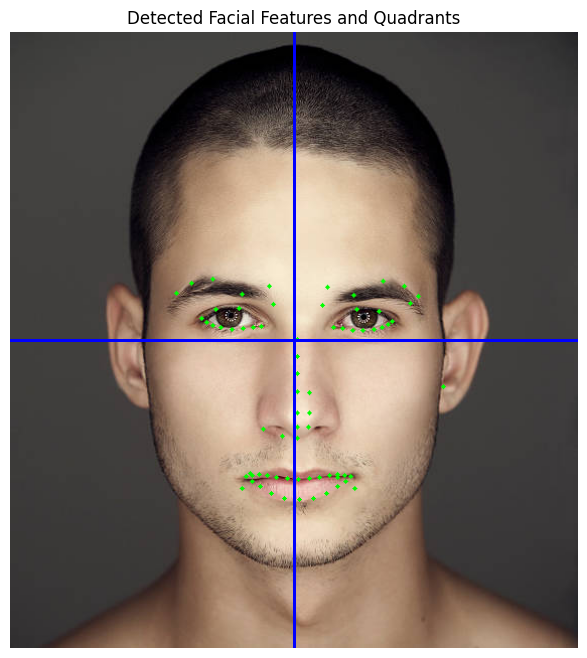

Facial feature coordinates saved to output_data/facial_features.csv

First 5 rows of the DataFrame:
    feature_id    x    y feature_type      quadrant
0            1  285  392         nose  Bottom-Right
1            2  285  403         nose  Bottom-Right
2            4  285  378         nose  Bottom-Right
3            5  285  357         nose  Bottom-Right
4            6  285  305         nose     Top-Right
..         ...  ...  ...          ...           ...
67         385  344  275          eye     Top-Right
68         387  366  277          eye     Top-Right
69         390  369  293          eye     Top-Right
70         405  314  458          lip  Bottom-Right
71         415  325  439          lip  Bottom-Right

[72 rows x 5 columns]


In [10]:


print("Folder structure and paths initialized.")


image = cv2.imread(PHOTO_PATH)

# Check if image was loaded successfully
if image is None:
    print(f"Error: Could not load image from {PHOTO_PATH}")
else:
    # Convert the image from BGR to RGB (MediaPipe expects RGB)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize MediaPipe Face Mesh
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

    print("Image loaded and Face Mesh initialized.")

    # Process the image and get facial landmarks
    results = face_mesh.process(image_rgb)

    # Prepare a list to store feature coordinates
    feature_coords = []

    # Draw landmarks if detected
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            img_h, img_w, _ = image.shape

            # Define specific landmark indices for eyebrows, eyes, nose, and lips
            # These are approximate and common indices for these features.
            # You might need to refine them based on your exact requirements by consulting
            # MediaPipe Face Mesh documentation or visualizing all 468 landmarks.

            # Eyebrows (approximate common indices)
            eyebrow_indices = [
                55, 65, 107, 105, 63, 70, # left eyebrow
                285, 295, 336, 334, 293, 300 # right eyebrow
            ]

            # Eyes (approximate common indices)
            eye_indices = [
                33, 160, 158, 133, 153, 144, # left eye outer
                263, 387, 385, 362, 380, 373, # right eye outer
                7, 163, 145, 154, # left eye inner
                249, 390, 374, 381 # right eye inner
            ]

            # Nose (approximate common indices)
            nose_indices = [
                1, 2, 4, 5, 6, 98, 97, 195, 197, # nose bridge and tip
                43, 273, 274, 275, 276, 281, 323 # nose wings/nostrils
            ]

            # Lips (approximate common indices)
            lip_indices = [
                61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291, 185, # outer lips
                78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308, 324 # inner lips
            ]

            # Combine all desired feature indices
            desired_feature_indices = set(eyebrow_indices + eye_indices + nose_indices + lip_indices)


            for i, landmark in enumerate(face_landmarks.landmark):
                if i in desired_feature_indices:
                    x = int(landmark.x * img_w)
                    y = int(landmark.y * img_h)
                    
                    feature_info = {'feature_id': i, 'x': x, 'y': y, 'feature_type': ''}

                    # Update feature_type based on index for clarity in CSV
                    if i in eyebrow_indices:
                        feature_info['feature_type'] = 'eyebrow'
                    elif i in eye_indices:
                        feature_info['feature_type'] = 'eye'
                    elif i in nose_indices:
                        feature_info['feature_type'] = 'nose'
                    elif i in lip_indices:
                        feature_info['feature_type'] = 'lip'

                    feature_coords.append(feature_info)

                    # Draw green dot
                    cv2.circle(image, (x, y), 2, (0, 255, 0), -1) # Green dot, -1 for filled circle
    else:
        print("No face landmarks detected in the image.")

    # Release the Face Mesh resources
    face_mesh.close()

    # --- Step 3: Divide the Photo into Four Quadrants and Extract Features ---
    # Calculate image dimensions (already done above, but good to reiterate)
    img_h, img_w, _ = image.shape

    # Define quadrant boundaries
    mid_x = img_w // 2
    mid_y = img_h // 2

    # Iterate through detected features and assign to quadrants
    for feature in feature_coords:
        x = feature['x']
        y = feature['y']

        if x <= mid_x and y <= mid_y:
            feature['quadrant'] = 'Top-Left'
        elif x > mid_x and y <= mid_y:
            feature['quadrant'] = 'Top-Right'
        elif x <= mid_x and y > mid_y:
            feature['quadrant'] = 'Bottom-Left'
        else:
            feature['quadrant'] = 'Bottom-Right'

    print("Features assigned to quadrants.")

    # Optionally, draw quadrant lines on the image (for visualization)
    cv2.line(image, (mid_x, 0), (mid_x, img_h), (255, 0, 0), 2)  # Vertical line (blue)
    cv2.line(image, (0, mid_y), (img_w, mid_y), (255, 0, 0), 2)  # Horizontal line (blue)

    # --- Step 4: Save the Detected Features Image ---
    # Save the image with drawn features
    cv2.imwrite(OUTPUT_IMAGE_PATH, image)
    print(f"Image with detected features saved to {OUTPUT_IMAGE_PATH}")

    # Display the image (optional, for Jupyter Notebook)
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Facial Features and Quadrants")
    plt.axis('off')
    plt.show()

    # --- Step 5: Save Features to CSV File ---
    # Create a DataFrame from the feature_coords list
    df = pd.DataFrame(feature_coords)

    # Save the DataFrame to a CSV file
    df.to_csv(OUTPUT_CSV_PATH, index=False)

    print(f"Facial feature coordinates saved to {OUTPUT_CSV_PATH}")

    # Display the first few rows of the DataFrame (optional)
    print("\nFirst 5 rows of the DataFrame:")
    print(df)

Folder structure and paths initialized.
Folder structure and paths initialized.
Image loaded and Face Mesh initialized.
Crosshair position set to: (285, 392) (Nose Tip based)
Features assigned to quadrants based on nose tip crosshair.
Image with detected features and nose tip crosshair saved to output_images/detected_features_nose_tip_crosshair.png


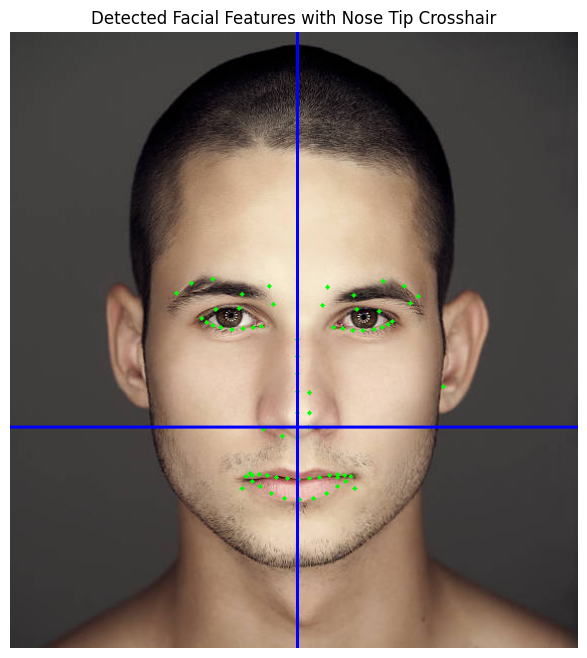

Facial feature coordinates saved to output_data/facial_features.csv

First 5 rows of the DataFrame:
   feature_id    x    y feature_type     quadrant
0           1  285  392         nose     Top-Left
1           2  285  403         nose  Bottom-Left
2           4  285  378         nose     Top-Left
3           5  285  357         nose     Top-Left
4           6  285  305         nose     Top-Left
    feature_id    x    y feature_type      quadrant
0            1  285  392         nose      Top-Left
1            2  285  403         nose   Bottom-Left
2            4  285  378         nose      Top-Left
3            5  285  357         nose      Top-Left
4            6  285  305         nose      Top-Left
..         ...  ...  ...          ...           ...
67         385  344  275          eye     Top-Right
68         387  366  277          eye     Top-Right
69         390  369  293          eye     Top-Right
70         405  314  458          lip  Bottom-Right
71         415  325  439    

In [18]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# --- Project Setup and Folder Structure ---
# Define file paths (adjust as per your folder structure)
PHOTO_PATH = 'input_photos/trial_photo.jpg' # !!! IMPORTANT: Replace 'your_photo.jpg' with your actual image file name
OUTPUT_CSV_PATH = 'output_data/facial_features.csv'
OUTPUT_IMAGE_PATH = 'output_images/detected_features_nose_tip_crosshair.png' # Changed output image name
OUTPUT_IMAGE_ORIGINAL_CROSSHAIR_PATH = 'output_images/detected_features_original_crosshair.png' # Saving previous output also

# Create output directories if they don't exist
# This will create 'output_data'
os.makedirs(os.path.dirname(OUTPUT_CSV_PATH), exist_ok=True)

# This will create 'output_images' for both OUTPUT_IMAGE_PATH and OUTPUT_IMAGE_ORIGINAL_CROSSHAIR_PATH
os.makedirs(os.path.dirname(OUTPUT_IMAGE_PATH), exist_ok=True)
# You don't need the third os.makedirs line you had.
# The following line is redundant and caused the error:
# os.makedirs(os.path.dirname(os.path.dirname(OUTPUT_IMAGE_ORIGINAL_CROSSHAIR_PATH)), exist_ok=True)


print("Folder structure and paths initialized.")

# ... rest of your code ...

print("Folder structure and paths initialized.")

# --- Step 2: Load the Photo and Initialize Face Mesh (Mostly the same) ---
image_original = cv2.imread(PHOTO_PATH) # Keep an original copy for drawing

if image_original is None:
    print(f"Error: Could not load image from {PHOTO_PATH}")
else:
    # Make a copy of the image to draw on, to avoid modifying the original for other steps if needed
    image_for_drawing = image_original.copy()
    image_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

    print("Image loaded and Face Mesh initialized.")

    results = face_mesh.process(image_rgb)

    feature_coords = []
    nose_tip_x, nose_tip_y = -1, -1 # Initialize nose tip coordinates

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            img_h, img_w, _ = image_original.shape

            # Define specific landmark indices for eyebrows, eyes, nose, and lips
            eyebrow_indices = [55, 65, 107, 105, 63, 70, 285, 295, 336, 334, 293, 300]
            eye_indices = [33, 160, 158, 133, 153, 144, 263, 387, 385, 362, 380, 373, 7, 163, 145, 154, 249, 390, 374, 381]
            nose_indices = [1, 2, 4, 5, 6, 98, 97, 195, 197, 43, 273, 274, 275, 276, 281, 323]
            lip_indices = [61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291, 185, 78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308, 324]

            desired_feature_indices = set(eyebrow_indices + eye_indices + nose_indices + lip_indices)

            # Find the nose tip landmark (landmark 1 is often the nose tip or very close)
            # You might need to experiment with a few nose landmarks to find the best one for "tip"
            # For MediaPipe Face Mesh, landmark 1 is generally considered the nose tip.
            if 1 in desired_feature_indices: # Ensure landmark 1 is among the desired features
                nose_tip_landmark = face_landmarks.landmark[1]
                nose_tip_x = int(nose_tip_landmark.x * img_w)
                nose_tip_y = int(nose_tip_landmark.y * img_h)

            for i, landmark in enumerate(face_landmarks.landmark):
                if i in desired_feature_indices:
                    x = int(landmark.x * img_w)
                    y = int(landmark.y * img_h)
                    
                    feature_info = {'feature_id': i, 'x': x, 'y': y, 'feature_type': ''}

                    if i in eyebrow_indices:
                        feature_info['feature_type'] = 'eyebrow'
                    elif i in eye_indices:
                        feature_info['feature_type'] = 'eye'
                    elif i in nose_indices:
                        feature_info['feature_type'] = 'nose'
                    elif i in lip_indices:
                        feature_info['feature_type'] = 'lip'

                    feature_coords.append(feature_info)

                    # Draw green dot on the copy
                    cv2.circle(image_for_drawing, (x, y), 2, (0, 255, 0), -1)
    else:
        print("No face landmarks detected in the image.")

    face_mesh.close()

    # --- Step 3: Divide the Photo with Crosshair at Nose Tip ---
    # Determine the crosshair position based on the nose tip
    # If nose tip not found (e.g., no face detected), fall back to image center
    mid_x = nose_tip_x if nose_tip_x != -1 else img_w // 2
    mid_y = nose_tip_y if nose_tip_y != -1 else img_h // 2

    print(f"Crosshair position set to: ({mid_x}, {mid_y}) (Nose Tip based)")

    # Iterate through detected features and assign to quadrants based on nose tip crosshair
    for feature in feature_coords:
        x = feature['x']
        y = feature['y']

        if x <= mid_x and y <= mid_y:
            feature['quadrant'] = 'Top-Left'
        elif x > mid_x and y <= mid_y:
            feature['quadrant'] = 'Top-Right'
        elif x <= mid_x and y > mid_y:
            feature['quadrant'] = 'Bottom-Left'
        else:
            feature['quadrant'] = 'Bottom-Right'

    print("Features assigned to quadrants based on nose tip crosshair.")

    # Draw quadrant lines on the image_for_drawing (blue)
    cv2.line(image_for_drawing, (mid_x, 0), (mid_x, img_h), (255, 0, 0), 2)  # Vertical line
    cv2.line(image_for_drawing, (0, mid_y), (img_w, mid_y), (255, 0, 0), 2)  # Horizontal line

    # --- Step 4: Save and Display the Detected Features Image ---
    # Save the image with drawn features and nose tip crosshair
    cv2.imwrite(OUTPUT_IMAGE_PATH, image_for_drawing)
    print(f"Image with detected features and nose tip crosshair saved to {OUTPUT_IMAGE_PATH}")

    # Display the image (optional, for Jupyter Notebook)
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image_for_drawing, cv2.COLOR_BGR2RGB))
    plt.title("Detected Facial Features with Nose Tip Crosshair")
    plt.axis('off')
    plt.show()

    # --- Step 5: Save Features to CSV File (Same as before) ---
    df = pd.DataFrame(feature_coords)
    df.to_csv(OUTPUT_CSV_PATH, index=False)

    print(f"Facial feature coordinates saved to {OUTPUT_CSV_PATH}")
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())
    print(df)

Folder structure and paths initialized.
Image loaded and Face Mesh initialized.
Crosshair position set to: (285, 392) (Nose Tip based)
Features assigned to quadrants based on nose tip crosshair.
Image with detected features and nose tip crosshair saved to output_images/detected_features_nose_tip_crosshair.png
Image with numbered features saved to output_images/detected_features_numbered_dots.png


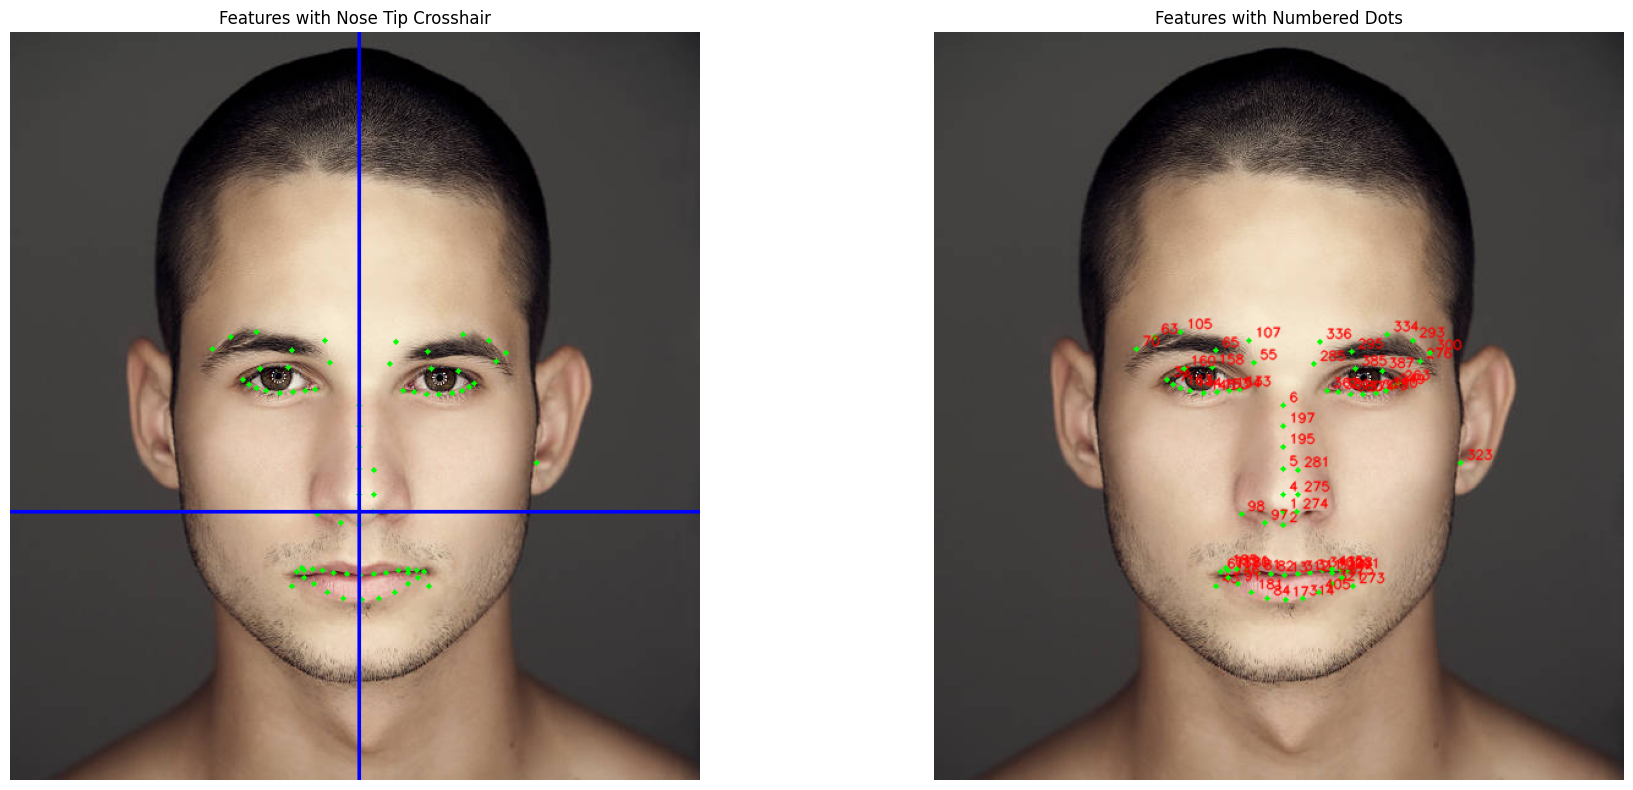

Facial feature coordinates saved to output_data/facial_features.csv

First 5 rows of the DataFrame:
   feature_id    x    y feature_type     quadrant
0           1  285  392         nose     Top-Left
1           2  285  403         nose  Bottom-Left
2           4  285  378         nose     Top-Left
3           5  285  357         nose     Top-Left
4           6  285  305         nose     Top-Left


In [19]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# --- Project Setup and Folder Structure ---
# Define file paths
PHOTO_PATH = 'input_photos/trial_photo.jpg' # !!! IMPORTANT: Replace with your actual image file name
OUTPUT_CSV_PATH = 'output_data/facial_features.csv'
OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH = 'output_images/detected_features_nose_tip_crosshair.png'
OUTPUT_IMAGE_NUMBERED_DOTS_PATH = 'output_images/detected_features_numbered_dots.png' # New output image path

# Create output directories if they don't exist
os.makedirs(os.path.dirname(OUTPUT_CSV_PATH), exist_ok=True)
os.makedirs(os.path.dirname(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH), exist_ok=True)
# The parent directory for OUTPUT_IMAGE_NUMBERED_DOTS_PATH is also 'output_images',
# so it's covered by the line above.

print("Folder structure and paths initialized.")

# --- Step 2: Load the Photo and Initialize Face Mesh ---
image_original = cv2.imread(PHOTO_PATH)

if image_original is None:
    print(f"Error: Could not load image from {PHOTO_PATH}")
else:
    # Make copies of the image for different drawings
    image_for_crosshair = image_original.copy()
    image_for_numbered_dots = image_original.copy() # New copy for numbered dots

    image_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

    mp_face_mesh = mp.solutions.face_mesh
    # We use a context manager 'with' to ensure resources are released properly
    with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5) as face_mesh:

        print("Image loaded and Face Mesh initialized.")

        results = face_mesh.process(image_rgb)

        feature_coords = []
        nose_tip_x, nose_tip_y = -1, -1 # Initialize nose tip coordinates

        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                img_h, img_w, _ = image_original.shape

                # Define specific landmark indices for eyebrows, eyes, nose, and lips
                # These are approximate and common indices for these features.
                # You might need to refine them based on your exact requirements by consulting
                # MediaPipe Face Mesh documentation or visualizing all 468 landmarks.

                # Eyebrows (approximate common indices)
                eyebrow_indices = [
                    55, 65, 107, 105, 63, 70, # left eyebrow
                    285, 295, 336, 334, 293, 300 # right eyebrow
                ]

                # Eyes (approximate common indices)
                eye_indices = [
                    33, 160, 158, 133, 153, 144, # left eye outer
                    263, 387, 385, 362, 380, 373, # right eye outer
                    7, 163, 145, 154, # left eye inner
                    249, 390, 374, 381 # right eye inner
                ]

                # Nose (approximate common indices)
                nose_indices = [
                    1, 2, 4, 5, 6, 98, 97, 195, 197, # nose bridge and tip
                    43, 273, 274, 275, 276, 281, 323 # nose wings/nostrils
                ]

                # Lips (approximate common indices)
                lip_indices = [
                    61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291, 185, # outer lips
                    78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308, 324 # inner lips
                ]

                # Combine all desired feature indices
                desired_feature_indices = set(eyebrow_indices + eye_indices + nose_indices + lip_indices)

                # Find the nose tip landmark (landmark 1 is often the nose tip or very close)
                if 1 in desired_feature_indices: # Ensure landmark 1 is among the desired features
                    nose_tip_landmark = face_landmarks.landmark[1]
                    nose_tip_x = int(nose_tip_landmark.x * img_w)
                    nose_tip_y = int(nose_tip_landmark.y * img_h)

                for i, landmark in enumerate(face_landmarks.landmark):
                    if i in desired_feature_indices:
                        x = int(landmark.x * img_w)
                        y = int(landmark.y * img_h)

                        feature_info = {'feature_id': i, 'x': x, 'y': y, 'feature_type': ''}

                        if i in eyebrow_indices:
                            feature_info['feature_type'] = 'eyebrow'
                        elif i in eye_indices:
                            feature_info['feature_type'] = 'eye'
                        elif i in nose_indices:
                            feature_info['feature_type'] = 'nose'
                        elif i in lip_indices:
                            feature_info['feature_type'] = 'lip'

                        feature_coords.append(feature_info)

                        # Draw green dot on both image copies
                        cv2.circle(image_for_crosshair, (x, y), 2, (0, 255, 0), -1)
                        cv2.circle(image_for_numbered_dots, (x, y), 2, (0, 255, 0), -1)

                        # Draw the landmark ID number beside the dot on the specific image
                        # Choose font, scale, color, and thickness
                        font = cv2.FONT_HERSHEY_SIMPLEX
                        font_scale = 0.35
                        font_thickness = 1
                        text_color = (0, 0, 255) # Red color for numbers

                        # Position the text slightly to the right and above the dot
                        text_offset_x = 5
                        text_offset_y = -3
                        cv2.putText(image_for_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                                    font, font_scale, text_color, font_thickness, cv2.LINE_AA)
        else:
            print("No face landmarks detected in the image.")

    # --- Step 3: Divide the Photo with Crosshair at Nose Tip ---
    # Determine the crosshair position based on the nose tip
    # If nose tip not found (e.g., no face detected), fall back to image center
    mid_x = nose_tip_x if nose_tip_x != -1 else img_w // 2
    mid_y = nose_tip_y if nose_tip_y != -1 else img_h // 2

    print(f"Crosshair position set to: ({mid_x}, {mid_y}) (Nose Tip based)")

    # Iterate through detected features and assign to quadrants based on nose tip crosshair
    for feature in feature_coords:
        x = feature['x']
        y = feature['y']

        if x <= mid_x and y <= mid_y:
            feature['quadrant'] = 'Top-Left'
        elif x > mid_x and y <= mid_y:
            feature['quadrant'] = 'Top-Right'
        elif x <= mid_x and y > mid_y:
            feature['quadrant'] = 'Bottom-Left'
        else:
            feature['quadrant'] = 'Bottom-Right'

    print("Features assigned to quadrants based on nose tip crosshair.")

    # Draw quadrant lines on the image_for_crosshair (blue)
    cv2.line(image_for_crosshair, (mid_x, 0), (mid_x, img_h), (255, 0, 0), 2)  # Vertical line
    cv2.line(image_for_crosshair, (0, mid_y), (img_w, mid_y), (255, 0, 0), 2)  # Horizontal line

    # --- Step 4: Save and Display the Detected Features Images ---

    # Save the image with drawn features and nose tip crosshair
    cv2.imwrite(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH, image_for_crosshair)
    print(f"Image with detected features and nose tip crosshair saved to {OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH}")

    # Save the image with numbered dots
    cv2.imwrite(OUTPUT_IMAGE_NUMBERED_DOTS_PATH, image_for_numbered_dots)
    print(f"Image with numbered features saved to {OUTPUT_IMAGE_NUMBERED_DOTS_PATH}")

    # Display both images (optional, for Jupyter Notebook)
    plt.figure(figsize=(20, 8)) # Adjust figure size to accommodate two plots

    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    plt.imshow(cv2.cvtColor(image_for_crosshair, cv2.COLOR_BGR2RGB))
    plt.title("Features with Nose Tip Crosshair")
    plt.axis('off')

    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    plt.imshow(cv2.cvtColor(image_for_numbered_dots, cv2.COLOR_BGR2RGB))
    plt.title("Features with Numbered Dots")
    plt.axis('off')

    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show()

    # --- Step 5: Save Features to CSV File ---
    df = pd.DataFrame(feature_coords)
    df.to_csv(OUTPUT_CSV_PATH, index=False)

    print(f"Facial feature coordinates saved to {OUTPUT_CSV_PATH}")
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())

Folder structure and paths initialized.
Image loaded and Face Mesh initialized.
Crosshair position set to: (285, 392) (Nose Tip based)
Features assigned to quadrants based on nose tip crosshair.
Image with detected features and nose tip crosshair saved to output_images/detected_features_nose_tip_crosshair.png
Image with numbered features (original background) saved to output_images/detected_features_numbered_dots.png
Blank image with dots saved to output_images/detected_features_blank_dots.png
Blank image with numbered dots saved to output_images/detected_features_blank_numbered_dots.png


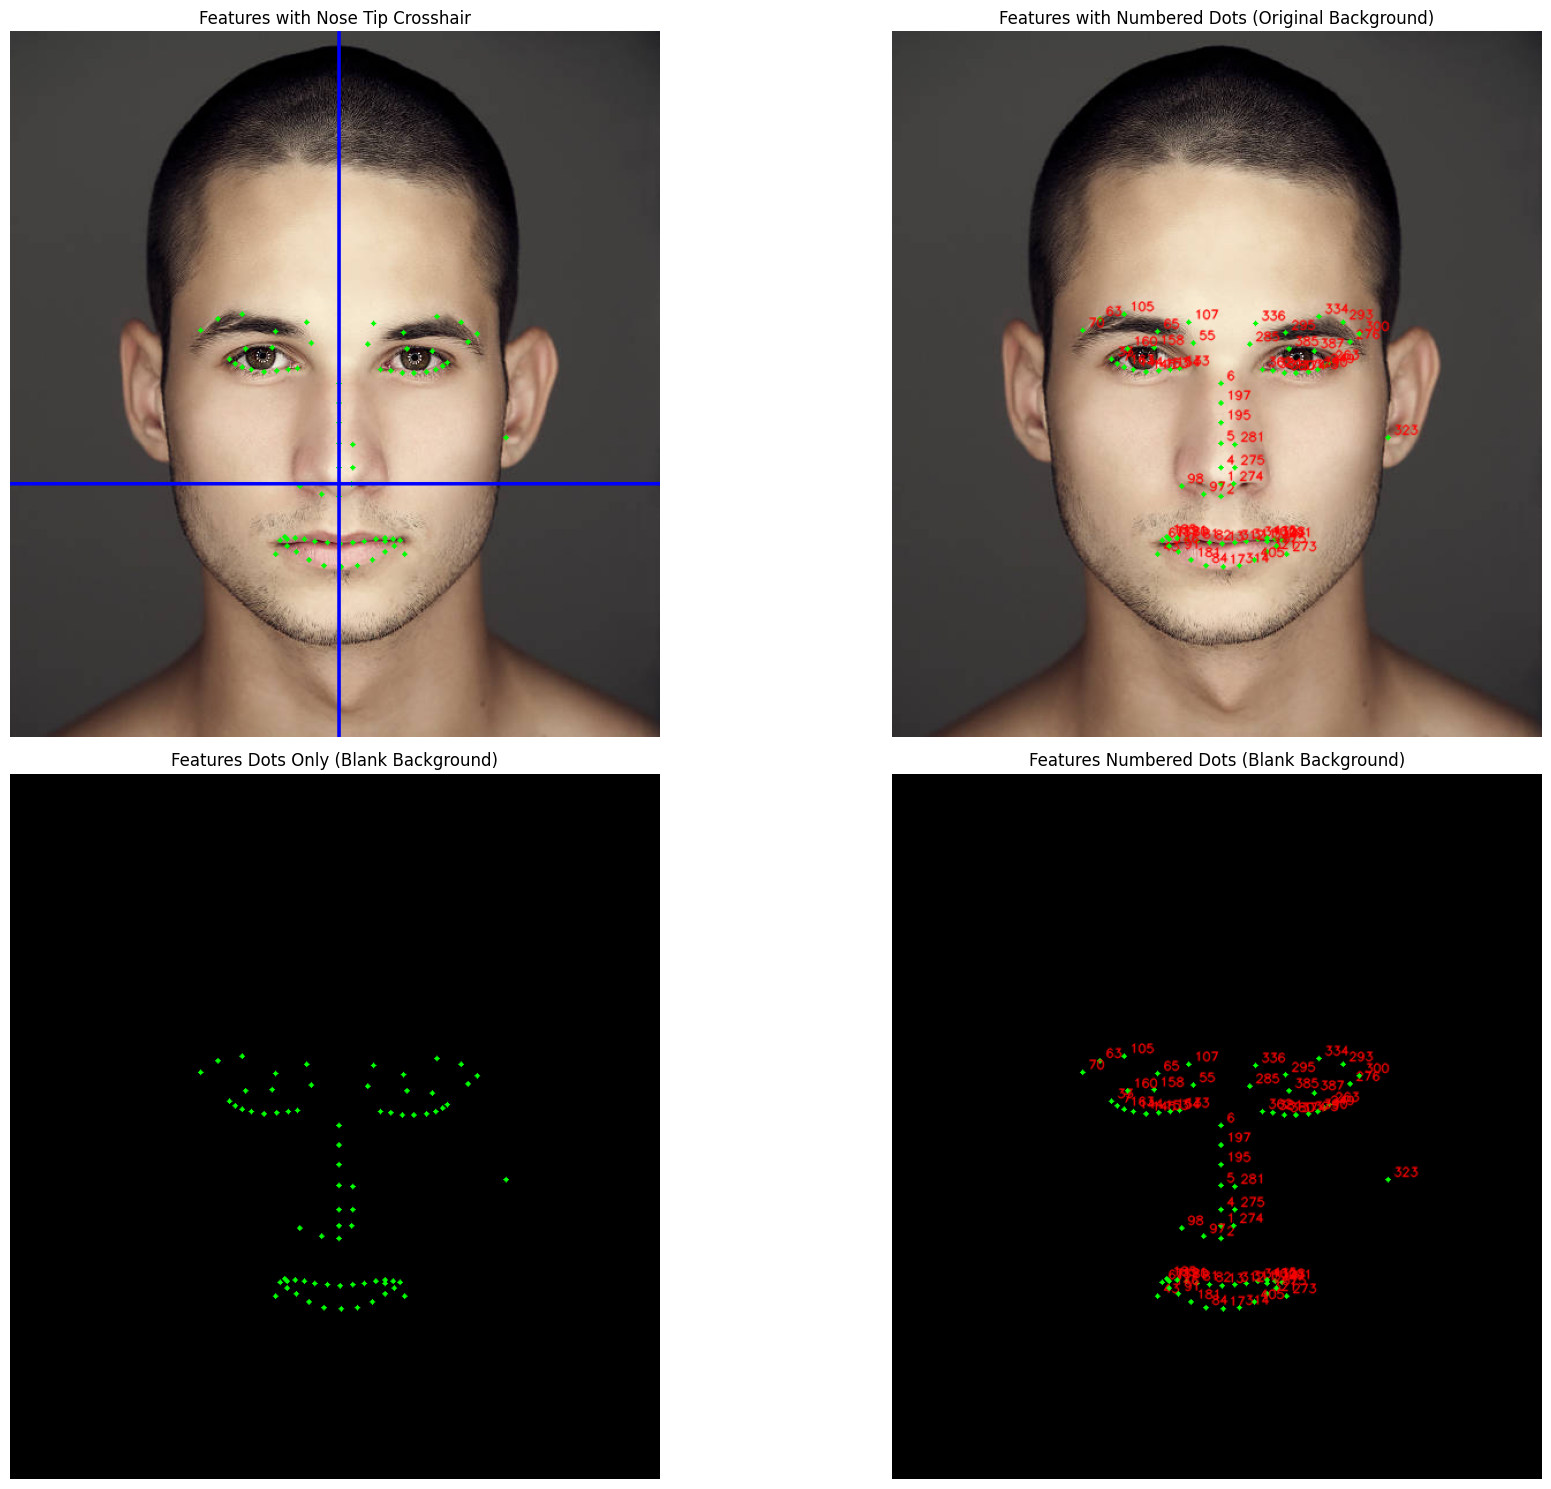

Facial feature coordinates saved to output_data/facial_features.csv

First 5 rows of the DataFrame:
   feature_id    x    y feature_type     quadrant
0           1  285  392         nose     Top-Left
1           2  285  403         nose  Bottom-Left
2           4  285  378         nose     Top-Left
3           5  285  357         nose     Top-Left
4           6  285  305         nose     Top-Left


In [7]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# --- Project Setup and Folder Structure ---
# Define file paths
PHOTO_PATH = 'input_photos/trial_photo.jpg' # !!! IMPORTANT: Replace with your actual image file name
OUTPUT_CSV_PATH = 'output_data/facial_features.csv'
OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH = 'output_images/detected_features_nose_tip_crosshair.png'
OUTPUT_IMAGE_NUMBERED_DOTS_PATH = 'output_images/detected_features_numbered_dots.png'
OUTPUT_IMAGE_BLANK_DOTS_PATH = 'output_images/detected_features_blank_dots.png' # New output path
OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH = 'output_images/detected_features_blank_numbered_dots.png' # New output path


# Create output directories if they don't exist
os.makedirs(os.path.dirname(OUTPUT_CSV_PATH), exist_ok=True)
os.makedirs(os.path.dirname(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH), exist_ok=True)
# The output_images directory is already created by the line above for other paths.

print("Folder structure and paths initialized.")

# --- Step 2: Load the Photo and Initialize Face Mesh ---
image_original = cv2.imread(PHOTO_PATH)

if image_original is None:
    print(f"Error: Could not load image from {PHOTO_PATH}")
else:
    img_h, img_w, _ = image_original.shape # Get dimensions early

    # Make copies of the image for different drawings
    image_for_crosshair = image_original.copy()
    image_for_numbered_dots = image_original.copy()

    # Create blank images for new outputs (all black background)
    # Use np.zeros for black background, matching original image dimensions
    blank_image_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8) # Black background
    blank_image_numbered_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8) # Black background

    image_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

    mp_face_mesh = mp.solutions.face_mesh
    with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5) as face_mesh:

        print("Image loaded and Face Mesh initialized.")

        results = face_mesh.process(image_rgb)

        feature_coords = []
        nose_tip_x, nose_tip_y = -1, -1 # Initialize nose tip coordinates

        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                # img_h, img_w, _ = image_original.shape # Already got dimensions above

                # Define specific landmark indices for eyebrows, eyes, nose, and lips
                eyebrow_indices = [
                    55, 65, 107, 105, 63, 70, # left eyebrow
                    285, 295, 336, 334, 293, 300 # right eyebrow
                ]
                eye_indices = [
                    33, 160, 158, 133, 153, 144, # left eye outer
                    263, 387, 385, 362, 380, 373, # right eye outer
                    7, 163, 145, 154, # left eye inner
                    249, 390, 374, 381 # right eye inner
                ]
                nose_indices = [
                    1, 2, 4, 5, 6, 98, 97, 195, 197, # nose bridge and tip
                    43, 273, 274, 275, 276, 281, 323 # nose wings/nostrils
                ]
                lip_indices = [
                    61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291, 185, # outer lips
                    78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308, 324 # inner lips
                ]

                desired_feature_indices = set(eyebrow_indices + eye_indices + nose_indices + lip_indices)

                # Find the nose tip landmark (landmark 1 is often the nose tip or very close)
                if 1 in desired_feature_indices:
                    nose_tip_landmark = face_landmarks.landmark[1]
                    nose_tip_x = int(nose_tip_landmark.x * img_w)
                    nose_tip_y = int(nose_tip_landmark.y * img_h)

                # Define font properties for drawing numbers
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 0.35
                font_thickness = 1
                text_color = (0, 0, 255) # Red color for numbers
                text_offset_x = 5
                text_offset_y = -3

                for i, landmark in enumerate(face_landmarks.landmark):
                    if i in desired_feature_indices:
                        x = int(landmark.x * img_w)
                        y = int(landmark.y * img_h)

                        feature_info = {'feature_id': i, 'x': x, 'y': y, 'feature_type': ''}

                        if i in eyebrow_indices:
                            feature_info['feature_type'] = 'eyebrow'
                        elif i in eye_indices:
                            feature_info['feature_type'] = 'eye'
                        elif i in nose_indices:
                            feature_info['feature_type'] = 'nose'
                        elif i in lip_indices:
                            feature_info['feature_type'] = 'lip'

                        feature_coords.append(feature_info)

                        # Draw green dot on all relevant image copies
                        cv2.circle(image_for_crosshair, (x, y), 2, (0, 255, 0), -1)
                        cv2.circle(image_for_numbered_dots, (x, y), 2, (0, 255, 0), -1)
                        cv2.circle(blank_image_dots, (x, y), 2, (0, 255, 0), -1) # Draw on blank image for dots
                        cv2.circle(blank_image_numbered_dots, (x, y), 2, (0, 255, 0), -1) # Draw on blank image for numbered dots

                        # Draw the landmark ID number beside the dot on specific images
                        cv2.putText(image_for_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                                    font, font_scale, text_color, font_thickness, cv2.LINE_AA)
                        cv2.putText(blank_image_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                                    font, font_scale, text_color, font_thickness, cv2.LINE_AA) # Draw on blank image for numbered dots
        else:
            print("No face landmarks detected in the image.")

    # --- Step 3: Divide the Photo with Crosshair at Nose Tip ---
    # Determine the crosshair position based on the nose tip
    mid_x = nose_tip_x if nose_tip_x != -1 else img_w // 2
    mid_y = nose_tip_y if nose_tip_y != -1 else img_h // 2

    print(f"Crosshair position set to: ({mid_x}, {mid_y}) (Nose Tip based)")

    # Iterate through detected features and assign to quadrants based on nose tip crosshair
    for feature in feature_coords:
        x = feature['x']
        y = feature['y']

        if x <= mid_x and y <= mid_y:
            feature['quadrant'] = 'Top-Left'
        elif x > mid_x and y <= mid_y:
            feature['quadrant'] = 'Top-Right'
        elif x <= mid_x and y > mid_y:
            feature['quadrant'] = 'Bottom-Left'
        else:
            feature['quadrant'] = 'Bottom-Right'

    print("Features assigned to quadrants based on nose tip crosshair.")

    # Draw quadrant lines on the image_for_crosshair (blue)
    cv2.line(image_for_crosshair, (mid_x, 0), (mid_x, img_h), (255, 0, 0), 2)  # Vertical line
    cv2.line(image_for_crosshair, (0, mid_y), (img_w, mid_y), (255, 0, 0), 2)  # Horizontal line

    # --- Step 4: Save and Display All Detected Features Images ---

    # Save the image with drawn features and nose tip crosshair
    cv2.imwrite(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH, image_for_crosshair)
    print(f"Image with detected features and nose tip crosshair saved to {OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH}")

    # Save the image with numbered dots (original background)
    cv2.imwrite(OUTPUT_IMAGE_NUMBERED_DOTS_PATH, image_for_numbered_dots)
    print(f"Image with numbered features (original background) saved to {OUTPUT_IMAGE_NUMBERED_DOTS_PATH}")

    # Save the blank image with dots
    cv2.imwrite(OUTPUT_IMAGE_BLANK_DOTS_PATH, blank_image_dots)
    print(f"Blank image with dots saved to {OUTPUT_IMAGE_BLANK_DOTS_PATH}")

    # Save the blank image with numbered dots
    cv2.imwrite(OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH, blank_image_numbered_dots)
    print(f"Blank image with numbered dots saved to {OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH}")


    # Display all images (optional, for Jupyter Notebook)
    plt.figure(figsize=(20, 15)) # Adjust figure size to accommodate four plots

    plt.subplot(2, 2, 1) # 2 rows, 2 columns, first plot
    plt.imshow(cv2.cvtColor(image_for_crosshair, cv2.COLOR_BGR2RGB))
    plt.title("Features with Nose Tip Crosshair")
    plt.axis('off')

    plt.subplot(2, 2, 2) # 2 rows, 2 columns, second plot
    plt.imshow(cv2.cvtColor(image_for_numbered_dots, cv2.COLOR_BGR2RGB))
    plt.title("Features with Numbered Dots (Original Background)")
    plt.axis('off')

    plt.subplot(2, 2, 3) # 2 rows, 2 columns, third plot
    plt.imshow(cv2.cvtColor(blank_image_dots, cv2.COLOR_BGR2RGB))
    plt.title("Features Dots Only (Blank Background)")
    plt.axis('off')

    plt.subplot(2, 2, 4) # 2 rows, 2 columns, fourth plot
    plt.imshow(cv2.cvtColor(blank_image_numbered_dots, cv2.COLOR_BGR2RGB))
    plt.title("Features Numbered Dots (Blank Background)")
    plt.axis('off')

    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show()

    # --- Step 5: Save Features to CSV File ---
    df = pd.DataFrame(feature_coords)
    df.to_csv(OUTPUT_CSV_PATH, index=False)

    print(f"Facial feature coordinates saved to {OUTPUT_CSV_PATH}")
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())

Folder structure and paths initialized.
Image loaded and Face Mesh initialized.
Crosshair position set to: (285, 392) (Nose Tip based)
Features assigned to quadrants based on nose tip crosshair.
Image with detected features and nose tip crosshair saved to output_images/detected_features_nose_tip_crosshair.png
Image with numbered features (original background) saved to output_images/detected_features_numbered_dots.png
Blank image with dots saved to output_images/detected_features_blank_dots.png
Blank image with numbered dots saved to output_images/detected_features_blank_numbered_dots.png


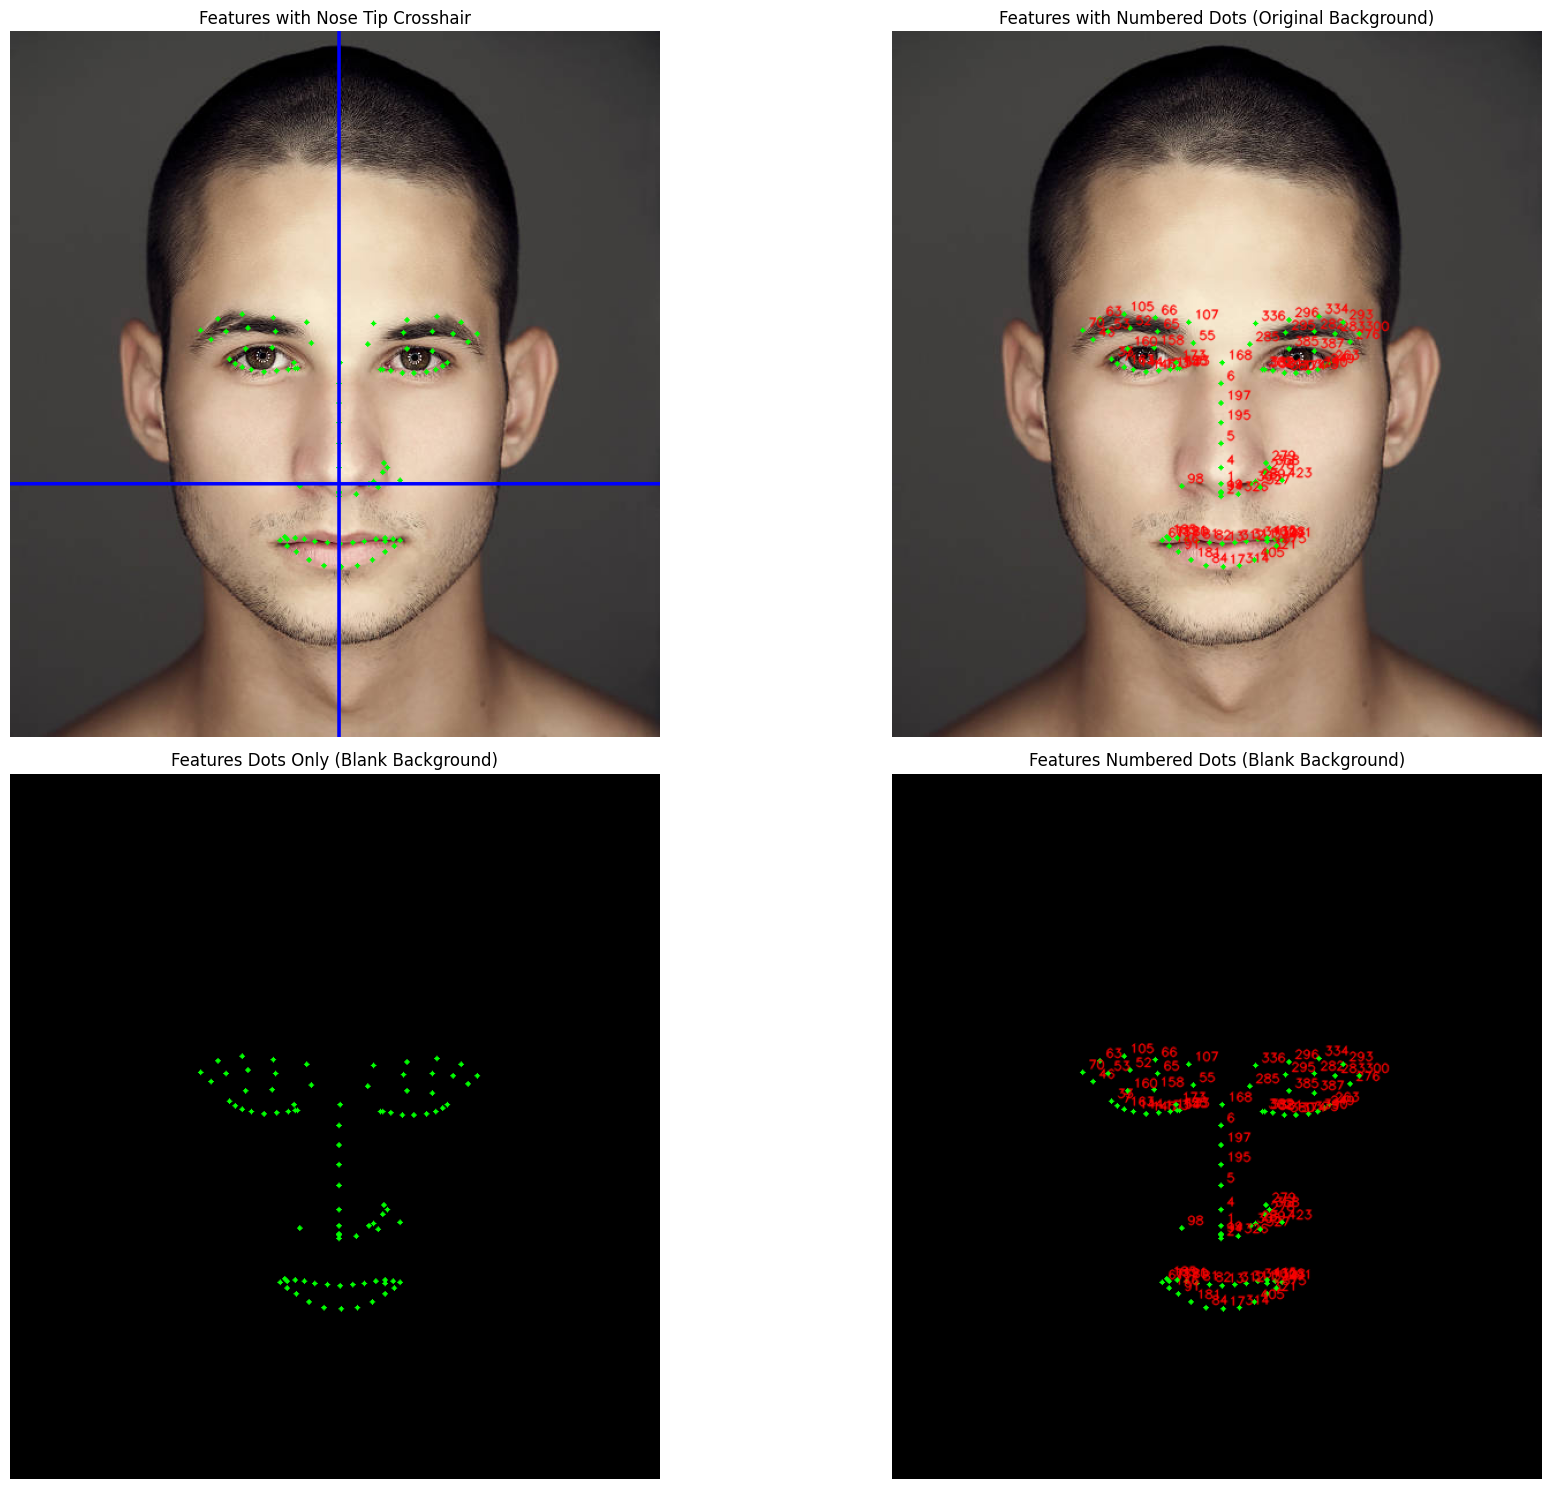

Facial feature coordinates saved to output_data/facial_features.csv

First 5 rows of the DataFrame:
   feature_id    x    y feature_type     quadrant
0           1  285  392         nose     Top-Left
1           2  285  403         nose  Bottom-Left
2           4  285  378         nose     Top-Left
3           5  285  357         nose     Top-Left
4           6  285  305         nose     Top-Left


In [8]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# --- Project Setup and Folder Structure ---
# Define file paths
PHOTO_PATH = 'input_photos/trial_photo.jpg' # !!! IMPORTANT: Replace with your actual image file name
OUTPUT_CSV_PATH = 'output_data/facial_features.csv'
OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH = 'output_images/detected_features_nose_tip_crosshair.png'
OUTPUT_IMAGE_NUMBERED_DOTS_PATH = 'output_images/detected_features_numbered_dots.png'
OUTPUT_IMAGE_BLANK_DOTS_PATH = 'output_images/detected_features_blank_dots.png' # New output path
OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH = 'output_images/detected_features_blank_numbered_dots.png' # New output path


# Create output directories if they don't exist
os.makedirs(os.path.dirname(OUTPUT_CSV_PATH), exist_ok=True)
os.makedirs(os.path.dirname(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH), exist_ok=True)
# The output_images directory is already created by the line above for other paths.

print("Folder structure and paths initialized.")

# --- Step 2: Load the Photo and Initialize Face Mesh ---
image_original = cv2.imread(PHOTO_PATH)

if image_original is None:
    print(f"Error: Could not load image from {PHOTO_PATH}")
else:
    img_h, img_w, _ = image_original.shape # Get dimensions early

    # Make copies of the image for different drawings
    image_for_crosshair = image_original.copy()
    image_for_numbered_dots = image_original.copy()

    # Create blank images for new outputs (all black background)
    # Use np.zeros for black background, matching original image dimensions
    blank_image_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8) # Black background
    blank_image_numbered_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8) # Black background

    image_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

    mp_face_mesh = mp.solutions.face_mesh
    with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5) as face_mesh:

        print("Image loaded and Face Mesh initialized.")

        results = face_mesh.process(image_rgb)

        feature_coords = []
        nose_tip_x, nose_tip_y = -1, -1 # Initialize nose tip coordinates

        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                # img_h, img_w, _ = image_original.shape # Already got dimensions above

                # Define specific landmark indices for eyebrows, eyes, nose, and lips
                # --- Improved Landmark Indices for Cleaner Detection ---
                eyebrow_indices = [
                    70, 63, 105, 66, 107, 55, 52, 65, 53, 46,  # Left Eyebrow
                    336, 296, 334, 293, 300, 285, 282, 295, 283, 276  # Right Eyebrow
                ]

                eye_indices = [
                    33, 160, 158, 133, 153, 144, 163, 7, 173, 155, 154, 145,  # Left Eye (full)
                    362, 387, 385, 263, 380, 373, 390, 249, 374, 381, 382, 362  # Right Eye (full)
                ]

                nose_indices = [
                    168, 6, 197, 195, 5, 4, 1, 19, 94, 2, 98, 327, 326, 305, 289, 278, 279, 423, 358  # Bridge + Tip + Nostrils
                ]

                lip_indices = [
                    61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291, 185,  # Outer lips
                    78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308, 324   # Inner lips
                ]

                desired_feature_indices = set(eyebrow_indices + eye_indices + nose_indices + lip_indices)

                # Find the nose tip landmark (landmark 1 is often the nose tip or very close)
                if 1 in desired_feature_indices:
                    nose_tip_landmark = face_landmarks.landmark[1]
                    nose_tip_x = int(nose_tip_landmark.x * img_w)
                    nose_tip_y = int(nose_tip_landmark.y * img_h)

                # Define font properties for drawing numbers
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 0.35
                font_thickness = 1
                text_color = (0, 0, 255) # Red color for numbers
                text_offset_x = 5
                text_offset_y = -3

                for i, landmark in enumerate(face_landmarks.landmark):
                    if i in desired_feature_indices:
                        x = int(landmark.x * img_w)
                        y = int(landmark.y * img_h)

                        feature_info = {'feature_id': i, 'x': x, 'y': y, 'feature_type': ''}

                        if i in eyebrow_indices:
                            feature_info['feature_type'] = 'eyebrow'
                        elif i in eye_indices:
                            feature_info['feature_type'] = 'eye'
                        elif i in nose_indices:
                            feature_info['feature_type'] = 'nose'
                        elif i in lip_indices:
                            feature_info['feature_type'] = 'lip'

                        feature_coords.append(feature_info)

                        # Draw green dot on all relevant image copies
                        cv2.circle(image_for_crosshair, (x, y), 2, (0, 255, 0), -1)
                        cv2.circle(image_for_numbered_dots, (x, y), 2, (0, 255, 0), -1)
                        cv2.circle(blank_image_dots, (x, y), 2, (0, 255, 0), -1) # Draw on blank image for dots
                        cv2.circle(blank_image_numbered_dots, (x, y), 2, (0, 255, 0), -1) # Draw on blank image for numbered dots

                        # Draw the landmark ID number beside the dot on specific images
                        cv2.putText(image_for_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                                    font, font_scale, text_color, font_thickness, cv2.LINE_AA)
                        cv2.putText(blank_image_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                                    font, font_scale, text_color, font_thickness, cv2.LINE_AA) # Draw on blank image for numbered dots
        else:
            print("No face landmarks detected in the image.")

    # --- Step 3: Divide the Photo with Crosshair at Nose Tip ---
    # Determine the crosshair position based on the nose tip
    mid_x = nose_tip_x if nose_tip_x != -1 else img_w // 2
    mid_y = nose_tip_y if nose_tip_y != -1 else img_h // 2

    print(f"Crosshair position set to: ({mid_x}, {mid_y}) (Nose Tip based)")

    # Iterate through detected features and assign to quadrants based on nose tip crosshair
    for feature in feature_coords:
        x = feature['x']
        y = feature['y']

        if x <= mid_x and y <= mid_y:
            feature['quadrant'] = 'Top-Left'
        elif x > mid_x and y <= mid_y:
            feature['quadrant'] = 'Top-Right'
        elif x <= mid_x and y > mid_y:
            feature['quadrant'] = 'Bottom-Left'
        else:
            feature['quadrant'] = 'Bottom-Right'

    print("Features assigned to quadrants based on nose tip crosshair.")

    # Draw quadrant lines on the image_for_crosshair (blue)
    cv2.line(image_for_crosshair, (mid_x, 0), (mid_x, img_h), (255, 0, 0), 2)  # Vertical line
    cv2.line(image_for_crosshair, (0, mid_y), (img_w, mid_y), (255, 0, 0), 2)  # Horizontal line

    # --- Step 4: Save and Display All Detected Features Images ---

    # Save the image with drawn features and nose tip crosshair
    cv2.imwrite(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH, image_for_crosshair)
    print(f"Image with detected features and nose tip crosshair saved to {OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH}")

    # Save the image with numbered dots (original background)
    cv2.imwrite(OUTPUT_IMAGE_NUMBERED_DOTS_PATH, image_for_numbered_dots)
    print(f"Image with numbered features (original background) saved to {OUTPUT_IMAGE_NUMBERED_DOTS_PATH}")

    # Save the blank image with dots
    cv2.imwrite(OUTPUT_IMAGE_BLANK_DOTS_PATH, blank_image_dots)
    print(f"Blank image with dots saved to {OUTPUT_IMAGE_BLANK_DOTS_PATH}")

    # Save the blank image with numbered dots
    cv2.imwrite(OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH, blank_image_numbered_dots)
    print(f"Blank image with numbered dots saved to {OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH}")


    # Display all images (optional, for Jupyter Notebook)
    plt.figure(figsize=(20, 15)) # Adjust figure size to accommodate four plots

    plt.subplot(2, 2, 1) # 2 rows, 2 columns, first plot
    plt.imshow(cv2.cvtColor(image_for_crosshair, cv2.COLOR_BGR2RGB))
    plt.title("Features with Nose Tip Crosshair")
    plt.axis('off')

    plt.subplot(2, 2, 2) # 2 rows, 2 columns, second plot
    plt.imshow(cv2.cvtColor(image_for_numbered_dots, cv2.COLOR_BGR2RGB))
    plt.title("Features with Numbered Dots (Original Background)")
    plt.axis('off')

    plt.subplot(2, 2, 3) # 2 rows, 2 columns, third plot
    plt.imshow(cv2.cvtColor(blank_image_dots, cv2.COLOR_BGR2RGB))
    plt.title("Features Dots Only (Blank Background)")
    plt.axis('off')

    plt.subplot(2, 2, 4) # 2 rows, 2 columns, fourth plot
    plt.imshow(cv2.cvtColor(blank_image_numbered_dots, cv2.COLOR_BGR2RGB))
    plt.title("Features Numbered Dots (Blank Background)")
    plt.axis('off')

    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show()

    # --- Step 5: Save Features to CSV File ---
    df = pd.DataFrame(feature_coords)
    df.to_csv(OUTPUT_CSV_PATH, index=False)

    print(f"Facial feature coordinates saved to {OUTPUT_CSV_PATH}")
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())

Folder structure and paths initialized.
Image loaded and Face Mesh initialized.
Crosshair position set to: (285, 392) (Nose Tip based)
Features assigned to quadrants based on nose tip crosshair.
Image with detected features and nose tip crosshair saved to output_images/detected_features_nose_tip_crosshair.png
Image with numbered features (original background) saved to output_images/detected_features_numbered_dots.png
Blank image with dots saved to output_images/detected_features_blank_dots.png
Blank image with numbered dots saved to output_images/detected_features_blank_numbered_dots.png


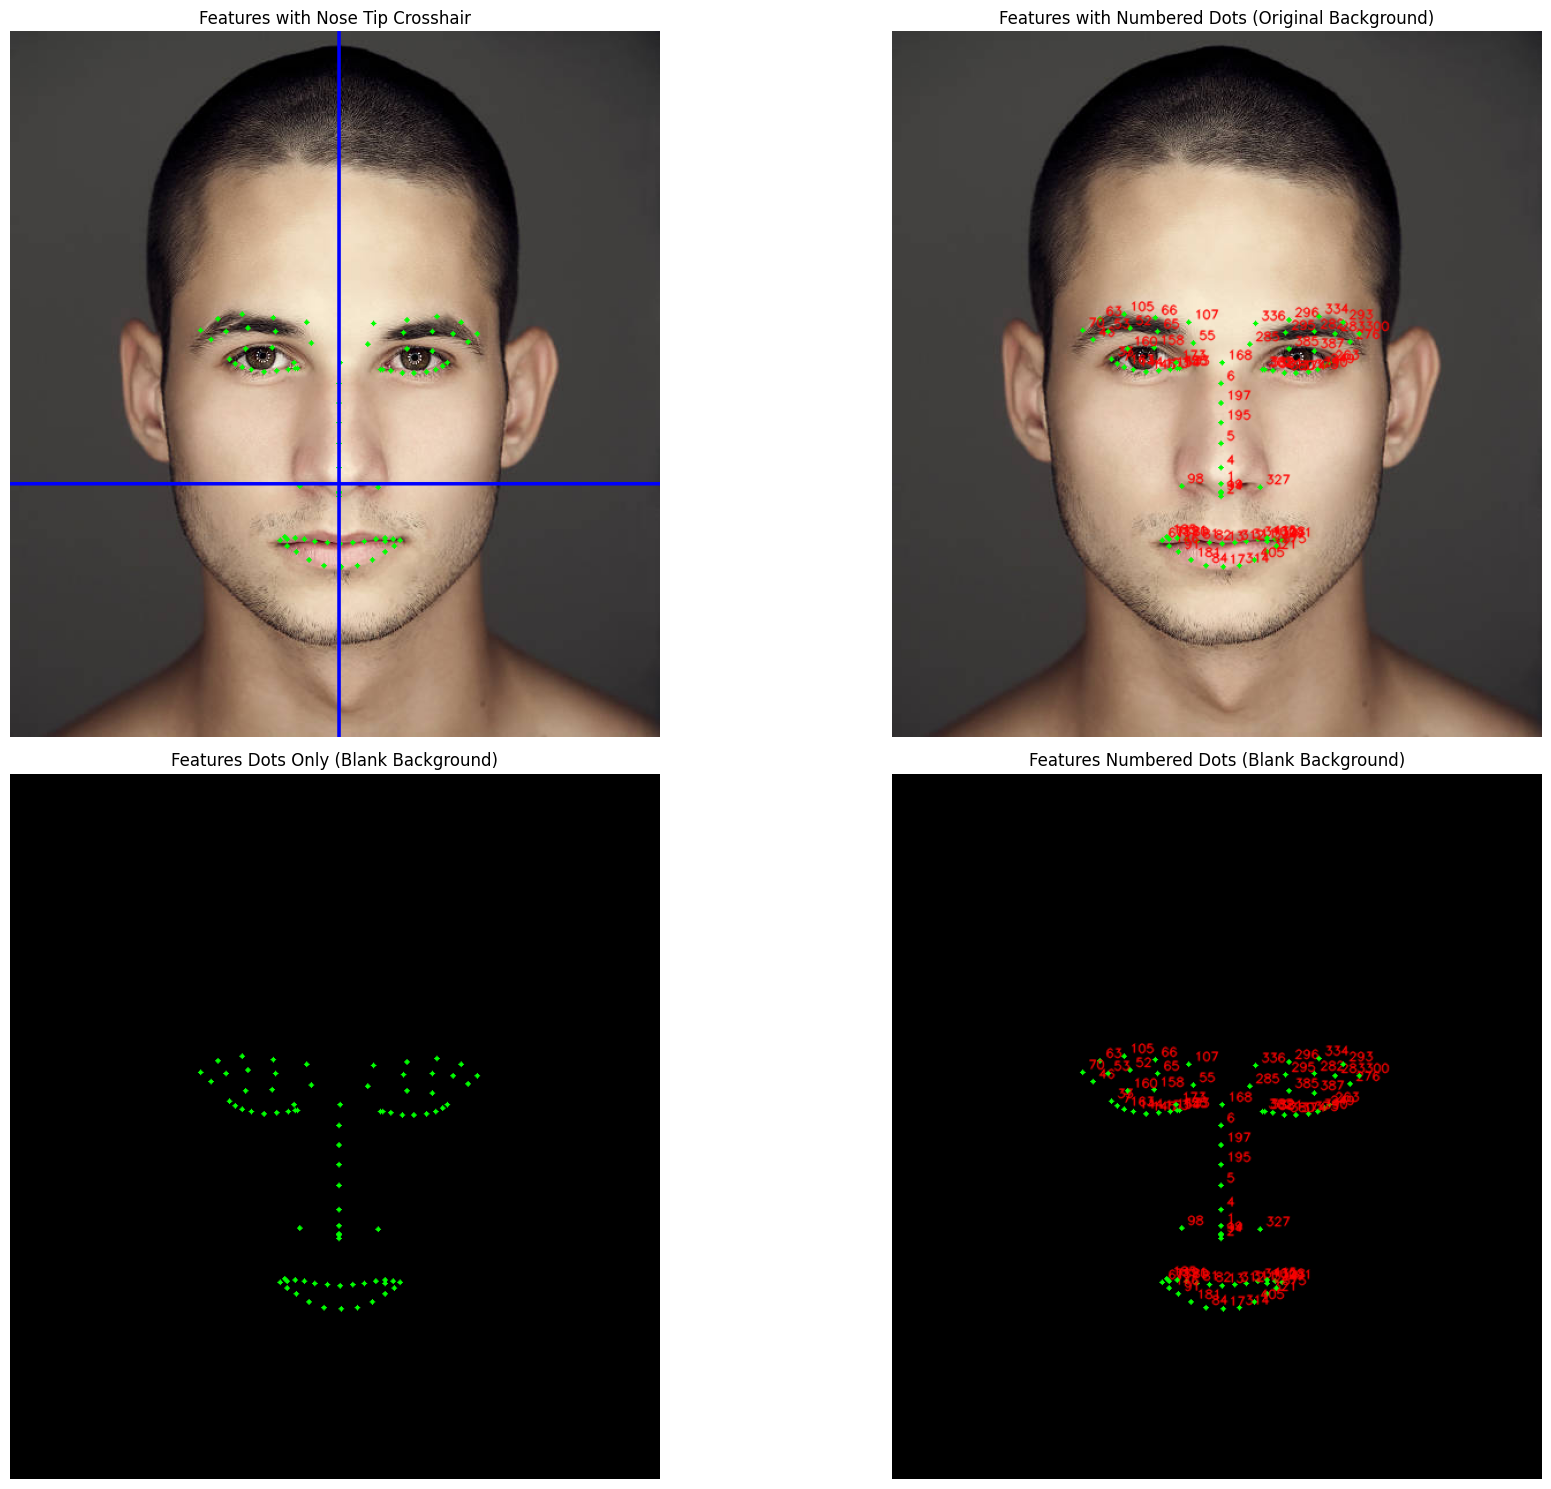

Facial feature coordinates saved to output_data/facial_features.csv

First 5 rows of the DataFrame:
   feature_id    x    y feature_type     quadrant
0           1  285  392         nose     Top-Left
1           2  285  403         nose  Bottom-Left
2           4  285  378         nose     Top-Left
3           5  285  357         nose     Top-Left
4           6  285  305         nose     Top-Left


In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# --- Project Setup and Folder Structure ---
# Define file paths
PHOTO_PATH = 'input_photos/trial_photo.jpg' # !!! IMPORTANT: Replace with your actual image file name
OUTPUT_CSV_PATH = 'output_data/facial_features.csv'
OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH = 'output_images/detected_features_nose_tip_crosshair.png'
OUTPUT_IMAGE_NUMBERED_DOTS_PATH = 'output_images/detected_features_numbered_dots.png'
OUTPUT_IMAGE_BLANK_DOTS_PATH = 'output_images/detected_features_blank_dots.png' # New output path
OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH = 'output_images/detected_features_blank_numbered_dots.png' # New output path


# Create output directories if they don't exist
os.makedirs(os.path.dirname(OUTPUT_CSV_PATH), exist_ok=True)
os.makedirs(os.path.dirname(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH), exist_ok=True)
# The output_images directory is already created by the line above for other paths.

print("Folder structure and paths initialized.")

# --- Step 2: Load the Photo and Initialize Face Mesh ---
image_original = cv2.imread(PHOTO_PATH)

if image_original is None:
    print(f"Error: Could not load image from {PHOTO_PATH}")
else:
    img_h, img_w, _ = image_original.shape # Get dimensions early

    # Make copies of the image for different drawings
    image_for_crosshair = image_original.copy()
    image_for_numbered_dots = image_original.copy()

    # Create blank images for new outputs (all black background)
    # Use np.zeros for black background, matching original image dimensions
    blank_image_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8) # Black background
    blank_image_numbered_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8) # Black background

    image_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

    mp_face_mesh = mp.solutions.face_mesh
    with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5) as face_mesh:

        print("Image loaded and Face Mesh initialized.")

        results = face_mesh.process(image_rgb)

        feature_coords = []
        nose_tip_x, nose_tip_y = -1, -1 # Initialize nose tip coordinates

        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                # img_h, img_w, _ = image_original.shape # Already got dimensions above

                # Define specific landmark indices for eyebrows, eyes, nose, and lips
                # --- Improved Landmark Indices for Cleaner Detection ---
                # --- Improved Landmark Indices for Accurate Facial Feature Detection ---

                # Left and right eyebrows
                eyebrow_indices = [
                    70, 63, 105, 66, 107, 55, 52, 65, 53, 46,  # Left eyebrow
                    336, 296, 334, 293, 300, 285, 282, 295, 283, 276  # Right eyebrow
                ]

                # Full outline of both eyes (outer and inner rims)
                eye_indices = [
                    33, 160, 158, 133, 153, 144, 163, 7, 173, 155, 154, 145,  # Left eye
                    362, 387, 385, 263, 380, 373, 390, 249, 374, 381, 382, 362  # Right eye
                ]

                # Clean anchor-shaped nose: bridge + tip + nostrils (EXCLUDES 323, 43, 273, etc.)
                nose_indices = [
                    168, 6, 197, 195, 5, 4, 1, 19, 94, 2, 98, 327, 168,  94,  2,  98, 327,  2  # Anchor structure (no outer distortion)
                ]

                # Outer and inner lips
                lip_indices = [
                    61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291, 185,  # Outer lips
                    78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308, 324    # Inner lips
                ]


                desired_feature_indices = set(eyebrow_indices + eye_indices + nose_indices + lip_indices)

                # Find the nose tip landmark (landmark 1 is often the nose tip or very close)
                if 1 in desired_feature_indices:
                    nose_tip_landmark = face_landmarks.landmark[1]
                    nose_tip_x = int(nose_tip_landmark.x * img_w)
                    nose_tip_y = int(nose_tip_landmark.y * img_h)

                # Define font properties for drawing numbers
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 0.35
                font_thickness = 1
                text_color = (0, 0, 255) # Red color for numbers
                text_offset_x = 5
                text_offset_y = -3

                for i in desired_feature_indices:
                    if i < len(face_landmarks.landmark):  # Prevents index error
                        landmark = face_landmarks.landmark[i]

                        x = int(landmark.x * img_w)
                        y = int(landmark.y * img_h)

                        feature_info = {'feature_id': i, 'x': x, 'y': y, 'feature_type': ''}

                        if i in eyebrow_indices:
                            feature_info['feature_type'] = 'eyebrow'
                        elif i in eye_indices:
                            feature_info['feature_type'] = 'eye'
                        elif i in nose_indices:
                            feature_info['feature_type'] = 'nose'
                        elif i in lip_indices:
                            feature_info['feature_type'] = 'lip'

                        feature_coords.append(feature_info)

                        # Draw green dot on all relevant image copies
                        cv2.circle(image_for_crosshair, (x, y), 2, (0, 255, 0), -1)
                        cv2.circle(image_for_numbered_dots, (x, y), 2, (0, 255, 0), -1)
                        cv2.circle(blank_image_dots, (x, y), 2, (0, 255, 0), -1) # Draw on blank image for dots
                        cv2.circle(blank_image_numbered_dots, (x, y), 2, (0, 255, 0), -1) # Draw on blank image for numbered dots

                        # Draw the landmark ID number beside the dot on specific images
                        cv2.putText(image_for_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                                    font, font_scale, text_color, font_thickness, cv2.LINE_AA)
                        cv2.putText(blank_image_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                                    font, font_scale, text_color, font_thickness, cv2.LINE_AA) # Draw on blank image for numbered dots
        else:
            print("No face landmarks detected in the image.")

    # --- Step 3: Divide the Photo with Crosshair at Nose Tip ---
    # Determine the crosshair position based on the nose tip
    mid_x = nose_tip_x if nose_tip_x != -1 else img_w // 2
    mid_y = nose_tip_y if nose_tip_y != -1 else img_h // 2

    print(f"Crosshair position set to: ({mid_x}, {mid_y}) (Nose Tip based)")

    # Iterate through detected features and assign to quadrants based on nose tip crosshair
    for feature in feature_coords:
        x = feature['x']
        y = feature['y']

        if x <= mid_x and y <= mid_y:
            feature['quadrant'] = 'Top-Left'
        elif x > mid_x and y <= mid_y:
            feature['quadrant'] = 'Top-Right'
        elif x <= mid_x and y > mid_y:
            feature['quadrant'] = 'Bottom-Left'
        else:
            feature['quadrant'] = 'Bottom-Right'

    print("Features assigned to quadrants based on nose tip crosshair.")

    # Draw quadrant lines on the image_for_crosshair (blue)
    cv2.line(image_for_crosshair, (mid_x, 0), (mid_x, img_h), (255, 0, 0), 2)  # Vertical line
    cv2.line(image_for_crosshair, (0, mid_y), (img_w, mid_y), (255, 0, 0), 2)  # Horizontal line

    # --- Step 4: Save and Display All Detected Features Images ---

    # Save the image with drawn features and nose tip crosshair
    cv2.imwrite(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH, image_for_crosshair)
    print(f"Image with detected features and nose tip crosshair saved to {OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH}")

    # Save the image with numbered dots (original background)
    cv2.imwrite(OUTPUT_IMAGE_NUMBERED_DOTS_PATH, image_for_numbered_dots)
    print(f"Image with numbered features (original background) saved to {OUTPUT_IMAGE_NUMBERED_DOTS_PATH}")

    # Save the blank image with dots
    cv2.imwrite(OUTPUT_IMAGE_BLANK_DOTS_PATH, blank_image_dots)
    print(f"Blank image with dots saved to {OUTPUT_IMAGE_BLANK_DOTS_PATH}")

    # Save the blank image with numbered dots
    cv2.imwrite(OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH, blank_image_numbered_dots)
    print(f"Blank image with numbered dots saved to {OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH}")


    # Display all images (optional, for Jupyter Notebook)
    plt.figure(figsize=(20, 15)) # Adjust figure size to accommodate four plots

    plt.subplot(2, 2, 1) # 2 rows, 2 columns, first plot
    plt.imshow(cv2.cvtColor(image_for_crosshair, cv2.COLOR_BGR2RGB))
    plt.title("Features with Nose Tip Crosshair")
    plt.axis('off')

    plt.subplot(2, 2, 2) # 2 rows, 2 columns, second plot
    plt.imshow(cv2.cvtColor(image_for_numbered_dots, cv2.COLOR_BGR2RGB))
    plt.title("Features with Numbered Dots (Original Background)")
    plt.axis('off')

    plt.subplot(2, 2, 3) # 2 rows, 2 columns, third plot
    plt.imshow(cv2.cvtColor(blank_image_dots, cv2.COLOR_BGR2RGB))
    plt.title("Features Dots Only (Blank Background)")
    plt.axis('off')

    plt.subplot(2, 2, 4) # 2 rows, 2 columns, fourth plot
    plt.imshow(cv2.cvtColor(blank_image_numbered_dots, cv2.COLOR_BGR2RGB))
    plt.title("Features Numbered Dots (Blank Background)")
    plt.axis('off')

    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show()

    # --- Step 5: Save Features to CSV File ---
    df = pd.DataFrame(feature_coords)
    df.to_csv(OUTPUT_CSV_PATH, index=False)

    print(f"Facial feature coordinates saved to {OUTPUT_CSV_PATH}")
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())

In [ ]:
import cv2
# import mediapipe as mp
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
import os

# --- Project Setup and Folder Structure ---
PHOTO_PATH = 'input_photos/trial_photo.jpg'
# OUTPUT_CSV_PATH = 'output_data/facial_features.csv'
# OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH = 'output_images/detected_features_nose_tip_crosshair.png'
# OUTPUT_IMAGE_NUMBERED_DOTS_PATH = 'output_images/detected_features_numbered_dots.png'
# OUTPUT_IMAGE_BLANK_DOTS_PATH = 'output_images/detected_features_blank_dots.png'
# OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH = 'output_images/detected_features_blank_numbered_dots.png'

# # Create output directories if they don't exist
# os.makedirs(os.path.dirname(OUTPUT_CSV_PATH), exist_ok=True)
# os.makedirs(os.path.dirname(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH), exist_ok=True)

# print("Folder structure and paths initialized.")

# --- Step 2: Load the Photo and Initialize Face Mesh ---
image_original = cv2.imread(PHOTO_PATH)
cv2.imshow('bgr image',image_original)


# if image_original is None:
#     print(f"Error: Could not load image from {PHOTO_PATH}")
#     exit()

# img_h, img_w, _ = image_original.shape

# # Make copies of the image for different drawings
# image_for_crosshair = image_original.copy()
# image_for_numbered_dots = image_original.copy()
# blank_image_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8)
# blank_image_numbered_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8)

image_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
cv2.imshow('rgb image',image_rgb)
# mp_face_mesh = mp.solutions.face_mesh

# with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5) as face_mesh:
#     print("Image loaded and Face Mesh initialized.")

#     results = face_mesh.process(image_rgb)
#     feature_coords = []
#     nose_tip_x, nose_tip_y = -1, -1

#     if results.multi_face_landmarks:
#         for face_landmarks in results.multi_face_landmarks:
#             # --- Clean landmark indices for specific features ---
#             eyebrow_indices = [
#                 70, 63, 105, 66, 107, 55, 52, 65, 53, 46,
#                 336, 296, 334, 293, 300, 285, 282, 295, 283, 276
#             ]
#             eye_indices = [
#                 33, 160, 158, 133, 153, 144, 163, 7, 173, 155, 154, 145,
#                 362, 387, 385, 263, 380, 373, 390, 249, 374, 381, 382
#             ]
#             nose_indices = [
#                 168, 6, 197, 195, 5, 4, 1, 19, 94, 2, 98, 327
#             ]
#             lip_indices = [
#                 61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291, 185,
#                 78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308, 324
#             ]

#             desired_feature_indices = set(eyebrow_indices + eye_indices + nose_indices + lip_indices)

#             # ---- SCALE UP for better spacing ----
#             scale_factor = 2.5
#             scaled_h = int(img_h * scale_factor)
#             scaled_w = int(img_w * scale_factor)

#             image_for_crosshair = cv2.resize(image_for_crosshair, (scaled_w, scaled_h))
#             image_for_numbered_dots = cv2.resize(image_for_numbered_dots, (scaled_w, scaled_h))
#             blank_image_dots = cv2.resize(blank_image_dots, (scaled_w, scaled_h))
#             blank_image_numbered_dots = cv2.resize(blank_image_numbered_dots, (scaled_w, scaled_h))

#             if 1 in desired_feature_indices:
#                 nose_tip_landmark = face_landmarks.landmark[1]
#                 nose_tip_x = int(nose_tip_landmark.x * scaled_w)
#                 nose_tip_y = int(nose_tip_landmark.y * scaled_h)

#             font = cv2.FONT_HERSHEY_SIMPLEX
#             font_scale = 0.5
#             font_thickness = 1
#             text_color = (0, 0, 255)
#             text_offset_x = 10
#             text_offset_y = -10

#             for i in desired_feature_indices:
#                 if i < len(face_landmarks.landmark):
#                     landmark = face_landmarks.landmark[i]
#                     x = int(landmark.x * scaled_w)
#                     y = int(landmark.y * scaled_h)

#                     feature_info = {
#                         'feature_id': i,
#                         'x': int(x / scale_factor),
#                         'y': int(y / scale_factor),
#                         'feature_type': ''
#                     }

#                     if i in eyebrow_indices:
#                         feature_info['feature_type'] = 'eyebrow'
#                     elif i in eye_indices:
#                         feature_info['feature_type'] = 'eye'
#                     elif i in nose_indices:
#                         feature_info['feature_type'] = 'nose'
#                     elif i in lip_indices:
#                         feature_info['feature_type'] = 'lip'

#                     feature_coords.append(feature_info)

#                     cv2.circle(image_for_crosshair, (x, y), 4, (0, 255, 0), -1)
#                     cv2.circle(image_for_numbered_dots, (x, y), 4, (0, 255, 0), -1)
#                     cv2.circle(blank_image_dots, (x, y), 4, (0, 255, 0), -1)
#                     cv2.circle(blank_image_numbered_dots, (x, y), 4, (0, 255, 0), -1)

#                     cv2.putText(image_for_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
#                                 font, font_scale, text_color, font_thickness, cv2.LINE_AA)
#                     cv2.putText(blank_image_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
#                                 font, font_scale, text_color, font_thickness, cv2.LINE_AA)

#             # Resize back to original dimensions
#             image_for_crosshair = cv2.resize(image_for_crosshair, (img_w, img_h))
#             image_for_numbered_dots = cv2.resize(image_for_numbered_dots, (img_w, img_h))
#             blank_image_dots = cv2.resize(blank_image_dots, (img_w, img_h))
#             blank_image_numbered_dots = cv2.resize(blank_image_numbered_dots, (img_w, img_h))
#     else:
#         print("No face landmarks detected in the image.")
#         exit()

# # --- Step 3: Divide the Photo with Crosshair at Nose Tip ---

# # Determine the crosshair position based on the nose tip
# if nose_tip_x != -1 and nose_tip_y != -1:
#     # Scale nose tip back to original image size
#     mid_x = int(nose_tip_x / scale_factor)
#     mid_y = int(nose_tip_y / scale_factor)
# else:
#     mid_x = img_w // 2
#     mid_y = img_h // 2

# print(f"Crosshair position set to: ({mid_x}, {mid_y}) (Nose Tip based)")

# # Draw vertical and horizontal crosshair lines on the image
# cv2.line(image_for_crosshair, (mid_x, 0), (mid_x, img_h), (0, 0, 255), 2)  # Vertical axis
# cv2.line(image_for_crosshair, (0, mid_y), (img_w, mid_y), (0, 0, 255), 2)  # Horizontal axis

# # Iterate through detected features and assign to quadrants based on nose tip crosshair
# for feature in feature_coords:
#     x = feature['x']
#     y = feature['y']

#     if x <= mid_x and y <= mid_y:
#         quadrant = 'Top-Left'
#     elif x > mid_x and y <= mid_y:
#         quadrant = 'Top-Right'
#     elif x <= mid_x and y > mid_y:
#         quadrant = 'Bottom-Left'
#     else:
#         quadrant = 'Bottom-Right'

#     feature['quadrant'] = quadrant

#     # Draw quadrant lines on the image_for_crosshair (blue)
#     cv2.line(image_for_crosshair, (mid_x, 0), (mid_x, img_h), (255, 0, 0), 2)  # Vertical line
#     cv2.line(image_for_crosshair, (0, mid_y), (img_w, mid_y), (255, 0, 0), 2)  # Horizontal line

# # --- Step 4: Save Outputs ---
# cv2.imwrite(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH, image_for_crosshair)
# cv2.imwrite(OUTPUT_IMAGE_NUMBERED_DOTS_PATH, image_for_numbered_dots)
# cv2.imwrite(OUTPUT_IMAGE_BLANK_DOTS_PATH, blank_image_dots)
# cv2.imwrite(OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH, blank_image_numbered_dots)


# # Display all images (optional, for Jupyter Notebook)
# plt.figure(figsize=(20, 15)) # Adjust figure size to accommodate four plots

# plt.subplot(2, 2, 1) # 2 rows, 2 columns, first plot
# plt.imshow(cv2.cvtColor(image_for_crosshair, cv2.COLOR_BGR2RGB))
# plt.title("Features with Nose Tip Crosshair")
# plt.axis('off')

# plt.subplot(2, 2, 2) # 2 rows, 2 columns, second plot
# plt.imshow(cv2.cvtColor(image_for_numbered_dots, cv2.COLOR_BGR2RGB))
# plt.title("Features with Numbered Dots (Original Background)")
# plt.axis('off')

# plt.subplot(2, 2, 3) # 2 rows, 2 columns, third plot
# plt.imshow(cv2.cvtColor(blank_image_dots, cv2.COLOR_BGR2RGB))
# plt.title("Features Dots Only (Blank Background)")
# plt.axis('off')

# plt.subplot(2, 2, 4) # 2 rows, 2 columns, fourth plot
# plt.imshow(cv2.cvtColor(blank_image_numbered_dots, cv2.COLOR_BGR2RGB))
# plt.title("Features Numbered Dots (Blank Background)")
# plt.axis('off')

# plt.tight_layout() # Adjust layout to prevent overlap
# plt.show()

# # --- Step 5: Save Feature Coordinates to CSV ---
# df = pd.DataFrame(feature_coords)
# df.to_csv(OUTPUT_CSV_PATH, index=False)

# print("Feature extraction completed and files saved.")


: 

Folder structure and paths initialized.
Image loaded and Face Mesh initialized.
Crosshair position set to: (22, 28) (Nose Tip based)
Features assigned to quadrants based on nose tip crosshair.
Image with detected features and nose tip crosshair saved to output_images/detected_features_nose_tip_crosshair.png
Image with numbered features (original background) saved to output_images/detected_features_numbered_dots.png
Blank image with dots saved to output_images/detected_features_blank_dots.png
Blank image with numbered dots saved to output_images/detected_features_blank_numbered_dots.png


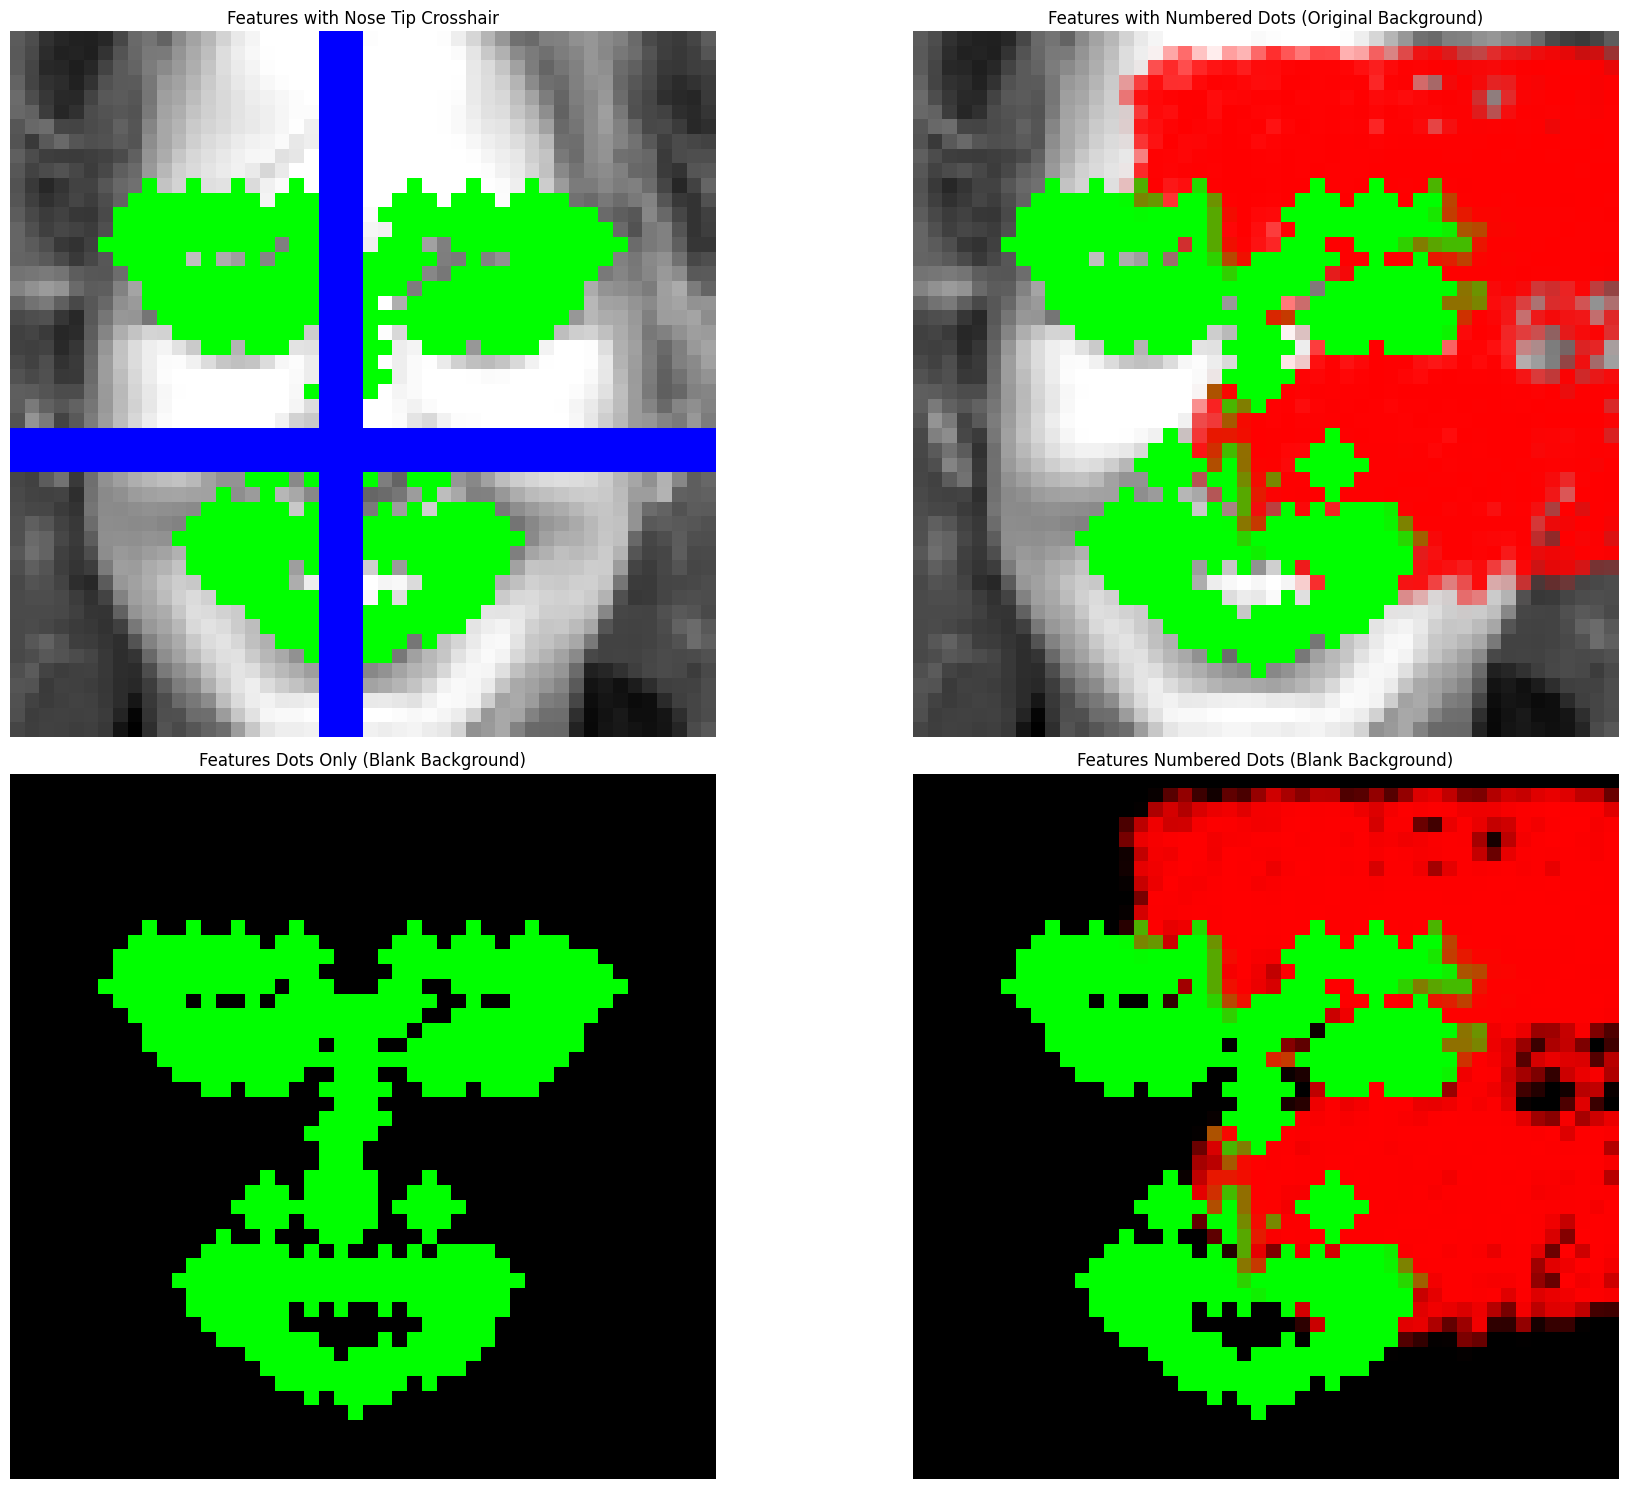

Facial feature coordinates saved to output_data/facial_features.csv

First 5 rows of the DataFrame:
   feature_id   x   y feature_type     quadrant
0           1  22  28         nose     Top-Left
1           2  22  30         nose  Bottom-Left
2           4  22  27         nose     Top-Left
3           5  22  24         nose     Top-Left
4           6  23  19         nose    Top-Right


In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# --- Project Setup and Folder Structure ---
# Define file paths
PHOTO_PATH = 'archive_3/happy/S052_004_00000032.png' # !!! IMPORTANT: Replace with your actual image file name
OUTPUT_CSV_PATH = 'output_data/facial_features.csv'
OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH = 'output_images/detected_features_nose_tip_crosshair.png'
OUTPUT_IMAGE_NUMBERED_DOTS_PATH = 'output_images/detected_features_numbered_dots.png'
OUTPUT_IMAGE_BLANK_DOTS_PATH = 'output_images/detected_features_blank_dots.png' # New output path
OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH = 'output_images/detected_features_blank_numbered_dots.png' # New output path


# Create output directories if they don't exist
os.makedirs(os.path.dirname(OUTPUT_CSV_PATH), exist_ok=True)
os.makedirs(os.path.dirname(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH), exist_ok=True)
# The output_images directory is already created by the line above for other paths.

print("Folder structure and paths initialized.")

# --- Step 2: Load the Photo and Initialize Face Mesh ---
image_original = cv2.imread(PHOTO_PATH)

if image_original is None:
    print(f"Error: Could not load image from {PHOTO_PATH}")
else:
    img_h, img_w, _ = image_original.shape # Get dimensions early

    # Make copies of the image for different drawings
    image_for_crosshair = image_original.copy()
    image_for_numbered_dots = image_original.copy()

    # Create blank images for new outputs (all black background)
    # Use np.zeros for black background, matching original image dimensions
    blank_image_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8) # Black background
    blank_image_numbered_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8) # Black background

    image_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

    mp_face_mesh = mp.solutions.face_mesh
    with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5) as face_mesh:

        print("Image loaded and Face Mesh initialized.")

        results = face_mesh.process(image_rgb)

        feature_coords = []
        nose_tip_x, nose_tip_y = -1, -1 # Initialize nose tip coordinates

        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                # img_h, img_w, _ = image_original.shape # Already got dimensions above

                # Define specific landmark indices for eyebrows, eyes, nose, and lips
                # --- Improved Landmark Indices for Cleaner Detection ---
                # --- Improved Landmark Indices for Accurate Facial Feature Detection ---

                # Left and right eyebrows
                eyebrow_indices = [
                    70, 63, 105, 66, 107, 55, 52, 65, 53, 46,  # Left eyebrow
                    336, 296, 334, 293, 300, 285, 282, 295, 283, 276  # Right eyebrow
                ]

                # Full outline of both eyes (outer and inner rims)
                eye_indices = [
                    33, 160, 158, 133, 153, 144, 163, 7, 173, 155, 154, 145,  # Left eye
                    362, 387, 385, 263, 380, 373, 390, 249, 374, 381, 382, 362  # Right eye
                ]

                # Clean anchor-shaped nose: bridge + tip + nostrils (EXCLUDES 323, 43, 273, etc.)
                nose_indices = [
                    168, 6, 197, 195, 5, 4, 1, 19, 94, 2, 98, 327, 168,  94,  2,  98, 327,  2  # Anchor structure (no outer distortion)
                ]

                # Outer and inner lips
                lip_indices = [
                    61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291, 185,  # Outer lips
                    78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308, 324    # Inner lips
                ]


                desired_feature_indices = set(eyebrow_indices + eye_indices + nose_indices + lip_indices)

                # Find the nose tip landmark (landmark 1 is often the nose tip or very close)
                if 1 in desired_feature_indices:
                    nose_tip_landmark = face_landmarks.landmark[1]
                    nose_tip_x = int(nose_tip_landmark.x * img_w)
                    nose_tip_y = int(nose_tip_landmark.y * img_h)

                # Define font properties for drawing numbers
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 0.35
                font_thickness = 1
                text_color = (0, 0, 255) # Red color for numbers
                text_offset_x = 5
                text_offset_y = -3

                for i in desired_feature_indices:
                    if i < len(face_landmarks.landmark):  # Prevents index error
                        landmark = face_landmarks.landmark[i]

                        x = int(landmark.x * img_w)
                        y = int(landmark.y * img_h)

                        feature_info = {'feature_id': i, 'x': x, 'y': y, 'feature_type': ''}

                        if i in eyebrow_indices:
                            feature_info['feature_type'] = 'eyebrow'
                        elif i in eye_indices:
                            feature_info['feature_type'] = 'eye'
                        elif i in nose_indices:
                            feature_info['feature_type'] = 'nose'
                        elif i in lip_indices:
                            feature_info['feature_type'] = 'lip'

                        feature_coords.append(feature_info)

                        # Draw green dot on all relevant image copies
                        cv2.circle(image_for_crosshair, (x, y), 2, (0, 255, 0), -1)
                        cv2.circle(image_for_numbered_dots, (x, y), 2, (0, 255, 0), -1)
                        cv2.circle(blank_image_dots, (x, y), 2, (0, 255, 0), -1) # Draw on blank image for dots
                        cv2.circle(blank_image_numbered_dots, (x, y), 2, (0, 255, 0), -1) # Draw on blank image for numbered dots

                        # Draw the landmark ID number beside the dot on specific images
                        cv2.putText(image_for_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                                    font, font_scale, text_color, font_thickness, cv2.LINE_AA)
                        cv2.putText(blank_image_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                                    font, font_scale, text_color, font_thickness, cv2.LINE_AA) # Draw on blank image for numbered dots
        else:
            print("No face landmarks detected in the image.")

    # --- Step 3: Divide the Photo with Crosshair at Nose Tip ---
    # Determine the crosshair position based on the nose tip
    mid_x = nose_tip_x if nose_tip_x != -1 else img_w // 2
    mid_y = nose_tip_y if nose_tip_y != -1 else img_h // 2

    print(f"Crosshair position set to: ({mid_x}, {mid_y}) (Nose Tip based)")

    # Iterate through detected features and assign to quadrants based on nose tip crosshair
    for feature in feature_coords:
        x = feature['x']
        y = feature['y']

        if x <= mid_x and y <= mid_y:
            feature['quadrant'] = 'Top-Left'
        elif x > mid_x and y <= mid_y:
            feature['quadrant'] = 'Top-Right'
        elif x <= mid_x and y > mid_y:
            feature['quadrant'] = 'Bottom-Left'
        else:
            feature['quadrant'] = 'Bottom-Right'

    print("Features assigned to quadrants based on nose tip crosshair.")

    # Draw quadrant lines on the image_for_crosshair (blue)
    cv2.line(image_for_crosshair, (mid_x, 0), (mid_x, img_h), (255, 0, 0), 2)  # Vertical line
    cv2.line(image_for_crosshair, (0, mid_y), (img_w, mid_y), (255, 0, 0), 2)  # Horizontal line

    # --- Step 4: Save and Display All Detected Features Images ---

    # Save the image with drawn features and nose tip crosshair
    cv2.imwrite(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH, image_for_crosshair)
    print(f"Image with detected features and nose tip crosshair saved to {OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH}")

    # Save the image with numbered dots (original background)
    cv2.imwrite(OUTPUT_IMAGE_NUMBERED_DOTS_PATH, image_for_numbered_dots)
    print(f"Image with numbered features (original background) saved to {OUTPUT_IMAGE_NUMBERED_DOTS_PATH}")

    # Save the blank image with dots
    cv2.imwrite(OUTPUT_IMAGE_BLANK_DOTS_PATH, blank_image_dots)
    print(f"Blank image with dots saved to {OUTPUT_IMAGE_BLANK_DOTS_PATH}")

    # Save the blank image with numbered dots
    cv2.imwrite(OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH, blank_image_numbered_dots)
    print(f"Blank image with numbered dots saved to {OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH}")


    # Display all images (optional, for Jupyter Notebook)
    plt.figure(figsize=(20, 15)) # Adjust figure size to accommodate four plots

    plt.subplot(2, 2, 1) # 2 rows, 2 columns, first plot
    plt.imshow(cv2.cvtColor(image_for_crosshair, cv2.COLOR_BGR2RGB))
    plt.title("Features with Nose Tip Crosshair")
    plt.axis('off')

    plt.subplot(2, 2, 2) # 2 rows, 2 columns, second plot
    plt.imshow(cv2.cvtColor(image_for_numbered_dots, cv2.COLOR_BGR2RGB))
    plt.title("Features with Numbered Dots (Original Background)")
    plt.axis('off')

    plt.subplot(2, 2, 3) # 2 rows, 2 columns, third plot
    plt.imshow(cv2.cvtColor(blank_image_dots, cv2.COLOR_BGR2RGB))
    plt.title("Features Dots Only (Blank Background)")
    plt.axis('off')

    plt.subplot(2, 2, 4) # 2 rows, 2 columns, fourth plot
    plt.imshow(cv2.cvtColor(blank_image_numbered_dots, cv2.COLOR_BGR2RGB))
    plt.title("Features Numbered Dots (Blank Background)")
    plt.axis('off')

    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show()

    # --- Step 5: Save Features to CSV File ---
    df = pd.DataFrame(feature_coords)
    df.to_csv(OUTPUT_CSV_PATH, index=False)

    print(f"Facial feature coordinates saved to {OUTPUT_CSV_PATH}")
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())

Folder structure and paths initialized.
Image loaded and Face Mesh initialized.
Crosshair position set to: (91, 115) (Nose Tip based)
Features assigned to quadrants based on nose tip crosshair.
Image with detected features and nose tip crosshair saved to output_images/detected_features_nose_tip_crosshair.png
Image with numbered features (original background) saved to output_images/detected_features_numbered_dots.png
Blank image with dots saved to output_images/detected_features_blank_dots.png
Blank image with numbered dots saved to output_images/detected_features_blank_numbered_dots.png


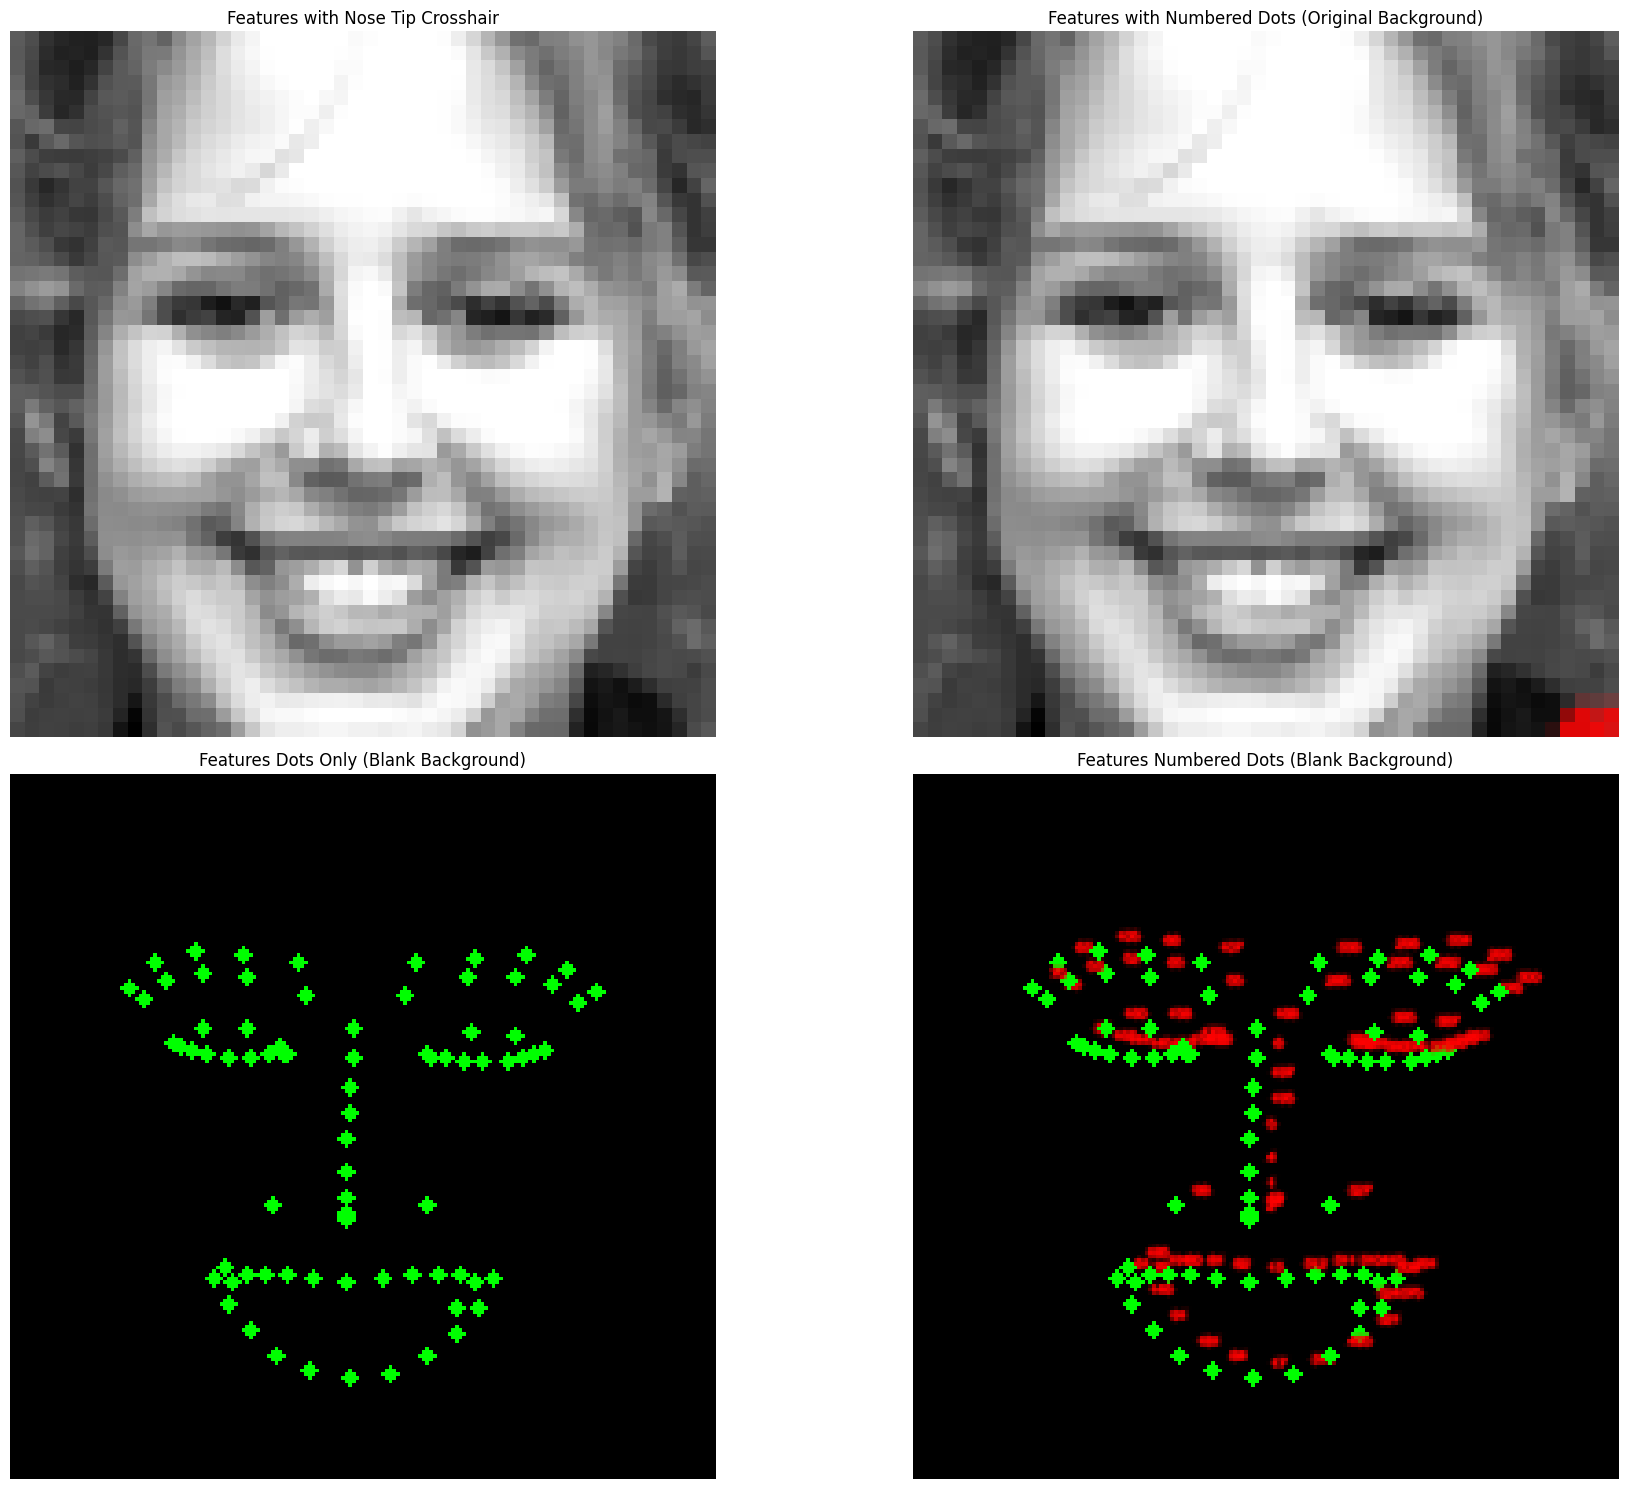

Facial feature coordinates saved to output_data/facial_features.csv

First 5 rows of the DataFrame:
   feature_id   x    y feature_type     quadrant
0           1  91  115         nose     Top-Left
1           2  91  121         nose  Bottom-Left
2           4  91  108         nose     Top-Left
3           5  91   99         nose     Top-Left
4           6  93   77         nose    Top-Right


In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# --- Project Setup and Folder Structure ---
# Define file paths
PHOTO_PATH = 'archive_3/happy/S052_004_00000032.png' # !!! IMPORTANT: Replace with your actual image file name
OUTPUT_CSV_PATH = 'output_data/facial_features.csv'
OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH = 'output_images/detected_features_nose_tip_crosshair.png'
OUTPUT_IMAGE_NUMBERED_DOTS_PATH = 'output_images/detected_features_numbered_dots.png'
OUTPUT_IMAGE_BLANK_DOTS_PATH = 'output_images/detected_features_blank_dots.png' # New output path
OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH = 'output_images/detected_features_blank_numbered_dots.png' # New output path


# Create output directories if they don't exist
os.makedirs(os.path.dirname(OUTPUT_CSV_PATH), exist_ok=True)
os.makedirs(os.path.dirname(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH), exist_ok=True)
# The output_images directory is already created by the line above for other paths.

print("Folder structure and paths initialized.")

# --- Step 2: Load the Photo and Initialize Face Mesh ---
image_original = cv2.imread(PHOTO_PATH)

if image_original is None:
    print(f"Error: Could not load image from {PHOTO_PATH}")
else:
    
    # Resize image for better facial feature detection
    scale_factor = 4  # 48x48 -> 192x192
    image_resized = cv2.resize(image_original, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
    img_h, img_w, _ = image_resized.shape
    

    # Make copies of the image for different drawings
    image_for_crosshair = image_original.copy()
    image_for_numbered_dots = image_original.copy()

    # Create blank images for new outputs (all black background)
    # Use np.zeros for black background, matching original image dimensions
    blank_image_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8) # Black background
    blank_image_numbered_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8) # Black background

    image_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

    mp_face_mesh = mp.solutions.face_mesh
    with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5) as face_mesh:

        print("Image loaded and Face Mesh initialized.")

        results = face_mesh.process(image_rgb)

        feature_coords = []
        nose_tip_x, nose_tip_y = -1, -1 # Initialize nose tip coordinates

        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                # img_h, img_w, _ = image_original.shape # Already got dimensions above

                # Define specific landmark indices for eyebrows, eyes, nose, and lips
                # --- Improved Landmark Indices for Cleaner Detection ---
                # --- Improved Landmark Indices for Accurate Facial Feature Detection ---

                # Left and right eyebrows
                eyebrow_indices = [
                    70, 63, 105, 66, 107, 55, 52, 65, 53, 46,  # Left eyebrow
                    336, 296, 334, 293, 300, 285, 282, 295, 283, 276  # Right eyebrow
                ]

                # Full outline of both eyes (outer and inner rims)
                eye_indices = [
                    33, 160, 158, 133, 153, 144, 163, 7, 173, 155, 154, 145,  # Left eye
                    362, 387, 385, 263, 380, 373, 390, 249, 374, 381, 382, 362  # Right eye
                ]

                # Clean anchor-shaped nose: bridge + tip + nostrils (EXCLUDES 323, 43, 273, etc.)
                nose_indices = [
                    168, 6, 197, 195, 5, 4, 1, 19, 94, 2, 98, 327, 168,  94,  2,  98, 327,  2  # Anchor structure (no outer distortion)
                ]

                # Outer and inner lips
                lip_indices = [
                    61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291, 185,  # Outer lips
                    78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308, 324    # Inner lips
                ]


                desired_feature_indices = set(eyebrow_indices + eye_indices + nose_indices + lip_indices)

                # Find the nose tip landmark (landmark 1 is often the nose tip or very close)
                if 1 in desired_feature_indices:
                    nose_tip_landmark = face_landmarks.landmark[1]
                    nose_tip_x = int(nose_tip_landmark.x * img_w)
                    nose_tip_y = int(nose_tip_landmark.y * img_h)

                # Define font properties for drawing numbers
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 0.35
                font_thickness = 1
                text_color = (0, 0, 255) # Red color for numbers
                text_offset_x = 5
                text_offset_y = -3

                for i in desired_feature_indices:
                    if i < len(face_landmarks.landmark):  # Prevents index error
                        landmark = face_landmarks.landmark[i]

                        x = int(landmark.x * img_w)
                        y = int(landmark.y * img_h)

                        feature_info = {'feature_id': i, 'x': x, 'y': y, 'feature_type': ''}

                        if i in eyebrow_indices:
                            feature_info['feature_type'] = 'eyebrow'
                        elif i in eye_indices:
                            feature_info['feature_type'] = 'eye'
                        elif i in nose_indices:
                            feature_info['feature_type'] = 'nose'
                        elif i in lip_indices:
                            feature_info['feature_type'] = 'lip'

                        feature_coords.append(feature_info)

                        # Draw green dot on all relevant image copies
                        cv2.circle(image_for_crosshair, (x, y), 2, (0, 255, 0), -1)
                        cv2.circle(image_for_numbered_dots, (x, y), 2, (0, 255, 0), -1)
                        cv2.circle(blank_image_dots, (x, y), 2, (0, 255, 0), -1) # Draw on blank image for dots
                        cv2.circle(blank_image_numbered_dots, (x, y), 2, (0, 255, 0), -1) # Draw on blank image for numbered dots

                        # Draw the landmark ID number beside the dot on specific images
                        cv2.putText(image_for_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                                    font, font_scale, text_color, font_thickness, cv2.LINE_AA)
                        cv2.putText(blank_image_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                                    font, font_scale, text_color, font_thickness, cv2.LINE_AA) # Draw on blank image for numbered dots
        else:
            print("No face landmarks detected in the image.")

    # --- Step 3: Divide the Photo with Crosshair at Nose Tip ---
    # Determine the crosshair position based on the nose tip
    mid_x = nose_tip_x if nose_tip_x != -1 else img_w // 2
    mid_y = nose_tip_y if nose_tip_y != -1 else img_h // 2

    print(f"Crosshair position set to: ({mid_x}, {mid_y}) (Nose Tip based)")

    # Iterate through detected features and assign to quadrants based on nose tip crosshair
    for feature in feature_coords:
        x = feature['x']
        y = feature['y']

        if x <= mid_x and y <= mid_y:
            feature['quadrant'] = 'Top-Left'
        elif x > mid_x and y <= mid_y:
            feature['quadrant'] = 'Top-Right'
        elif x <= mid_x and y > mid_y:
            feature['quadrant'] = 'Bottom-Left'
        else:
            feature['quadrant'] = 'Bottom-Right'

    print("Features assigned to quadrants based on nose tip crosshair.")

    # Draw quadrant lines on the image_for_crosshair (blue)
    cv2.line(image_for_crosshair, (mid_x, 0), (mid_x, img_h), (255, 0, 0), 2)  # Vertical line
    cv2.line(image_for_crosshair, (0, mid_y), (img_w, mid_y), (255, 0, 0), 2)  # Horizontal line

    # --- Step 4: Save and Display All Detected Features Images ---

    # Save the image with drawn features and nose tip crosshair
    cv2.imwrite(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH, image_for_crosshair)
    print(f"Image with detected features and nose tip crosshair saved to {OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH}")

    # Save the image with numbered dots (original background)
    cv2.imwrite(OUTPUT_IMAGE_NUMBERED_DOTS_PATH, image_for_numbered_dots)
    print(f"Image with numbered features (original background) saved to {OUTPUT_IMAGE_NUMBERED_DOTS_PATH}")

    # Save the blank image with dots
    cv2.imwrite(OUTPUT_IMAGE_BLANK_DOTS_PATH, blank_image_dots)
    print(f"Blank image with dots saved to {OUTPUT_IMAGE_BLANK_DOTS_PATH}")

    # Save the blank image with numbered dots
    cv2.imwrite(OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH, blank_image_numbered_dots)
    print(f"Blank image with numbered dots saved to {OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH}")


    # Display all images (optional, for Jupyter Notebook)
    plt.figure(figsize=(20, 15)) # Adjust figure size to accommodate four plots

    plt.subplot(2, 2, 1) # 2 rows, 2 columns, first plot
    plt.imshow(cv2.cvtColor(image_for_crosshair, cv2.COLOR_BGR2RGB))
    plt.title("Features with Nose Tip Crosshair")
    plt.axis('off')

    plt.subplot(2, 2, 2) # 2 rows, 2 columns, second plot
    plt.imshow(cv2.cvtColor(image_for_numbered_dots, cv2.COLOR_BGR2RGB))
    plt.title("Features with Numbered Dots (Original Background)")
    plt.axis('off')

    plt.subplot(2, 2, 3) # 2 rows, 2 columns, third plot
    plt.imshow(cv2.cvtColor(blank_image_dots, cv2.COLOR_BGR2RGB))
    plt.title("Features Dots Only (Blank Background)")
    plt.axis('off')

    plt.subplot(2, 2, 4) # 2 rows, 2 columns, fourth plot
    plt.imshow(cv2.cvtColor(blank_image_numbered_dots, cv2.COLOR_BGR2RGB))
    plt.title("Features Numbered Dots (Blank Background)")
    plt.axis('off')

    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show()

    # --- Step 5: Save Features to CSV File ---
    df = pd.DataFrame(feature_coords)
    df.to_csv(OUTPUT_CSV_PATH, index=False)

    print(f"Facial feature coordinates saved to {OUTPUT_CSV_PATH}")
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())

In [1]:
import dlib
print(dlib.__version__)

19.22.99


Folder structure and paths initialized.
Image loaded and Dlib face detector and predictor initialized.
Crosshair position set to: (286, 380) (Nose Tip based)


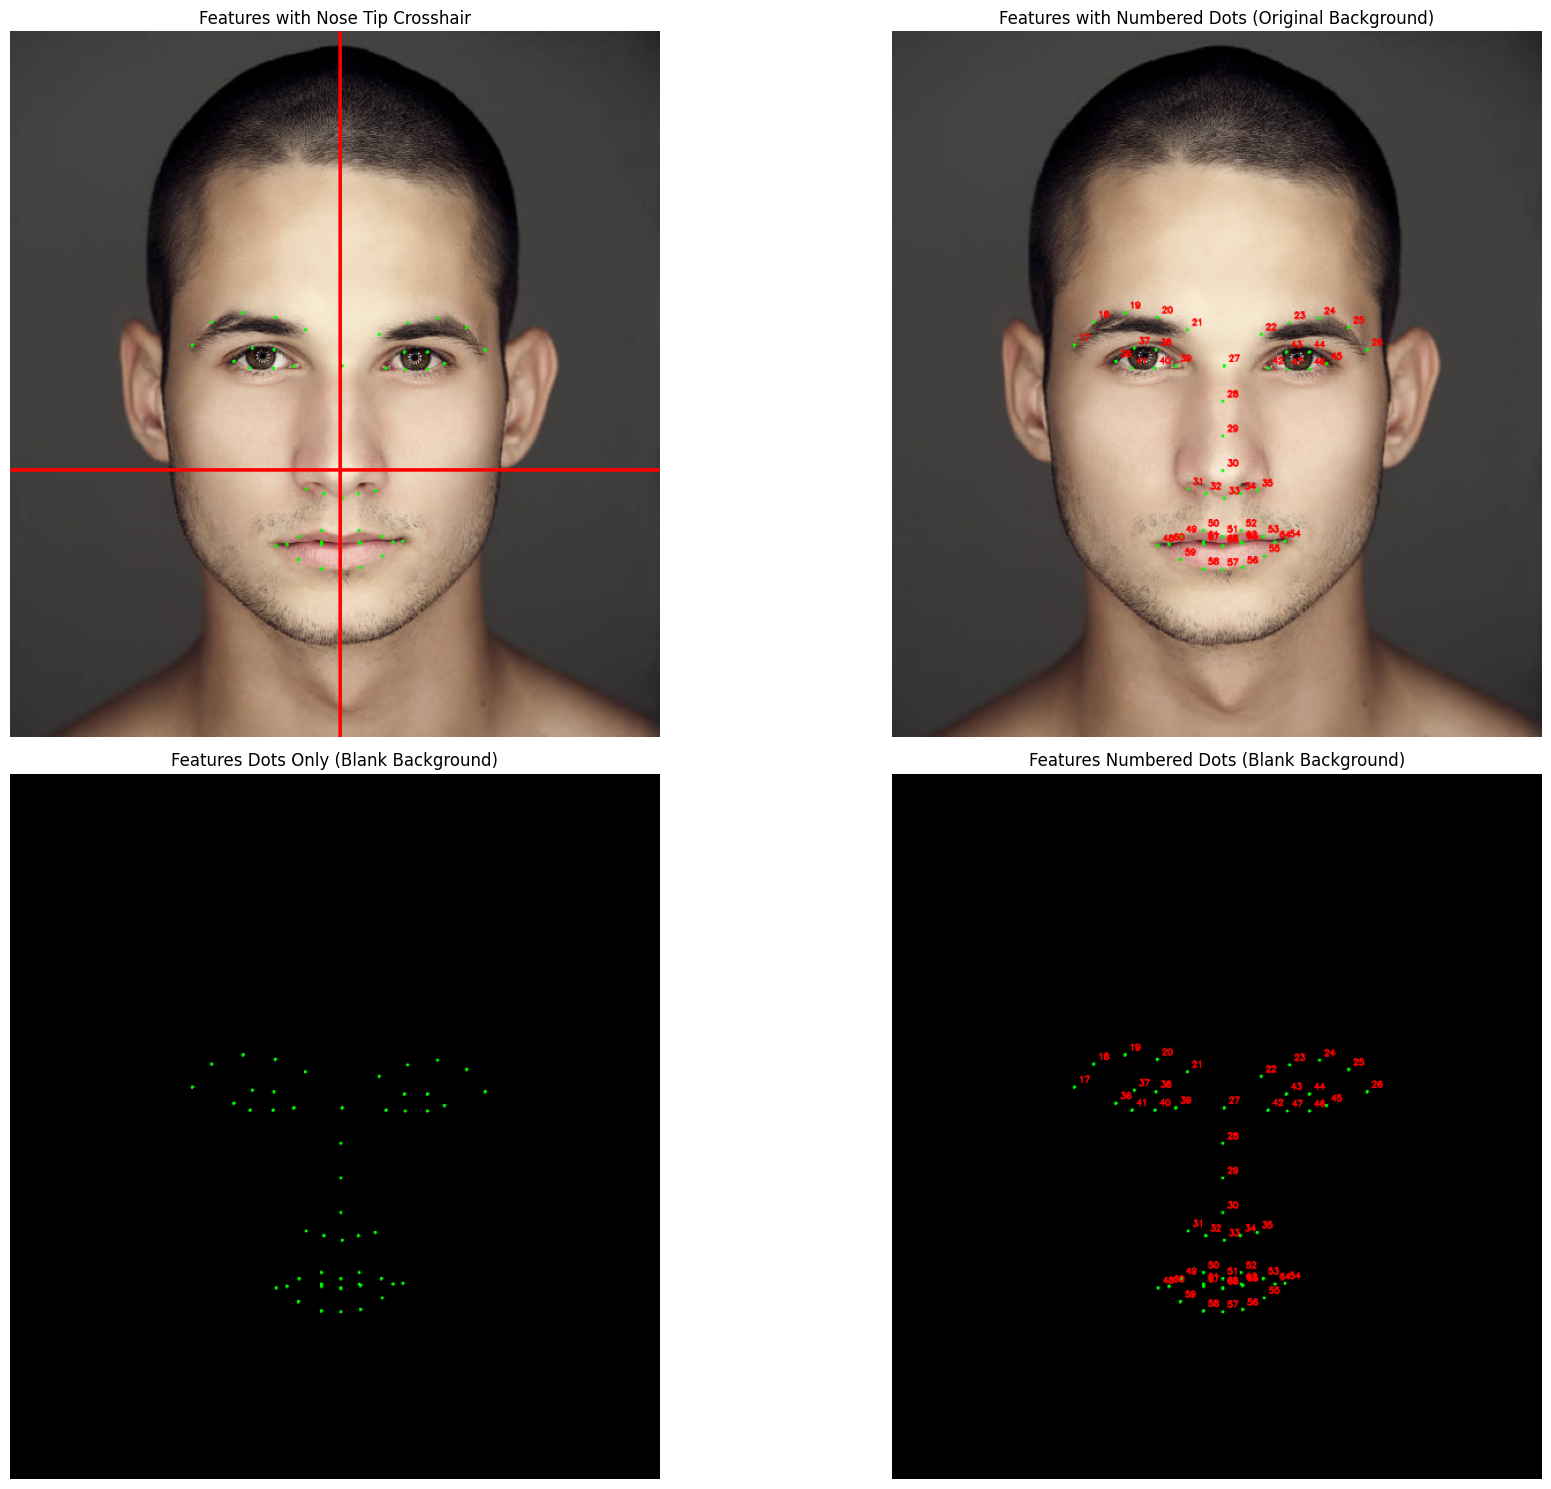

Feature extraction completed and files saved.


In [6]:
import cv2
import dlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# --- Project Setup and Folder Structure ---
PHOTO_PATH = 'input_photos/trial_photo.jpg'
OUTPUT_CSV_PATH = 'output_data/facial_features.csv'
OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH = 'output_images/detected_features_nose_tip_crosshair.png'
OUTPUT_IMAGE_NUMBERED_DOTS_PATH = 'output_images/detected_features_numbered_dots.png'
OUTPUT_IMAGE_BLANK_DOTS_PATH = 'output_images/detected_features_blank_dots.png'
OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH = 'output_images/detected_features_blank_numbered_dots.png'

# Path to the pre-trained Dlib facial landmark model
DLIB_LANDMARK_MODEL_PATH = 'models/shape_predictor_68_face_landmarks.dat/shape_predictor_68_face_landmarks.dat' # Make sure to download this file!

# Create output directories if they don't exist
os.makedirs(os.path.dirname(OUTPUT_CSV_PATH), exist_ok=True)
os.makedirs(os.path.dirname(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH), exist_ok=True)

print("Folder structure and paths initialized.")

# --- Step 2: Load the Photo and Initialize Dlib Face Detector and Predictor ---
image_original = cv2.imread(PHOTO_PATH)

if image_original is None:
    print(f"Error: Could not load image from {PHOTO_PATH}")
    exit()

img_h, img_w, _ = image_original.shape

# Make copies of the image for different drawings
image_for_crosshair = image_original.copy()
image_for_numbered_dots = image_original.copy()
blank_image_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8)
blank_image_numbered_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8)

# Initialize Dlib's face detector (HOG-based) and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(DLIB_LANDMARK_MODEL_PATH)

print("Image loaded and Dlib face detector and predictor initialized.")

# Convert the OpenCV image (BGR) to grayscale for Dlib's detector
# Dlib works well with grayscale images for detection and prediction
gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = detector(gray)

feature_coords = []
nose_tip_x, nose_tip_y = -1, -1

if len(faces) > 0:
    for face in faces:
        # Predict facial landmarks for the detected face
        landmarks = predictor(gray, face)

        # Dlib's 68 landmarks are different from MediaPipe's 468.
        # We'll map the desired features to Dlib's indices.
        # Dlib Landmark Indices (Commonly used 68 points):
        # Jawline: 0-16
        # Right Eyebrow: 17-21
        # Left Eyebrow: 22-26
        # Nose: 27-35
        # Right Eye: 36-41
        # Left Eye: 42-47
        # Outer Lip: 48-59
        # Inner Lip: 60-67

        # Redefine desired feature indices based on Dlib's 68-point model
        # For simplicity, using a subset of Dlib's common landmark groups.
        eyebrow_indices = list(range(17, 27)) # Both eyebrows
        eye_indices = list(range(36, 48))     # Both eyes
        nose_indices = list(range(27, 36))    # Nose bridge and tip
        lip_indices = list(range(48, 68))     # Outer and inner lips

        # Combined desired indices
        desired_feature_indices = set(eyebrow_indices + eye_indices + nose_indices + lip_indices)

        # ---- SCALE UP for better spacing (same as your original logic) ----
        scale_factor = 2.5
        scaled_h = int(img_h * scale_factor)
        scaled_w = int(img_w * scale_factor)

        image_for_crosshair = cv2.resize(image_for_crosshair, (scaled_w, scaled_h))
        image_for_numbered_dots = cv2.resize(image_for_numbered_dots, (scaled_w, scaled_h))
        blank_image_dots = cv2.resize(blank_image_dots, (scaled_w, scaled_h))
        blank_image_numbered_dots = cv2.resize(blank_image_numbered_dots, (scaled_w, scaled_h))

        # Dlib's nose tip is typically landmark 30
        if 30 in desired_feature_indices:
            nose_tip_landmark = landmarks.part(30)
            nose_tip_x = int(nose_tip_landmark.x * scale_factor)
            nose_tip_y = int(nose_tip_landmark.y * scale_factor)

        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.6
        font_thickness = 2
        text_color = (0, 0, 255)
        text_offset_x = 10
        text_offset_y = -10

        for i in desired_feature_indices:
            landmark = landmarks.part(i)
            x = int(landmark.x * scale_factor)
            y = int(landmark.y * scale_factor)

            feature_info = {
                'feature_id': i,
                'x': int(landmark.x), # Store original unscaled coordinates for CSV
                'y': int(landmark.y), # Store original unscaled coordinates for CSV
                'feature_type': ''
            }

            if i in eyebrow_indices:
                feature_info['feature_type'] = 'eyebrow'
            elif i in eye_indices:
                feature_info['feature_type'] = 'eye'
            elif i in nose_indices:
                feature_info['feature_type'] = 'nose'
            elif i in lip_indices:
                feature_info['feature_type'] = 'lip'

            feature_coords.append(feature_info)

            cv2.circle(image_for_crosshair, (x, y), 4, (0, 255, 0), -1)
            cv2.circle(image_for_numbered_dots, (x, y), 4, (0, 255, 0), -1)
            cv2.circle(blank_image_dots, (x, y), 4, (0, 255, 0), -1)
            cv2.circle(blank_image_numbered_dots, (x, y), 4, (0, 255, 0), -1)

            cv2.putText(image_for_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                        font, font_scale, text_color, font_thickness, cv2.LINE_AA)
            cv2.putText(blank_image_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                        font, font_scale, text_color, font_thickness, cv2.LINE_AA)
    # Resize back to original dimensions AFTER processing all faces and drawing
    image_for_crosshair = cv2.resize(image_for_crosshair, (img_w, img_h))
    image_for_numbered_dots = cv2.resize(image_for_numbered_dots, (img_w, img_h))
    blank_image_dots = cv2.resize(blank_image_dots, (img_w, img_h))
    blank_image_numbered_dots = cv2.resize(blank_image_numbered_dots, (img_w, img_h))
else:
    print("No face detected in the image.")
    exit()

# --- Step 3: Divide the Photo with Crosshair at Nose Tip ---

# Determine the crosshair position based on the nose tip
if nose_tip_x != -1 and nose_tip_y != -1:
    # Scale nose tip back to original image size
    mid_x = int(nose_tip_x / scale_factor)
    mid_y = int(nose_tip_y / scale_factor)
else:
    mid_x = img_w // 2
    mid_y = img_h // 2

print(f"Crosshair position set to: ({mid_x}, {mid_y}) (Nose Tip based)")

# Draw vertical and horizontal crosshair lines on the image
cv2.line(image_for_crosshair, (mid_x, 0), (mid_x, img_h), (0, 0, 255), 2)  # Vertical axis
cv2.line(image_for_crosshair, (0, mid_y), (img_w, mid_y), (0, 0, 255), 2)  # Horizontal axis

# Iterate through detected features and assign to quadrants based on nose tip crosshair
for feature in feature_coords:
    x = feature['x'] # Use the unscaled coordinates for quadrant assignment
    y = feature['y']

    if x <= mid_x and y <= mid_y:
        quadrant = 'Top-Left'
    elif x > mid_x and y <= mid_y:
        quadrant = 'Top-Right'
    elif x <= mid_x and y > mid_y:
        quadrant = 'Bottom-Left'
    else:
        quadrant = 'Bottom-Right'

    feature['quadrant'] = quadrant

# --- Step 4: Save Outputs ---
cv2.imwrite(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH, image_for_crosshair)
cv2.imwrite(OUTPUT_IMAGE_NUMBERED_DOTS_PATH, image_for_numbered_dots)
cv2.imwrite(OUTPUT_IMAGE_BLANK_DOTS_PATH, blank_image_dots)
cv2.imwrite(OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH, blank_image_numbered_dots)


# Display all images (optional, for Jupyter Notebook or interactive display)
plt.figure(figsize=(20, 15)) # Adjust figure size to accommodate four plots

plt.subplot(2, 2, 1) # 2 rows, 2 columns, first plot
plt.imshow(cv2.cvtColor(image_for_crosshair, cv2.COLOR_BGR2RGB))
plt.title("Features with Nose Tip Crosshair")
plt.axis('off')

plt.subplot(2, 2, 2) # 2 rows, 2 columns, second plot
plt.imshow(cv2.cvtColor(image_for_numbered_dots, cv2.COLOR_BGR2RGB))
plt.title("Features with Numbered Dots (Original Background)")
plt.axis('off')

plt.subplot(2, 2, 3) # 2 rows, 2 columns, third plot
plt.imshow(cv2.cvtColor(blank_image_dots, cv2.COLOR_BGR2RGB))
plt.title("Features Dots Only (Blank Background)")
plt.axis('off')

plt.subplot(2, 2, 4) # 2 rows, 2 columns, fourth plot
plt.imshow(cv2.cvtColor(blank_image_numbered_dots, cv2.COLOR_BGR2RGB))
plt.title("Features Numbered Dots (Blank Background)")
plt.axis('off')

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

# --- Step 5: Save Feature Coordinates to CSV ---
df = pd.DataFrame(feature_coords)
df.to_csv(OUTPUT_CSV_PATH, index=False)

print("Feature extraction completed and files saved.")

Folder structure and paths initialized.
Image loaded and Dlib face detector and predictor initialized.
No face detected in the image.
Crosshair position set to: (24, 24) (Nose Tip based)


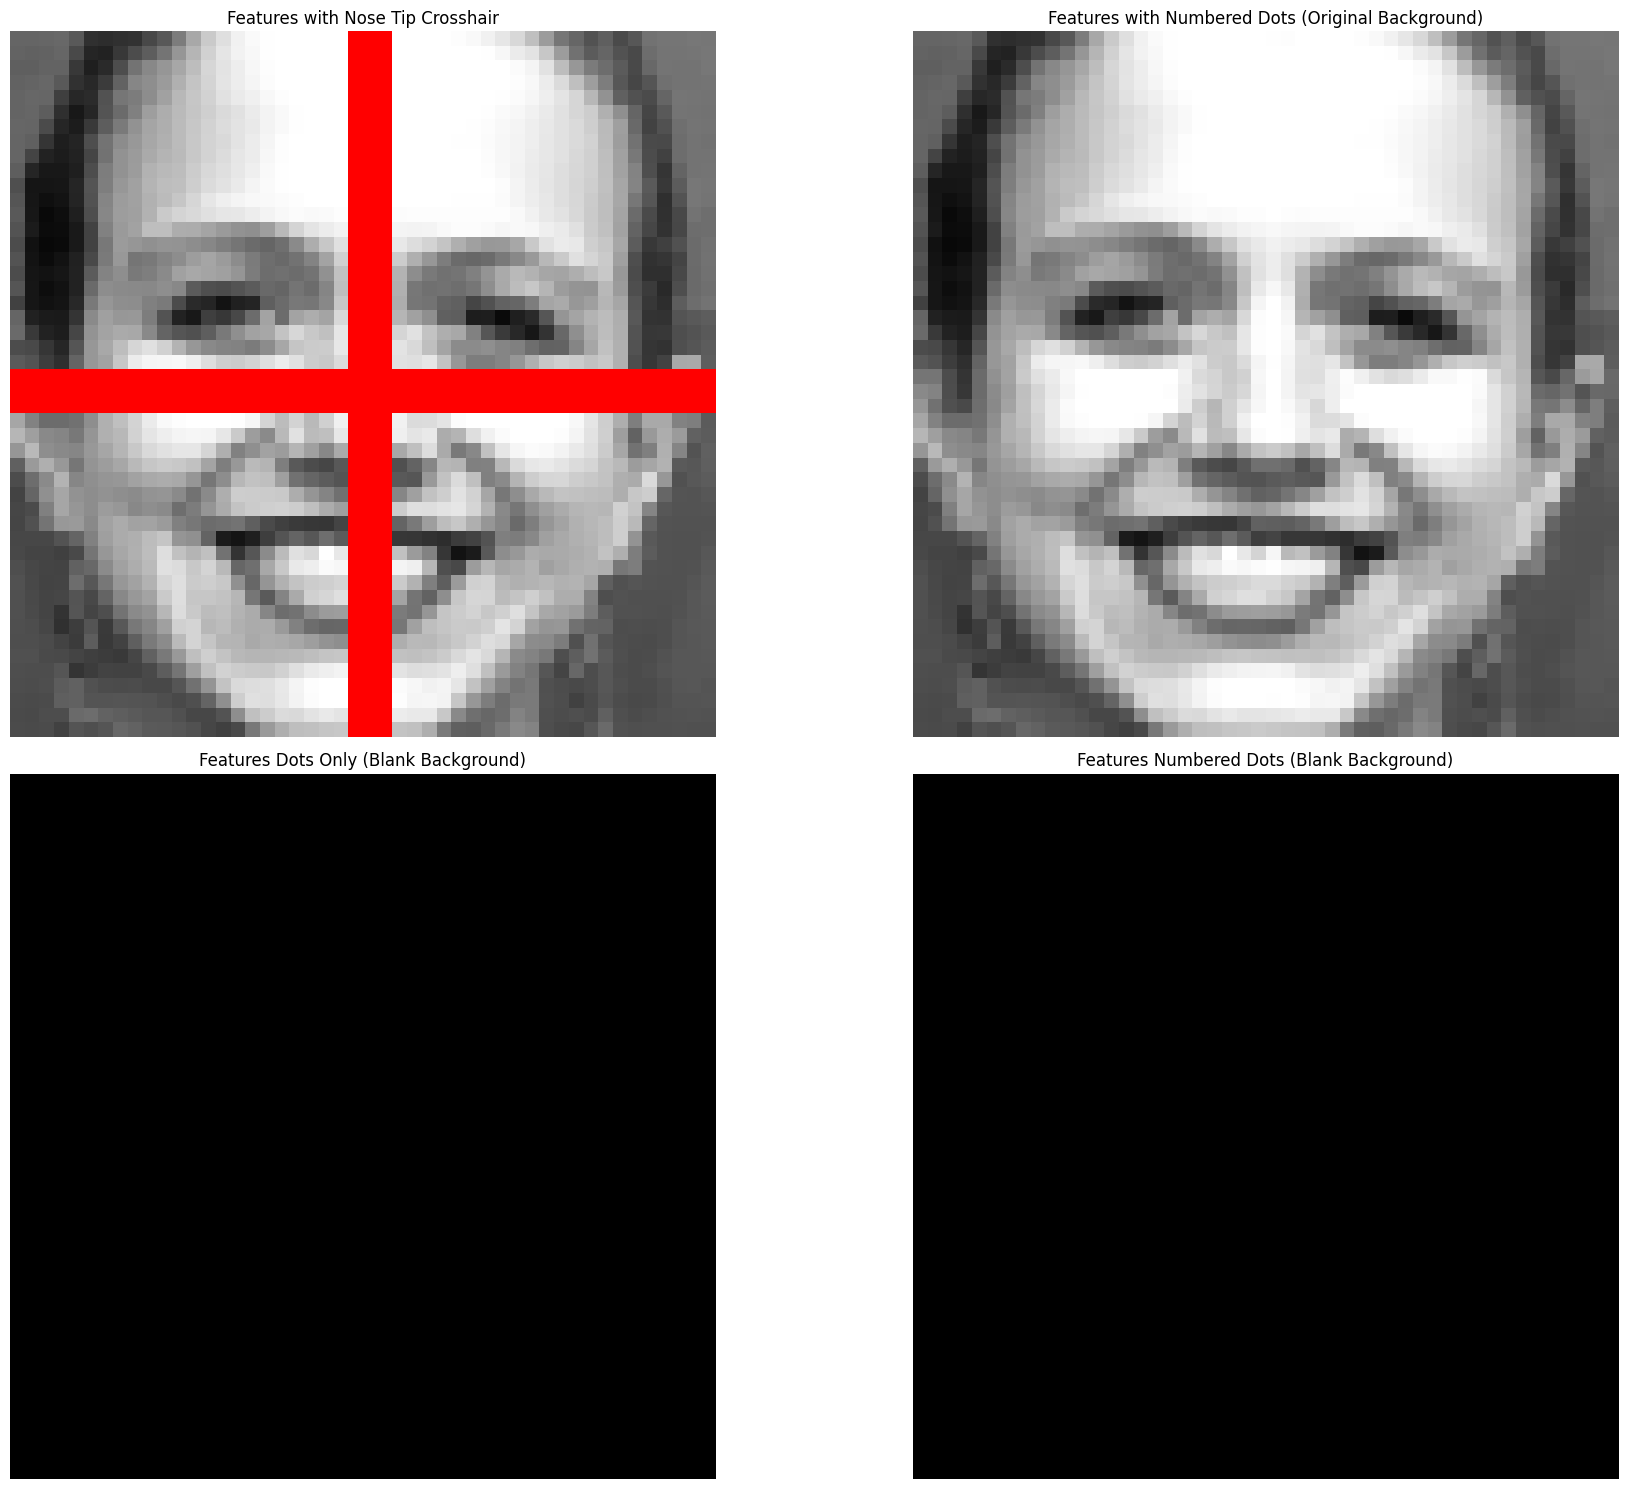

Feature extraction completed and files saved.


: 

In [ ]:
import cv2
import dlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# --- Project Setup and Folder Structure ---
# PHOTO_PATH = 'input_photos/trial2.jpg'
PHOTO_PATH = 'archive_3/happy/S055_005_00000045.png'
OUTPUT_CSV_PATH = 'output_data/facial_features.csv'
OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH = 'output_images/detected_features_nose_tip_crosshair.png'
OUTPUT_IMAGE_NUMBERED_DOTS_PATH = 'output_images/detected_features_numbered_dots.png'
OUTPUT_IMAGE_BLANK_DOTS_PATH = 'output_images/detected_features_blank_dots.png'
OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH = 'output_images/detected_features_blank_numbered_dots.png'

# Path to the pre-trained Dlib facial landmark model
DLIB_LANDMARK_MODEL_PATH = 'models/shape_predictor_68_face_landmarks.dat/shape_predictor_68_face_landmarks.dat' # Make sure to download this file!

# Create output directories if they don't exist
os.makedirs(os.path.dirname(OUTPUT_CSV_PATH), exist_ok=True)
os.makedirs(os.path.dirname(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH), exist_ok=True)

print("Folder structure and paths initialized.")

# --- Step 2: Load the Photo and Initialize Dlib Face Detector and Predictor ---
image_original = cv2.imread(PHOTO_PATH)

if image_original is None:
    print(f"Error: Could not load image from {PHOTO_PATH}")
    exit()

img_h, img_w, _ = image_original.shape

# Make copies of the image for different drawings
image_for_crosshair = image_original.copy()
image_for_numbered_dots = image_original.copy()
blank_image_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8)
blank_image_numbered_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8)

# Initialize Dlib's face detector (HOG-based) and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(DLIB_LANDMARK_MODEL_PATH)

print("Image loaded and Dlib face detector and predictor initialized.")

# Convert the OpenCV image (BGR) to grayscale for Dlib's detector
# Dlib works well with grayscale images for detection and prediction
gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = detector(gray)

feature_coords = []
nose_tip_x, nose_tip_y = -1, -1

if len(faces) > 0:
    for face in faces:
        # Predict facial landmarks for the detected face
        landmarks = predictor(gray, face)

        # Dlib's 68 landmarks are different from MediaPipe's 468.
        # We'll map the desired features to Dlib's indices.
        # Dlib Landmark Indices (Commonly used 68 points):
        # Jawline: 0-16
        # Right Eyebrow: 17-21
        # Left Eyebrow: 22-26
        # Nose: 27-35
        # Right Eye: 36-41
        # Left Eye: 42-47
        # Outer Lip: 48-59
        # Inner Lip: 60-67

        # Redefine desired feature indices based on Dlib's 68-point model
        # For simplicity, using a subset of Dlib's common landmark groups.
        eyebrow_indices = list(range(17, 27)) # Both eyebrows
        eye_indices = list(range(36, 48))     # Both eyes
        nose_indices = list(range(27, 36))    # Nose bridge and tip
        lip_indices = list(range(48, 68))     # Outer and inner lips

        # Combined desired indices
        desired_feature_indices = set(eyebrow_indices + eye_indices + nose_indices + lip_indices)

        # ---- SCALE UP for better spacing (same as your original logic) ----
        scale_factor = 2.5
        scaled_h = int(img_h * scale_factor)
        scaled_w = int(img_w * scale_factor)

        image_for_crosshair = cv2.resize(image_for_crosshair, (scaled_w, scaled_h))
        image_for_numbered_dots = cv2.resize(image_for_numbered_dots, (scaled_w, scaled_h))
        blank_image_dots = cv2.resize(blank_image_dots, (scaled_w, scaled_h))
        blank_image_numbered_dots = cv2.resize(blank_image_numbered_dots, (scaled_w, scaled_h))

        # Dlib's nose tip is typically landmark 30
        if 30 in desired_feature_indices:
            nose_tip_landmark = landmarks.part(30)
            nose_tip_x = int(nose_tip_landmark.x * scale_factor)
            nose_tip_y = int(nose_tip_landmark.y * scale_factor)

        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.6
        font_thickness = 1
        text_color = (0, 0, 255)
        text_offset_x = 10
        text_offset_y = -10

        for i in desired_feature_indices:
            landmark = landmarks.part(i)
            x = int(landmark.x * scale_factor)
            y = int(landmark.y * scale_factor)

            feature_info = {
                'feature_id': i,
                'x': int(landmark.x), # Store original unscaled coordinates for CSV
                'y': int(landmark.y), # Store original unscaled coordinates for CSV
                'feature_type': ''
            }

            if i in eyebrow_indices:
                feature_info['feature_type'] = 'eyebrow'
            elif i in eye_indices:
                feature_info['feature_type'] = 'eye'
            elif i in nose_indices:
                feature_info['feature_type'] = 'nose'
            elif i in lip_indices:
                feature_info['feature_type'] = 'lip'

            feature_coords.append(feature_info)

            cv2.circle(image_for_crosshair, (x, y), 4, (0, 255, 0), -1)
            cv2.circle(image_for_numbered_dots, (x, y), 4, (0, 255, 0), -1)
            cv2.circle(blank_image_dots, (x, y), 4, (0, 255, 0), -1)
            cv2.circle(blank_image_numbered_dots, (x, y), 4, (0, 255, 0), -1)

            cv2.putText(image_for_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                        font, font_scale, text_color, font_thickness, cv2.LINE_AA)
            cv2.putText(blank_image_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                        font, font_scale, text_color, font_thickness, cv2.LINE_AA)
    # Resize back to original dimensions AFTER processing all faces and drawing
    image_for_crosshair = cv2.resize(image_for_crosshair, (img_w, img_h))
    image_for_numbered_dots = cv2.resize(image_for_numbered_dots, (img_w, img_h))
    blank_image_dots = cv2.resize(blank_image_dots, (img_w, img_h))
    blank_image_numbered_dots = cv2.resize(blank_image_numbered_dots, (img_w, img_h))
else:
    print("No face detected in the image.")
    exit()

# --- Step 3: Divide the Photo with Crosshair at Nose Tip ---

# Determine the crosshair position based on the nose tip
if nose_tip_x != -1 and nose_tip_y != -1:
    # Scale nose tip back to original image size
    mid_x = int(nose_tip_x / scale_factor)
    mid_y = int(nose_tip_y / scale_factor)
else:
    mid_x = img_w // 2
    mid_y = img_h // 2

print(f"Crosshair position set to: ({mid_x}, {mid_y}) (Nose Tip based)")

# Draw vertical and horizontal crosshair lines on the image
cv2.line(image_for_crosshair, (mid_x, 0), (mid_x, img_h), (0, 0, 255), 2)  # Vertical axis
cv2.line(image_for_crosshair, (0, mid_y), (img_w, mid_y), (0, 0, 255), 2)  # Horizontal axis

# Iterate through detected features and assign to quadrants based on nose tip crosshair
for feature in feature_coords:
    x = feature['x'] # Use the unscaled coordinates for quadrant assignment
    y = feature['y']

    if x <= mid_x and y <= mid_y:
        quadrant = 'Top-Left'
    elif x > mid_x and y <= mid_y:
        quadrant = 'Top-Right'
    elif x <= mid_x and y > mid_y:
        quadrant = 'Bottom-Left'
    else:
        quadrant = 'Bottom-Right'

    feature['quadrant'] = quadrant

# --- Step 4: Save Outputs ---
cv2.imwrite(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH, image_for_crosshair)
cv2.imwrite(OUTPUT_IMAGE_NUMBERED_DOTS_PATH, image_for_numbered_dots)
cv2.imwrite(OUTPUT_IMAGE_BLANK_DOTS_PATH, blank_image_dots)
cv2.imwrite(OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH, blank_image_numbered_dots)


# Display all images (optional, for Jupyter Notebook or interactive display)
plt.figure(figsize=(20, 15)) # Adjust figure size to accommodate four plots

plt.subplot(2, 2, 1) # 2 rows, 2 columns, first plot
plt.imshow(cv2.cvtColor(image_for_crosshair, cv2.COLOR_BGR2RGB))
plt.title("Features with Nose Tip Crosshair")
plt.axis('off')

plt.subplot(2, 2, 2) # 2 rows, 2 columns, second plot
plt.imshow(cv2.cvtColor(image_for_numbered_dots, cv2.COLOR_BGR2RGB))
plt.title("Features with Numbered Dots (Original Background)")
plt.axis('off')

plt.subplot(2, 2, 3) # 2 rows, 2 columns, third plot
plt.imshow(cv2.cvtColor(blank_image_dots, cv2.COLOR_BGR2RGB))
plt.title("Features Dots Only (Blank Background)")
plt.axis('off')

plt.subplot(2, 2, 4) # 2 rows, 2 columns, fourth plot
plt.imshow(cv2.cvtColor(blank_image_numbered_dots, cv2.COLOR_BGR2RGB))
plt.title("Features Numbered Dots (Blank Background)")
plt.axis('off')

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

# --- Step 5: Save Feature Coordinates to CSV ---
df = pd.DataFrame(feature_coords)
df.to_csv(OUTPUT_CSV_PATH, index=False)

print("Feature extraction completed and files saved.")

Folder structure and paths initialized.
Input image detected as color (BGR).
Image loaded and Dlib face detector and predictor initialized.
Crosshair position set to: (24, 26) (Nose Tip based)


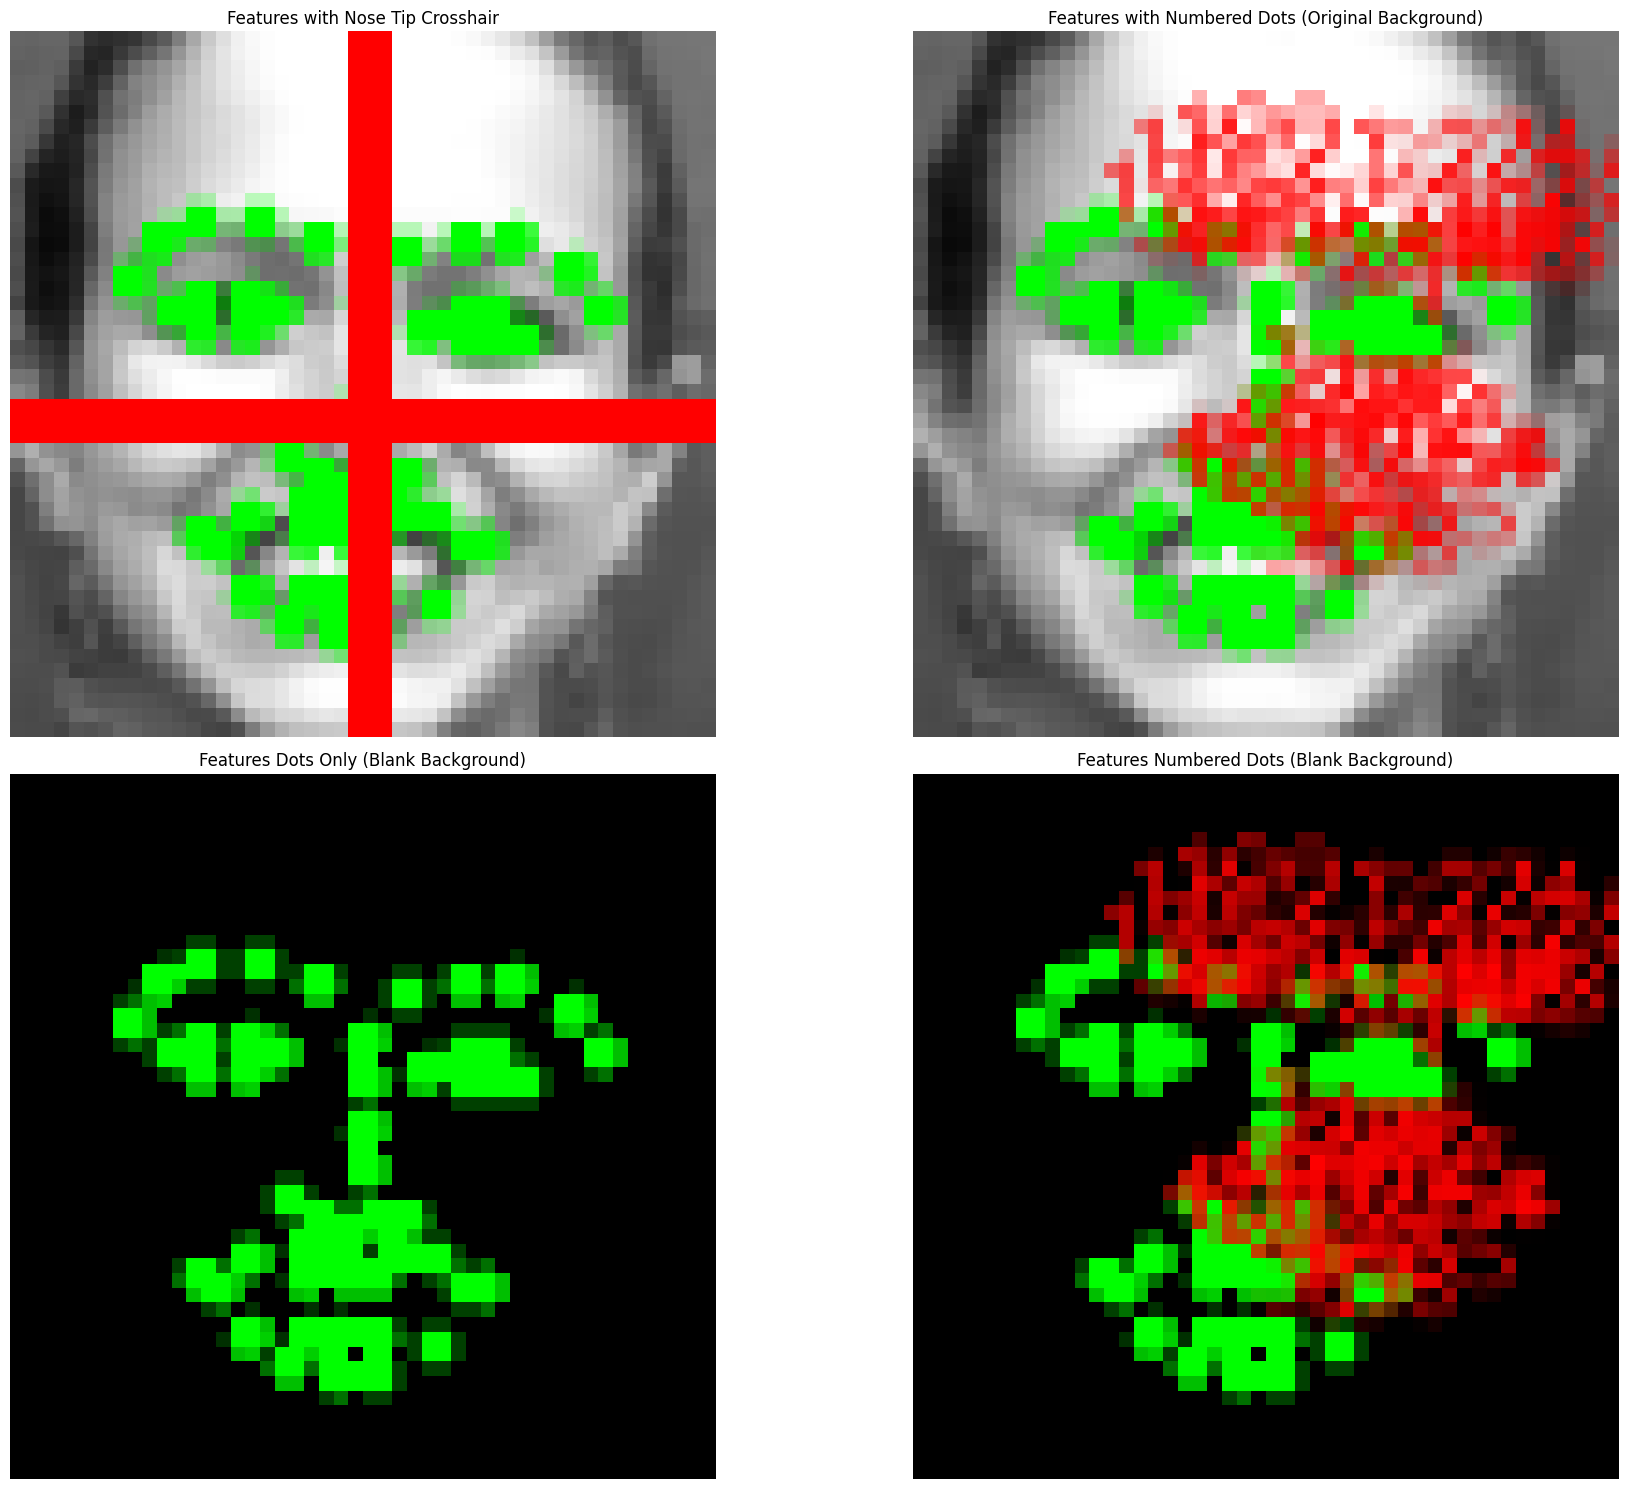

Feature extraction completed and files saved.


In [2]:
import cv2
import dlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# --- Project Setup and Folder Structure ---
PHOTO_PATH = 'archive_3/happy/S055_005_00000045.png'
OUTPUT_CSV_PATH = 'output_data/facial_features.csv'
OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH = 'output_images/detected_features_nose_tip_crosshair.png'
OUTPUT_IMAGE_NUMBERED_DOTS_PATH = 'output_images/detected_features_numbered_dots.png'
OUTPUT_IMAGE_BLANK_DOTS_PATH = 'output_images/detected_features_blank_dots.png'
OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH = 'output_images/detected_features_blank_numbered_dots.png'

# Path to the pre-trained Dlib facial landmark model
DLIB_LANDMARK_MODEL_PATH = 'models/shape_predictor_68_face_landmarks.dat/shape_predictor_68_face_landmarks.dat' # Make sure to download this file!

# Create output directories if they don't exist
os.makedirs(os.path.dirname(OUTPUT_CSV_PATH), exist_ok=True)
os.makedirs(os.path.dirname(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH), exist_ok=True)

print("Folder structure and paths initialized.")

# --- Step 2: Load the Photo and Initialize Dlib Face Detector and Predictor ---
image_original_raw = cv2.imread(PHOTO_PATH) # Load the image as is

if image_original_raw is None:
    print(f"Error: Could not load image from {PHOTO_PATH}")
    exit()

# --- IMPORTANT MODIFICATION FOR GRAYSCALE INPUT ---
# Check if the loaded image is grayscale (2 dimensions or 3rd dim is 1)
if len(image_original_raw.shape) == 2 or image_original_raw.shape[2] == 1:
    print("Input image detected as grayscale. Converting to 3-channel BGR for drawing.")
    # Convert grayscale to 3-channel BGR for consistent drawing operations
    image_original = cv2.cvtColor(image_original_raw, cv2.COLOR_GRAY2BGR)
    # The 'gray' image for Dlib's detector will still be derived from the raw grayscale
    gray = image_original_raw # Use the original 1-channel image for Dlib detector
else:
    print("Input image detected as color (BGR).")
    image_original = image_original_raw
    gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
# --- END IMPORTANT MODIFICATION ---


img_h, img_w, _ = image_original.shape # Now image_original is guaranteed to be 3-channel

# Make copies of the image for different drawings
image_for_crosshair = image_original.copy()
image_for_numbered_dots = image_original.copy()
blank_image_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8) # Ensure blank images are 3-channel
blank_image_numbered_dots = np.zeros((img_h, img_w, 3), dtype=np.uint8)


# Initialize Dlib's face detector (HOG-based) and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(DLIB_LANDMARK_MODEL_PATH)

print("Image loaded and Dlib face detector and predictor initialized.")

# Detect faces in the grayscale image
feature_coords = []
nose_tip_x, nose_tip_y = -1, -1

# Try upsampling 1 or 2 times for small images.
# 1 upsample: 48x48 -> 96x96
# 2 upsamples: 48x48 -> 192x192 (potentially better for very small faces)
upsample_factor = 1 # Start with 1. If detection is still poor or crashes, try 2.
faces = detector(gray, upsample_factor) # 'gray' is always 1-channel for Dlib

if len(faces) > 0:
    for face in faces:
        # Predict facial landmarks for the detected face
        landmarks = predictor(gray, face)

        # Dlib's 68 landmarks are different from MediaPipe's 468.
        # We'll map the desired features to Dlib's indices.
        # Dlib Landmark Indices (Commonly used 68 points):
        # Jawline: 0-16
        # Right Eyebrow: 17-21
        # Left Eyebrow: 22-26
        # Nose: 27-35
        # Right Eye: 36-41
        # Left Eye: 42-47
        # Outer Lip: 48-59
        # Inner Lip: 60-67

        # Redefine desired feature indices based on Dlib's 68-point model
        # For simplicity, using a subset of Dlib's common landmark groups.
        eyebrow_indices = list(range(17, 27)) # Both eyebrows
        eye_indices = list(range(36, 48))     # Both eyes
        nose_indices = list(range(27, 36))    # Nose bridge and tip
        lip_indices = list(range(48, 68))     # Outer and inner lips

        # Combined desired indices
        desired_feature_indices = set(eyebrow_indices + eye_indices + nose_indices + lip_indices)

        # ---- SCALE UP for better spacing (same as your original logic) ----
        scale_factor = 2.5
        scaled_h = int(img_h * scale_factor)
        scaled_w = int(img_w * scale_factor)

        image_for_crosshair = cv2.resize(image_for_crosshair, (scaled_w, scaled_h))
        image_for_numbered_dots = cv2.resize(image_for_numbered_dots, (scaled_w, scaled_h))
        blank_image_dots = cv2.resize(blank_image_dots, (scaled_w, scaled_h))
        blank_image_numbered_dots = cv2.resize(blank_image_numbered_dots, (scaled_w, scaled_h))

        # Dlib's nose tip is typically landmark 30
        if 30 in desired_feature_indices:
            nose_tip_landmark = landmarks.part(30)
            nose_tip_x = int(nose_tip_landmark.x * scale_factor)
            nose_tip_y = int(nose_tip_landmark.y * scale_factor)

        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_thickness = 1
        text_color = (0, 0, 255)
        text_offset_x = 10
        text_offset_y = -10

        for i in desired_feature_indices:
            landmark = landmarks.part(i)
            x = int(landmark.x * scale_factor)
            y = int(landmark.y * scale_factor)

            feature_info = {
                'feature_id': i,
                'x': int(landmark.x), # Store original unscaled coordinates for CSV
                'y': int(landmark.y), # Store original unscaled coordinates for CSV
                'feature_type': ''
            }

            if i in eyebrow_indices:
                feature_info['feature_type'] = 'eyebrow'
            elif i in eye_indices:
                feature_info['feature_type'] = 'eye'
            elif i in nose_indices:
                feature_info['feature_type'] = 'nose'
            elif i in lip_indices:
                feature_info['feature_type'] = 'lip'

            feature_coords.append(feature_info)

            cv2.circle(image_for_crosshair, (x, y), 4, (0, 255, 0), -1)
            cv2.circle(image_for_numbered_dots, (x, y), 4, (0, 255, 0), -1)
            cv2.circle(blank_image_dots, (x, y), 4, (0, 255, 0), -1)
            cv2.circle(blank_image_numbered_dots, (x, y), 4, (0, 255, 0), -1)

            cv2.putText(image_for_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                        font, font_scale, text_color, font_thickness, cv2.LINE_AA)
            cv2.putText(blank_image_numbered_dots, str(i), (x + text_offset_x, y + text_offset_y),
                        font, font_scale, text_color, font_thickness, cv2.LINE_AA)
    # Resize back to original dimensions AFTER processing all faces and drawing
    image_for_crosshair = cv2.resize(image_for_crosshair, (img_w, img_h))
    image_for_numbered_dots = cv2.resize(image_for_numbered_dots, (img_w, img_h))
    blank_image_dots = cv2.resize(blank_image_dots, (img_w, img_h))
    blank_image_numbered_dots = cv2.resize(blank_image_numbered_dots, (img_w, img_h))
else:
    print("No face detected in the image.")
    exit()

# --- Step 3: Divide the Photo with Crosshair at Nose Tip ---

# Determine the crosshair position based on the nose tip
if nose_tip_x != -1 and nose_tip_y != -1:
    # Scale nose tip back to original image size
    mid_x = int(nose_tip_x / scale_factor)
    mid_y = int(nose_tip_y / scale_factor)
else:
    mid_x = img_w // 2
    mid_y = img_h // 2

print(f"Crosshair position set to: ({mid_x}, {mid_y}) (Nose Tip based)")

# Draw vertical and horizontal crosshair lines on the image
cv2.line(image_for_crosshair, (mid_x, 0), (mid_x, img_h), (0, 0, 255), 2)  # Vertical axis
cv2.line(image_for_crosshair, (0, mid_y), (img_w, mid_y), (0, 0, 255), 2)  # Horizontal axis

# Iterate through detected features and assign to quadrants based on nose tip crosshair
for feature in feature_coords:
    x = feature['x'] # Use the unscaled coordinates for quadrant assignment
    y = feature['y']

    if x <= mid_x and y <= mid_y:
        quadrant = 'Top-Left'
    elif x > mid_x and y <= mid_y:
        quadrant = 'Top-Right'
    elif x <= mid_x and y > mid_y:
        quadrant = 'Bottom-Left'
    else:
        quadrant = 'Bottom-Right'

    feature['quadrant'] = quadrant

# --- Step 4: Save Outputs ---
cv2.imwrite(OUTPUT_IMAGE_NOSE_TIP_CROSSHAIR_PATH, image_for_crosshair)
cv2.imwrite(OUTPUT_IMAGE_NUMBERED_DOTS_PATH, image_for_numbered_dots)
cv2.imwrite(OUTPUT_IMAGE_BLANK_DOTS_PATH, blank_image_dots)
cv2.imwrite(OUTPUT_IMAGE_BLANK_NUMBERED_DOTS_PATH, blank_image_numbered_dots)


# Display all images (optional, for Jupyter Notebook or interactive display)
plt.figure(figsize=(20, 15)) # Adjust figure size to accommodate four plots

plt.subplot(2, 2, 1) # 2 rows, 2 columns, first plot
plt.imshow(cv2.cvtColor(image_for_crosshair, cv2.COLOR_BGR2RGB))
plt.title("Features with Nose Tip Crosshair")
plt.axis('off')

plt.subplot(2, 2, 2) # 2 rows, 2 columns, second plot
plt.imshow(cv2.cvtColor(image_for_numbered_dots, cv2.COLOR_BGR2RGB))
plt.title("Features with Numbered Dots (Original Background)")
plt.axis('off')

plt.subplot(2, 2, 3) # 2 rows, 2 columns, third plot
plt.imshow(cv2.cvtColor(blank_image_dots, cv2.COLOR_BGR2RGB))
plt.title("Features Dots Only (Blank Background)")
plt.axis('off')

plt.subplot(2, 2, 4) # 2 rows, 2 columns, fourth plot
plt.imshow(cv2.cvtColor(blank_image_numbered_dots, cv2.COLOR_BGR2RGB))
plt.title("Features Numbered Dots (Blank Background)")
plt.axis('off')

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

# --- Step 5: Save Feature Coordinates to CSV ---
df = pd.DataFrame(feature_coords)
df.to_csv(OUTPUT_CSV_PATH, index=False)

print("Feature extraction completed and files saved.")

**          VALENCE AND AROUSAL CALCULATION             **

In [ ]:
import cv2
import dlib
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# --- Dlib model setup ---
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("models/shape_predictor_68_face_landmarks.dat/shape_predictor_68_face_landmarks.dat")

# --- Project Paths ---
root_input_dir = "archive_3"
root_output_dir = "processed_faces_newFinal4"
scale_factor = 12
emotion_folders = ["anger", "contempt", "disgust", "happy", "sadness", "fear", "surprise"]

os.makedirs(root_output_dir, exist_ok=True)

# --- Landmark groups for each region ---
REGIONS = {
    'left_eyebrow': list(range(17, 22)),
    'right_eyebrow': list(range(22, 27)),
    'left_eye': list(range(36, 42)),
    'right_eye': list(range(42, 48)),
    'nose': list(range(27, 36)),
    'lips': list(range(48, 68))
}

# --- Storage ---
all_landmarks_data = []
va_dataset = []

# --- Helper functions ---
def euclidean(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

def get_valence_arousal(region_points):
    center = np.mean(region_points, axis=0)
    distances = [euclidean(center, pt) for pt in region_points]
    avg_dist = np.mean(distances)
    valence = np.std(distances)
    arousal = avg_dist
    return valence, arousal

print("Starting landmark detection and 2D valence-arousal vector computation...")

for emotion in emotion_folders:
    input_emotion_path = os.path.join(root_input_dir, emotion)
    output_with_photo_path = os.path.join(root_output_dir, emotion, f"{emotion}_with_photo")
    output_without_photo_path = os.path.join(root_output_dir, emotion, f"{emotion}_without_photo")

    os.makedirs(output_with_photo_path, exist_ok=True)
    os.makedirs(output_without_photo_path, exist_ok=True)

    print(f"\nProcessing emotion: {emotion}...")

    for filename in os.listdir(input_emotion_path):
        if filename.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            image_path = os.path.join(input_emotion_path, filename)
            image = cv2.imread(image_path)

            if image is None:
                print(f"  Warning: Could not read image {image_path}. Skipping.")
                continue

            print(f"  Processing file: {filename}")
            upscaled_image = cv2.resize(image, (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
            gray = cv2.cvtColor(upscaled_image, cv2.COLOR_BGR2GRAY)
            faces = detector(gray)

            if len(faces) > 0:
                face = faces[0]
                landmarks = predictor(gray, face)

                # Save 68 landmarks for CSV
                landmark_row = {'emotion': emotion, 'filename': filename}
                for n in range(68):
                    x = landmarks.part(n).x
                    y = landmarks.part(n).y
                    landmark_row[f'landmark_{n}_x'] = x
                    landmark_row[f'landmark_{n}_y'] = y
                all_landmarks_data.append(landmark_row)

                # Build the valence-arousal vector
                landmark_coords = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(68)])
                va_row = {'filename': filename, 'emotion': emotion}

                for region_name, indices in REGIONS.items():
                    region_pts = landmark_coords[indices]
                    valence, arousal = get_valence_arousal(region_pts)
                    va_row[f'{region_name}_valence'] = valence
                    va_row[f'{region_name}_arousal'] = arousal

                va_dataset.append(va_row)

                # ---------- Drawing Code (Optional for Visualization) ----------
                drawn_image_with_photo = upscaled_image.copy()
                drawn_image_without_photo = np.zeros(upscaled_image.shape, dtype=np.uint8)
                nose_x = landmarks.part(30).x
                nose_y = landmarks.part(30).y
                img_h, img_w = drawn_image_with_photo.shape[:2]

                # Draw quadrant lines on photo image
                cv2.line(drawn_image_with_photo, (nose_x, 0), (nose_x, img_h), (0, 255, 0), 1)
                cv2.line(drawn_image_with_photo, (0, nose_y), (img_w, nose_y), (0, 255, 0), 1)

                drawn_index = 1
                seen = set()

                for n in range(68):
                    x, y = landmark_coords[n]
                    if (x, y) in seen:
                        continue
                    seen.add((x, y))

                    circle_color = (0, 0, 255)
                    circle_radius = 2
                    fill_type = -1
                    text_font = cv2.FONT_HERSHEY_SIMPLEX
                    text_scale = 0.35
                    offset_x, offset_y = -6, 10

                    # Offset tuning
                    if n in [37, 38, 39, 43, 44, 45]:
                        offset_y = -10
                    elif n == 49:
                        offset_x, offset_y = -20, 6
                    elif n == 50:
                        offset_x, offset_y = 0, -8
                    elif n == 65:
                        offset_x, offset_y = -14, 10
                    elif 48 <= n <= 54:
                        offset_y = -8
                    elif 55 <= n <= 59:
                        offset_y = 10
                    elif 60 <= n <= 64:
                        offset_y = -8
                    elif 65 <= n <= 67:
                        offset_y = 10

                    # Draw landmarks
                    cv2.circle(drawn_image_with_photo, (x, y), circle_radius, circle_color, fill_type)
                    cv2.putText(drawn_image_with_photo, str(drawn_index), (x + offset_x, y + offset_y),
                                text_font, text_scale, (0, 0, 0), 1, cv2.LINE_AA)

                    cv2.circle(drawn_image_without_photo, (x, y), circle_radius, (255, 255, 255), fill_type)
                    cv2.putText(drawn_image_without_photo, str(drawn_index), (x + offset_x, y + offset_y),
                                text_font, text_scale, (255, 255, 255), 1, cv2.LINE_AA)

                    drawn_index += 1

                # Save images
                cv2.imwrite(os.path.join(output_with_photo_path, filename), drawn_image_with_photo)
                cv2.imwrite(os.path.join(output_without_photo_path, filename), drawn_image_without_photo)

            else:
                print(f"  No face detected in {filename} from {emotion} folder.")

print("\nAll images processed!")

# --- Save raw outputs ---
if all_landmarks_data:
    pd.DataFrame(all_landmarks_data).to_csv(
        os.path.join(root_output_dir, "facial_landmarks_data.csv"), index=False
    )
    print("✅ Landmark coordinates saved.")

if va_dataset:
    va_df = pd.DataFrame(va_dataset)
    va_df.to_csv(os.path.join(root_output_dir, "valence_arousal_vectors.csv"), index=False)
    print("✅ Raw valence-arousal 2D vectors saved.")

    # --- Normalize valence/arousal columns ---
    va_columns = [col for col in va_df.columns if '_valence' in col or '_arousal' in col]
    scaler = MinMaxScaler(feature_range=(-1, 1))
    va_df[va_columns] = scaler.fit_transform(va_df[va_columns])

    # Save normalized version
    va_df.to_csv(os.path.join(root_output_dir, "valence_arousal_vectors_normalized.csv"), index=False)
    print("✅ Normalized valence-arousal vectors saved.")

else:
    print("⚠️ No valence-arousal data collected.")


**          SHAPES DRAWN FEATURES           **

In [ ]:
import cv2
import dlib
import numpy as np
import os
import pandas as pd # Import pandas for CSV handling

# Load detector and predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(
    "models/shape_predictor_68_face_landmarks.dat/shape_predictor_68_face_landmarks.dat"
)

# Define the root directories for input and output
root_input_dir = "archive_3"
root_output_dir = "processed_faces_newFinal8_1"

# Define the scaling factor for upscaling images
scale_factor = 12

# Create the root output directory if it doesn't exist
os.makedirs(root_output_dir, exist_ok=True)

# List of emotion folders
emotion_folders = ["anger", "contempt", "disgust", "happy", "sadness", "fear", "surprise"]

# List to store all landmark and fitted shape data for CSV export
all_facial_features_data = [] # Renamed for clarity to include more than just raw landmarks

print("Starting facial landmark detection, shape drawing, and feature extraction...")
print("Output images will be split into '_with_photo', '_without_photo', and '_shapes_drawn' folders.")
print("A comprehensive CSV file with landmark coordinates AND fitted shape parameters will be generated.")

# --- Helper Function for Drawing Shapes (from previous correction) ---
def draw_facial_shapes(image, landmarks):
    """
    Draws different geometric shapes on a given image based on facial landmarks.
    Args:
        image (numpy.ndarray): The image on which to draw.
        landmarks (dlib.full_object_detection): Dlib's landmark object.
    Returns:
        numpy.ndarray: The image with shapes drawn.
    """
    drawn_image = image.copy()

    # Define colors for different shapes (BGR format)
    color_eyebrows = (0, 255, 0)   # Green
    color_eyes = (255, 0, 0)       # Blue
    color_nose_bridge = (0, 255, 255) # Yellow
    color_nose_tip = (255, 255, 0) # Cyan
    color_lips = (0, 165, 255)     # Orange
    color_cheeks = (128, 0, 128)   # Purple
    thickness = 2 # Line thickness

    # --- Eyebrows (Approximated by polylines) ---
    # Left Eyebrow: 17-21
    for i in range(17, 21):
        pt1 = (landmarks.part(i).x, landmarks.part(i).y)
        pt2 = (landmarks.part(i + 1).x, landmarks.part(i + 1).y)
        cv2.line(drawn_image, pt1, pt2, color_eyebrows, thickness)

    # Right Eyebrow: 22-26
    for i in range(22, 26):
        pt1 = (landmarks.part(i).x, landmarks.part(i).y)
        pt2 = (landmarks.part(i + 1).x, landmarks.part(i + 1).y)
        cv2.line(drawn_image, pt1, pt2, color_eyebrows, thickness)

    # --- Eyes (Ellipses) ---
    # Left Eye: 36-41
    left_eye_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 42)])
    if len(left_eye_points) >= 5: # cv2.fitEllipse requires at least 5 points
        try: # Add try-except for robustness against poor point configurations
            (center_le, axes_le, angle_le) = cv2.fitEllipse(left_eye_points)
            if axes_le[0] > 0 and axes_le[1] > 0: # Ensure axes are valid
                cv2.ellipse(drawn_image, (int(center_le[0]), int(center_le[1])),
                            (int(axes_le[0] / 2), int(axes_le[1] / 2)),
                            angle_le, 0, 360, color_eyes, thickness)
        except cv2.error:
            # print(f"Warning: Could not fit ellipse for left eye. Skipping drawing.")
            pass # Suppress drawing error, fitting will use NaN

    # Right Eye: 42-47
    right_eye_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(42, 48)])
    if len(right_eye_points) >= 5:
        try:
            (center_re, axes_re, angle_re) = cv2.fitEllipse(right_eye_points)
            if axes_re[0] > 0 and axes_re[1] > 0:
                cv2.ellipse(drawn_image, (int(center_re[0]), int(center_re[1])),
                            (int(axes_re[0] / 2), int(axes_re[1] / 2)),
                            angle_re, 0, 360, color_eyes, thickness)
        except cv2.error:
            # print(f"Warning: Could not fit ellipse for right eye. Skipping drawing.")
            pass # Suppress drawing error, fitting will use NaN


    # --- Nose ---
    # Nose Bridge (Trapezium): Using landmarks 27, 28, 29, 30
    nose_bridge_pts = np.array([
        (landmarks.part(27).x, landmarks.part(27).y),
        (landmarks.part(28).x, landmarks.part(28).y),
        (landmarks.part(29).x, landmarks.part(29).y),
        (landmarks.part(30).x, landmarks.part(30).y)
    ], np.int32).reshape((-1, 1, 2))
    cv2.polylines(drawn_image, [nose_bridge_pts], True, color_nose_bridge, thickness)

    # Nose Tip (Triangle): Using landmarks 30, 31, 35
    nose_tip_pts = np.array([
        (landmarks.part(30).x, landmarks.part(30).y),
        (landmarks.part(31).x, landmarks.part(31).y),
        (landmarks.part(35).x, landmarks.part(35).y)
    ], np.int32).reshape((-1, 1, 2))
    cv2.polylines(drawn_image, [nose_tip_pts], True, color_nose_tip, thickness)

    # --- Lips (Outer Lip Ellipse) ---
    # Outer Lip: 48-59
    outer_lip_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(48, 60)])
    if len(outer_lip_points) >= 5:
        try:
            (center_ol, axes_ol, angle_ol) = cv2.fitEllipse(outer_lip_points)
            if axes_ol[0] > 0 and axes_ol[1] > 0:
                cv2.ellipse(drawn_image, (int(center_ol[0]), int(center_ol[1])),
                            (int(axes_ol[0] / 2), int(axes_ol[1] / 2)),
                            angle_ol, 0, 360, color_lips, thickness)
        except cv2.error:
            # print(f"Warning: Could not fit ellipse for outer lip. Skipping drawing.")
            pass # Suppress drawing error, fitting will use NaN

    # --- Cheeks (Approximated by Broader Triangles) ---
    # Left Cheek: Using outer eye corner (36), outer jawline (2), left mouth corner (48)
    left_cheek_pts = np.array([
        (landmarks.part(36).x, landmarks.part(36).y), # Left outer eye corner
        (landmarks.part(2).x, landmarks.part(2).y),   # Left jawline (near chin)
        (landmarks.part(48).x, landmarks.part(48).y)  # Left mouth corner
    ], np.int32).reshape((-1, 1, 2))
    cv2.polylines(drawn_image, [left_cheek_pts], True, color_cheeks, thickness)

    # Right Cheek: Using outer eye corner (45), outer jawline (14), right mouth corner (54)
    right_cheek_pts = np.array([
        (landmarks.part(45).x, landmarks.part(45).y), # Right outer eye corner
        (landmarks.part(14).x, landmarks.part(14).y), # Right jawline (near chin)
        (landmarks.part(54).x, landmarks.part(54).y)  # Right mouth corner
    ], np.int32).reshape((-1, 1, 2))
    cv2.polylines(drawn_image, [right_cheek_pts], True, color_cheeks, thickness)

    return drawn_image

# --- Helper Functions for Curve Fitting ---

def fit_parabola_params(points):
    """
    Fits a 2nd-degree polynomial (parabola) to a set of (x, y) points.
    Returns (a, b, c) for y = ax^2 + bx + c.
    Returns (NaN, NaN, NaN) if fitting fails.
    """
    if len(points) < 3: # Need at least 3 points to fit a parabola
        return np.nan, np.nan, np.nan
    x_coords = np.array([p[0] for p in points])
    y_coords = np.array([p[1] for p in points])
    try:
        # polyfit can sometimes raise warnings for ill-conditioned matrices
        # Suppress warnings if you are sure about the input data
        with np.errstate(all='raise'):
            coefficients = np.polyfit(x_coords, y_coords, 2)
            return tuple(coefficients) # (a, b, c)
    except Exception as e: # Catch numpy polynomial fitting errors
        # print(f"Warning: Parabola fitting failed: {e}")
        return np.nan, np.nan, np.nan

def fit_ellipse_params(points):
    """
    Fits an ellipse to a set of (x, y) points using cv2.fitEllipse.
    Returns (center_x, center_y, major_axis, minor_axis, angle)
    Returns (NaN, NaN, NaN, NaN, NaN) if fitting fails or points are insufficient.
    """
    if len(points) < 5: # cv2.fitEllipse requires at least 5 points
        return np.nan, np.nan, np.nan, np.nan, np.nan
    points_np = np.array(points, dtype=np.int32)
    try:
        (center, axes, angle) = cv2.fitEllipse(points_np)
        # Ensure axes are positive; sometimes very small or negative can be returned
        if axes[0] <= 0 or axes[1] <= 0:
            return np.nan, np.nan, np.nan, np.nan, np.nan

        # axes are (major_axis_length, minor_axis_length) or vice-versa.
        # It's diameter, so convert to radius if needed for other applications.
        # For now, we'll store diameter values as returned.
        return center[0], center[1], axes[0], axes[1], angle
    except cv2.error as e:
        # print(f"Warning: Ellipse fitting failed: {e}")
        return np.nan, np.nan, np.nan, np.nan, np.nan
    except Exception as e: # Catch any other unexpected errors
        # print(f"Warning: Ellipse fitting failed unexpectedly: {e}")
        return np.nan, np.nan, np.nan, np.nan, np.nan


# --- Main Processing Loop ---
for emotion in emotion_folders:
    input_emotion_path = os.path.join(root_input_dir, emotion)

    # Define the new output subfolders for each emotion
    output_with_photo_path = os.path.join(root_output_dir, emotion, f"{emotion}_with_photo")
    output_without_photo_path = os.path.join(root_output_dir, emotion, f"{emotion}_without_photo")
    output_shapes_drawn_path = os.path.join(root_output_dir, emotion, f"{emotion}_shapes_drawn")

    # Create these new output subdirectories if they don't exist
    os.makedirs(output_with_photo_path, exist_ok=True)
    os.makedirs(output_without_photo_path, exist_ok=True)
    os.makedirs(output_shapes_drawn_path, exist_ok=True)

    print(f"\nProcessing emotion: {emotion}...")

    for filename in os.listdir(input_emotion_path):
        if filename.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            image_path = os.path.join(input_emotion_path, filename)
            image = cv2.imread(image_path)

            if image is None:
                print(f"Warning: Could not read image {image_path}. Skipping.")
                continue

            print(f"  Processing file: {filename}")

            upscaled_image = cv2.resize(image, (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
            gray = cv2.cvtColor(upscaled_image, cv2.COLOR_BGR2GRAY)

            faces = detector(gray)

            if len(faces) > 0:
                face = faces[0]
                landmarks = predictor(gray, face)

                # --- Initialize row for CSV data ---
                current_image_features = {'emotion': emotion, 'filename': filename}

                # --- Collect raw landmark data for CSV ---
                for n in range(68):
                    x = landmarks.part(n).x
                    y = landmarks.part(n).y
                    current_image_features[f'landmark_{n}_x'] = x
                    current_image_features[f'landmark_{n}_y'] = y

                # --- Apply Curve Fitting Algorithms and Store Parameters ---

                # Left Eyebrow (Parabola: y = ax^2 + bx + c)
                leb_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(17, 22)]
                a_leb, b_leb, c_leb = fit_parabola_params(leb_points)
                current_image_features['leb_parabola_a'] = a_leb
                current_image_features['leb_parabola_b'] = b_leb
                current_image_features['leb_parabola_c'] = c_leb

                # Right Eyebrow (Parabola: y = ax^2 + bx + c)
                reb_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(22, 27)]
                a_reb, b_reb, c_reb = fit_parabola_params(reb_points)
                current_image_features['reb_parabola_a'] = a_reb
                current_image_features['reb_parabola_b'] = b_reb
                current_image_features['reb_parabola_c'] = c_reb

                # Left Eye (Ellipse: center_x, center_y, major_axis, minor_axis, angle)
                le_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 42)]
                cx_le, cy_le, maj_le, min_le, ang_le = fit_ellipse_params(le_points)
                current_image_features['le_ellipse_center_x'] = cx_le
                current_image_features['le_ellipse_center_y'] = cy_le
                current_image_features['le_ellipse_major_axis'] = maj_le
                current_image_features['le_ellipse_minor_axis'] = min_le
                current_image_features['le_ellipse_angle'] = ang_le

                # Right Eye (Ellipse)
                re_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(42, 48)]
                cx_re, cy_re, maj_re, min_re, ang_re = fit_ellipse_params(re_points)
                current_image_features['re_ellipse_center_x'] = cx_re
                current_image_features['re_ellipse_center_y'] = cy_re
                current_image_features['re_ellipse_major_axis'] = maj_re
                current_image_features['re_ellipse_minor_axis'] = min_re
                current_image_features['re_ellipse_angle'] = ang_re

                # Outer Lip (Ellipse)
                ol_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(48, 60)]
                cx_ol, cy_ol, maj_ol, min_ol, ang_ol = fit_ellipse_params(ol_points)
                current_image_features['ol_ellipse_center_x'] = cx_ol
                current_image_features['ol_ellipse_center_y'] = cy_ol
                current_image_features['ol_ellipse_major_axis'] = maj_ol
                current_image_features['ol_ellipse_minor_axis'] = min_ol
                current_image_features['ol_ellipse_angle'] = ang_ol

                # Nose Bridge (Trapezium - extract vertices)
                current_image_features['nose_bridge_v1_x'] = landmarks.part(27).x
                current_image_features['nose_bridge_v1_y'] = landmarks.part(27).y
                current_image_features['nose_bridge_v2_x'] = landmarks.part(28).x
                current_image_features['nose_bridge_v2_y'] = landmarks.part(28).y
                current_image_features['nose_bridge_v3_x'] = landmarks.part(29).x
                current_image_features['nose_bridge_v3_y'] = landmarks.part(29).y
                current_image_features['nose_bridge_v4_x'] = landmarks.part(30).x
                current_image_features['nose_bridge_v4_y'] = landmarks.part(30).y

                # Nose Tip (Triangle - extract vertices)
                current_image_features['nose_tip_v1_x'] = landmarks.part(30).x
                current_image_features['nose_tip_v1_y'] = landmarks.part(30).y
                current_image_features['nose_tip_v2_x'] = landmarks.part(31).x
                current_image_features['nose_tip_v2_y'] = landmarks.part(31).y
                current_image_features['nose_tip_v3_x'] = landmarks.part(35).x
                current_image_features['nose_tip_v3_y'] = landmarks.part(35).y

                # Left Cheek (Triangle - extract vertices)
                current_image_features['left_cheek_v1_x'] = landmarks.part(36).x
                current_image_features['left_cheek_v1_y'] = landmarks.part(36).y
                current_image_features['left_cheek_v2_x'] = landmarks.part(2).x
                current_image_features['left_cheek_v2_y'] = landmarks.part(2).y
                current_image_features['left_cheek_v3_x'] = landmarks.part(48).x
                current_image_features['left_cheek_v3_y'] = landmarks.part(48).y

                # Right Cheek (Triangle - extract vertices)
                current_image_features['right_cheek_v1_x'] = landmarks.part(45).x
                current_image_features['right_cheek_v1_y'] = landmarks.part(45).y
                current_image_features['right_cheek_v2_x'] = landmarks.part(14).x
                current_image_features['right_cheek_v2_y'] = landmarks.part(14).y
                current_image_features['right_cheek_v3_x'] = landmarks.part(54).x
                current_image_features['right_cheek_v3_y'] = landmarks.part(54).y
                
                
                # --- Advanced Geometric Features (Distances, Ratios, Angles) ---

                def euclidean(pt1, pt2):
                    return np.linalg.norm(np.array(pt1) - np.array(pt2))

                def calculate_angle(pt1, pt2, pt3):
                    a = np.array(pt1)
                    b = np.array(pt2)
                    c = np.array(pt3)
                    ba = a - b
                    bc = c - b
                    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
                    return np.degrees(np.arccos(np.clip(cosine_angle, -1.0, 1.0)))

                # Helper: Get (x, y) for a landmark
                def get_pt(idx): return (landmarks.part(idx).x, landmarks.part(idx).y)

                # Distance between eyes
                eye_left = get_pt(36)
                eye_right = get_pt(45)
                current_image_features['eye_distance'] = euclidean(eye_left, eye_right)

                # EAR for Left Eye (36-41)
                eye_l = [get_pt(i) for i in range(36, 42)]
                A = euclidean(eye_l[1], eye_l[5])
                B = euclidean(eye_l[2], eye_l[4])
                C = euclidean(eye_l[0], eye_l[3])
                current_image_features['left_eye_ear'] = (A + B) / (2.0 * C)

                # EAR for Right Eye (42-47)
                eye_r = [get_pt(i) for i in range(42, 48)]
                A = euclidean(eye_r[1], eye_r[5])
                B = euclidean(eye_r[2], eye_r[4])
                C = euclidean(eye_r[0], eye_r[3])
                current_image_features['right_eye_ear'] = (A + B) / (2.0 * C)

                # MAR (Mouth Aspect Ratio) using outer mouth points 60–67
                mouth = [get_pt(i) for i in range(60, 68)]
                A = euclidean(mouth[2], mouth[10 % 8])
                B = euclidean(mouth[3], mouth[9 % 8])
                C = euclidean(mouth[4], mouth[8 % 8])
                horizontal = euclidean(mouth[0], mouth[6])
                current_image_features['mouth_mar'] = (A + B + C) / (3.0 * horizontal)

                # Nose Angle: points 27 (nose top), 30 (tip), 8 (chin)
                current_image_features['nose_angle'] = calculate_angle(get_pt(27), get_pt(30), get_pt(8))

                # Eyebrow Angle (slope between start and end of left eyebrow: 17–21)
                current_image_features['left_eyebrow_angle'] = calculate_angle(get_pt(19), get_pt(17), get_pt(21))


                # Add the collected and fitted data row to the main list
                all_facial_features_data.append(current_image_features)

                # --- Prepare images for all output types (visualizations) ---
                drawn_image_with_photo = upscaled_image.copy()
                drawn_image_without_photo = np.zeros(upscaled_image.shape, dtype=np.uint8)
                drawn_image_shapes_only = np.zeros(upscaled_image.shape, dtype=np.uint8)

                # Get position of landmark 31 for quadrant lines (on _with_photo image)
                nose_x = landmarks.part(30).x
                nose_y = landmarks.part(30).y
                img_h, img_w = drawn_image_with_photo.shape[:2]
                cv2.line(drawn_image_with_photo, (nose_x, 0), (nose_x, img_h), (0, 255, 0), 1)
                cv2.line(drawn_image_with_photo, (0, nose_y), (img_w, nose_y), (0, 255, 0), 1)

                drawn_index = 1
                seen = set()

                for n in range(68):
                    x = landmarks.part(n).x
                    y = landmarks.part(n).y

                    if (x, y) in seen:
                        continue
                    seen.add((x, y))

                    circle_radius = 2
                    fill_type = -1

                    # Offset for label (re-using your existing logic)
                    offset_x, offset_y = -6, 10
                    if n in [37, 38, 39, 43, 44, 45]: # Upper eye points
                        offset_y = -10
                    elif n == 49: # Left mouth corner
                        offset_x = -20
                        offset_y = 6
                    elif n == 50: # Top lip center
                        offset_x = 0
                        offset_y = -8
                    elif n == 65: # Chin left
                        offset_x = -14
                        offset_y = 10
                    elif 48 <= n <= 54: # Upper lip
                        offset_y = -8
                    elif 55 <= n <= 59: # Lower lip center to right
                        offset_y = 10
                    elif 60 <= n <= 64: # Inner mouth top
                        offset_y = -8
                    elif 65 <= n <= 67: # Chin right
                        offset_y = 10

                    # Draw on the image WITH photo (original background)
                    text_color_with_photo = (0, 0, 0) # Black text
                    cv2.circle(drawn_image_with_photo, (x, y), circle_radius, (0, 0, 255), fill_type) # Red circles
                    cv2.putText(drawn_image_with_photo, str(drawn_index), (x + offset_x, y + offset_y),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.35, text_color_with_photo, 1, cv2.LINE_AA)

                    # Draw on the image WITHOUT photo (black background)
                    text_color_without_photo = (255, 255, 255) # White text/circles
                    cv2.circle(drawn_image_without_photo, (x, y), circle_radius, text_color_without_photo, fill_type)
                    cv2.putText(drawn_image_without_photo, str(drawn_index), (x + offset_x, y + offset_y),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.35, text_color_without_photo, 1, cv2.LINE_AA)

                    drawn_index += 1

                # --- Draw the specific shapes on the dedicated 'shapes_only' image ---
                drawn_image_shapes_only = draw_facial_shapes(drawn_image_shapes_only, landmarks)

                # Save the processed images to their respective folders
                output_image_path_with_photo = os.path.join(output_with_photo_path, filename)
                cv2.imwrite(output_image_path_with_photo, drawn_image_with_photo)

                output_image_path_without_photo = os.path.join(output_without_photo_path, filename)
                cv2.imwrite(output_image_path_without_photo, drawn_image_without_photo)

                output_image_path_shapes_drawn = os.path.join(output_shapes_drawn_path, filename)
                cv2.imwrite(output_image_path_shapes_drawn, drawn_image_shapes_only)

            else:
                print(f"  No face detected in {filename} from {emotion} folder.")

print("\nAll emotion folders and photos processed successfully!")

# --- Save all collected facial feature data to a single CSV file ---
if all_facial_features_data:
    df = pd.DataFrame(all_facial_features_data)
    # Ensure all columns are present, even if some fits failed for certain images (filled with NaN)
    # CORRECTED LINE: Removed 'axis=1'
    df = df.reindex(columns=sorted(df.columns)) # Optional: sort columns alphabetically
    csv_output_path = os.path.join(root_output_dir, "facial_features_and_landmarks_data.csv")
    df.to_csv(csv_output_path, index=False)
    print(f"All facial landmark coordinates and fitted shape parameters saved to: {csv_output_path}")
else:
    print("No facial feature data was collected (no faces detected or no images processed).")

**      PCA FEATURES        **

In [ ]:
import cv2
import dlib
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt # For Eigenface visualizations

# --- GLOBAL CONFIGURATIONS ---
# Load detector and predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(
    "models/shape_predictor_68_face_landmarks.dat/shape_predictor_68_face_landmarks.dat"
)

# Define the root directories for input and output
root_input_dir = "archive_3"
root_output_dir = "processed_faces_newFinal9"

# Define the scaling factor for upscaling images (for Dlib part)
scale_factor = 12

# List of emotion folders
emotion_folders = ["anger", "contempt", "disgust", "happy", "sadness", "fear", "surprise"]

# Output directory for Eigenface related visualizations and data
eigenface_output_dir = os.path.join("processed_faces_newFinal9/eigenface_analysis_results")

# Ensure all output root directories exist
os.makedirs(root_output_dir, exist_ok=True)
os.makedirs(eigenface_output_dir, exist_ok=True) # Create this now


# --- Helper Function for Drawing Shapes ---
def draw_facial_shapes(image, landmarks):
    """
    Draws different geometric shapes on a given image based on facial landmarks.
    Args:
        image (numpy.ndarray): The image on which to draw.
        landmarks (dlib.full_object_detection): Dlib's landmark object.
    Returns:
        numpy.ndarray: The image with shapes drawn.
    """
    drawn_image = image.copy()

    color_eyebrows = (0, 255, 0)
    color_eyes = (255, 0, 0)
    color_nose_bridge = (0, 255, 255)
    color_nose_tip = (255, 255, 0)
    color_lips = (0, 165, 255)
    color_cheeks = (128, 0, 128)
    thickness = 2

    # Eyebrows (polylines)
    for i in range(17, 21):
        pt1 = (landmarks.part(i).x, landmarks.part(i).y)
        pt2 = (landmarks.part(i + 1).x, landmarks.part(i + 1).y)
        cv2.line(drawn_image, pt1, pt2, color_eyebrows, thickness)
    for i in range(22, 26):
        pt1 = (landmarks.part(i).x, landmarks.part(i).y)
        pt2 = (landmarks.part(i + 1).x, landmarks.part(i + 1).y)
        cv2.line(drawn_image, pt1, pt2, color_eyebrows, thickness)

    # Eyes (Ellipses)
    left_eye_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 42)])
    if len(left_eye_points) >= 5:
        try:
            (center_le, axes_le, angle_le) = cv2.fitEllipse(left_eye_points)
            if axes_le[0] > 0 and axes_le[1] > 0:
                cv2.ellipse(drawn_image, (int(center_le[0]), int(center_le[1])),
                            (int(axes_le[0] / 2), int(axes_le[1] / 2)),
                            angle_le, 0, 360, color_eyes, thickness)
        except cv2.error: pass

    right_eye_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(42, 48)])
    if len(right_eye_points) >= 5:
        try:
            (center_re, axes_re, angle_re) = cv2.fitEllipse(right_eye_points)
            if axes_re[0] > 0 and axes_re[1] > 0:
                cv2.ellipse(drawn_image, (int(center_re[0]), int(center_re[1])),
                            (int(axes_re[0] / 2), int(axes_re[1] / 2)),
                            angle_re, 0, 360, color_eyes, thickness)
        except cv2.error: pass

    # Nose Bridge (Trapezium)
    nose_bridge_pts = np.array([
        (landmarks.part(27).x, landmarks.part(27).y), (landmarks.part(28).x, landmarks.part(28).y),
        (landmarks.part(29).x, landmarks.part(29).y), (landmarks.part(30).x, landmarks.part(30).y)
    ], np.int32).reshape((-1, 1, 2))
    cv2.polylines(drawn_image, [nose_bridge_pts], True, color_nose_bridge, thickness)

    # Nose Tip (Triangle)
    nose_tip_pts = np.array([
        (landmarks.part(30).x, landmarks.part(30).y), (landmarks.part(31).x, landmarks.part(31).y),
        (landmarks.part(35).x, landmarks.part(35).y)
    ], np.int32).reshape((-1, 1, 2))
    cv2.polylines(drawn_image, [nose_tip_pts], True, color_nose_tip, thickness)

    # Lips (Outer Lip Ellipse)
    outer_lip_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(48, 60)])
    if len(outer_lip_points) >= 5:
        try:
            (center_ol, axes_ol, angle_ol) = cv2.fitEllipse(outer_lip_points)
            if axes_ol[0] > 0 and axes_ol[1] > 0:
                cv2.ellipse(drawn_image, (int(center_ol[0]), int(center_ol[1])),
                            (int(axes_ol[0] / 2), int(axes_ol[1] / 2)),
                            angle_ol, 0, 360, color_lips, thickness)
        except cv2.error: pass

    # Cheeks (Broader Triangles)
    left_cheek_pts = np.array([
        (landmarks.part(36).x, landmarks.part(36).y), (landmarks.part(2).x, landmarks.part(2).y),
        (landmarks.part(48).x, landmarks.part(48).y)
    ], np.int32).reshape((-1, 1, 2))
    cv2.polylines(drawn_image, [left_cheek_pts], True, color_cheeks, thickness)

    right_cheek_pts = np.array([
        (landmarks.part(45).x, landmarks.part(45).y), (landmarks.part(14).x, landmarks.part(14).y),
        (landmarks.part(54).x, landmarks.part(54).y)
    ], np.int32).reshape((-1, 1, 2))
    cv2.polylines(drawn_image, [right_cheek_pts], True, color_cheeks, thickness)

    return drawn_image

# --- Helper Functions for Curve Fitting ---

def fit_parabola_params(points):
    if len(points) < 3: return np.nan, np.nan, np.nan
    x_coords = np.array([p[0] for p in points])
    y_coords = np.array([p[1] for p in points])
    try:
        with np.errstate(all='raise'):
            coefficients = np.polyfit(x_coords, y_coords, 2)
            return tuple(coefficients)
    except Exception: return np.nan, np.nan, np.nan

def fit_ellipse_params(points):
    if len(points) < 5: return np.nan, np.nan, np.nan, np.nan, np.nan
    points_np = np.array(points, dtype=np.int32)
    try:
        (center, axes, angle) = cv2.fitEllipse(points_np)
        if axes[0] <= 0 or axes[1] <= 0: return np.nan, np.nan, np.nan, np.nan, np.nan
        return center[0], center[1], axes[0], axes[1], angle
    except cv2.error: return np.nan, np.nan, np.nan, np.nan, np.nan
    except Exception: return np.nan, np.nan, np.nan, np.nan, np.nan
    
    
    
    # --- Main Processing Loop for Dlib, Drawing, and Initial Feature Extraction ---
print("Starting facial landmark detection, shape drawing, and feature extraction (Stage 1)...")

all_facial_features_data = []

for emotion in emotion_folders:
    input_emotion_path = os.path.join(root_input_dir, emotion)

    output_with_photo_path = os.path.join(root_output_dir, emotion, f"{emotion}_with_photo")
    output_without_photo_path = os.path.join(root_output_dir, emotion, f"{emotion}_without_photo")
    output_shapes_drawn_path = os.path.join(root_output_dir, emotion, f"{emotion}_shapes_drawn")

    os.makedirs(output_with_photo_path, exist_ok=True)
    os.makedirs(output_without_photo_path, exist_ok=True)
    os.makedirs(output_shapes_drawn_path, exist_ok=True)

    print(f"\nProcessing emotion: {emotion}...")

    for filename in os.listdir(input_emotion_path):
        if filename.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            image_path = os.path.join(input_emotion_path, filename)
            image = cv2.imread(image_path)

            if image is None:
                print(f"Warning: Could not read image {image_path}. Skipping.")
                continue

            # print(f"  Processing file: {filename}") # Uncomment for more verbose output

            upscaled_image = cv2.resize(image, (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
            gray = cv2.cvtColor(upscaled_image, cv2.COLOR_BGR2GRAY)

            faces = detector(gray)

            if len(faces) > 0:
                face = faces[0]
                landmarks = predictor(gray, face)

                current_image_features = {'emotion': emotion, 'filename': filename}

                # Collect raw landmark data
                for n in range(68):
                    x = landmarks.part(n).x
                    y = landmarks.part(n).y
                    current_image_features[f'landmark_{n}_x'] = x
                    current_image_features[f'landmark_{n}_y'] = y

                # Apply Curve Fitting Algorithms and Store Parameters
                leb_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(17, 22)]
                a_leb, b_leb, c_leb = fit_parabola_params(leb_points)
                current_image_features['leb_parabola_a'] = a_leb
                current_image_features['leb_parabola_b'] = b_leb
                current_image_features['leb_parabola_c'] = c_leb

                reb_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(22, 27)]
                a_reb, b_reb, c_reb = fit_parabola_params(reb_points)
                current_image_features['reb_parabola_a'] = a_reb
                current_image_features['reb_parabola_b'] = b_reb
                current_image_features['reb_parabola_c'] = c_reb

                le_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 42)]
                cx_le, cy_le, maj_le, min_le, ang_le = fit_ellipse_params(le_points)
                current_image_features['le_ellipse_center_x'] = cx_le; current_image_features['le_ellipse_center_y'] = cy_le
                current_image_features['le_ellipse_major_axis'] = maj_le; current_image_features['le_ellipse_minor_axis'] = min_le
                current_image_features['le_ellipse_angle'] = ang_le

                re_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(42, 48)]
                cx_re, cy_re, maj_re, min_re, ang_re = fit_ellipse_params(re_points)
                current_image_features['re_ellipse_center_x'] = cx_re; current_image_features['re_ellipse_center_y'] = cy_re
                current_image_features['re_ellipse_major_axis'] = maj_re; current_image_features['re_ellipse_minor_axis'] = min_re
                current_image_features['re_ellipse_angle'] = ang_re

                ol_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(48, 60)]
                cx_ol, cy_ol, maj_ol, min_ol, ang_ol = fit_ellipse_params(ol_points)
                current_image_features['ol_ellipse_center_x'] = cx_ol; current_image_features['ol_ellipse_center_y'] = cy_ol
                current_image_features['ol_ellipse_major_axis'] = maj_ol; current_image_features['ol_ellipse_minor_axis'] = min_ol
                current_image_features['ol_ellipse_angle'] = ang_ol

                # Nose Bridge (Trapezium - extract vertices)
                current_image_features['nose_bridge_v1_x'] = landmarks.part(27).x; current_image_features['nose_bridge_v1_y'] = landmarks.part(27).y
                current_image_features['nose_bridge_v2_x'] = landmarks.part(28).x; current_image_features['nose_bridge_v2_y'] = landmarks.part(28).y
                current_image_features['nose_bridge_v3_x'] = landmarks.part(29).x; current_image_features['nose_bridge_v3_y'] = landmarks.part(29).y
                current_image_features['nose_bridge_v4_x'] = landmarks.part(30).x; current_image_features['nose_bridge_v4_y'] = landmarks.part(30).y

                # Nose Tip (Triangle - extract vertices)
                current_image_features['nose_tip_v1_x'] = landmarks.part(30).x; current_image_features['nose_tip_v1_y'] = landmarks.part(30).y
                current_image_features['nose_tip_v2_x'] = landmarks.part(31).x; current_image_features['nose_tip_v2_y'] = landmarks.part(31).y
                current_image_features['nose_tip_v3_x'] = landmarks.part(35).x; current_image_features['nose_tip_v3_y'] = landmarks.part(35).y

                # Left Cheek (Triangle - extract vertices)
                current_image_features['left_cheek_v1_x'] = landmarks.part(36).x; current_image_features['left_cheek_v1_y'] = landmarks.part(36).y
                current_image_features['left_cheek_v2_x'] = landmarks.part(2).x; current_image_features['left_cheek_v2_y'] = landmarks.part(2).y
                current_image_features['left_cheek_v3_x'] = landmarks.part(48).x; current_image_features['left_cheek_v3_y'] = landmarks.part(48).y

                # Right Cheek (Triangle - extract vertices)
                current_image_features['right_cheek_v1_x'] = landmarks.part(45).x; current_image_features['right_cheek_v1_y'] = landmarks.part(45).y
                current_image_features['right_cheek_v2_x'] = landmarks.part(14).x; current_image_features['right_cheek_v2_y'] = landmarks.part(14).y
                current_image_features['right_cheek_v3_x'] = landmarks.part(54).x; current_image_features['right_cheek_v3_y'] = landmarks.part(54).y

                all_facial_features_data.append(current_image_features)

                # Visualizations
                drawn_image_with_photo = upscaled_image.copy()
                drawn_image_without_photo = np.zeros(upscaled_image.shape, dtype=np.uint8)
                drawn_image_shapes_only = np.zeros(upscaled_image.shape, dtype=np.uint8)

                # Draw quadrant lines
                nose_x = landmarks.part(30).x; nose_y = landmarks.part(30).y
                img_h, img_w = drawn_image_with_photo.shape[:2]
                cv2.line(drawn_image_with_photo, (nose_x, 0), (nose_x, img_h), (0, 255, 0), 1)
                cv2.line(drawn_image_with_photo, (0, nose_y), (img_w, nose_y), (0, 255, 0), 1)

                # Draw landmarks and labels
                drawn_index = 1; seen = set()
                for n in range(68):
                    x = landmarks.part(n).x; y = landmarks.part(n).y
                    if (x, y) in seen: continue
                    seen.add((x, y))
                    circle_radius = 2; fill_type = -1
                    offset_x, offset_y = -6, 10
                    if n in [37, 38, 39, 43, 44, 45]: offset_y = -10
                    elif n == 49: offset_x = -20; offset_y = 6
                    elif n == 50: offset_x = 0; offset_y = -8
                    elif n == 65: offset_x = -14; offset_y = 10
                    elif 48 <= n <= 54: offset_y = -8
                    elif 55 <= n <= 59: offset_y = 10
                    elif 60 <= n <= 64: offset_y = -8
                    elif 65 <= n <= 67: offset_y = 10

                    cv2.circle(drawn_image_with_photo, (x, y), circle_radius, (0, 0, 255), fill_type)
                    cv2.putText(drawn_image_with_photo, str(drawn_index), (x + offset_x, y + offset_y),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 0, 0), 1, cv2.LINE_AA)
                    cv2.circle(drawn_image_without_photo, (x, y), circle_radius, (255, 255, 255), fill_type)
                    cv2.putText(drawn_image_without_photo, str(drawn_index), (x + offset_x, y + offset_y),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.35, (255, 255, 255), 1, cv2.LINE_AA)
                    drawn_index += 1

                drawn_image_shapes_only = draw_facial_shapes(drawn_image_shapes_only, landmarks)

                output_image_path_with_photo = os.path.join(output_with_photo_path, filename)
                cv2.imwrite(output_image_path_with_photo, drawn_image_with_photo)
                output_image_path_without_photo = os.path.join(output_without_photo_path, filename)
                cv2.imwrite(output_image_path_without_photo, drawn_image_without_photo)
                output_image_path_shapes_drawn = os.path.join(output_shapes_drawn_path, filename)
                cv2.imwrite(output_image_path_shapes_drawn, drawn_image_shapes_only)

            else:
                print(f"  No face detected in {filename} from {emotion} folder.")

print("\nStage 1: Dlib processing, shape drawing, and initial feature extraction complete!")

# Save all collected facial feature data to a single CSV file
if all_facial_features_data:
    df = pd.DataFrame(all_facial_features_data)
    df = df.reindex(columns=sorted(df.columns))
    csv_output_path = os.path.join(root_output_dir, "facial_features_and_landmarks_data.csv")
    df.to_csv(csv_output_path, index=False)
    print(f"All facial landmark coordinates and fitted shape parameters saved to: {csv_output_path}")
else:
    print("No facial feature data was collected in Stage 1.")
    
    
    # --- Configuration for Eigenface Decomposition ---
# Define the target size for all face images (Width, Height)
face_target_size = (100, 100)

# Number of top Eigenfaces to retain
num_eigenfaces_to_keep = 50

# --- Step 1: Data Preparation for Eigenfaces ---
print("\nStarting Stage 2: Eigenface Decomposition...")
print("Step 1: Collecting and preprocessing face images for PCA...")

all_face_vectors = []
image_metadata_pca = [] # Use a separate list for PCA metadata to avoid conflicts

for emotion in emotion_folders:
    # Read from the '_shapes_drawn' folder, as these are upscaled and have shapes,
    # but more importantly, they are already resized consistently by the previous step's upscaling.
    # For purest Eigenfaces, ideally these would be tight crops of the face only.
    emotion_dir = os.path.join(root_output_dir, emotion, f"{emotion}_shapes_drawn")
    if not os.path.exists(emotion_dir):
        print(f"Warning: Directory '{emotion_dir}' not found. Skipping {emotion} for PCA.")
        continue

    for filename in os.listdir(emotion_dir):
        if filename.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            image_path = os.path.join(emotion_dir, filename)
            img = cv2.imread(image_path)

            if img is None:
                print(f"Warning: Could not read image {image_path}. Skipping for PCA.")
                continue

            # Convert to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Resize to uniform size (ensure consistency, even if already done by upscaling in stage 1)
            # This is important as Dlib's upscaling is a factor, not a fixed size.
            resized_face = cv2.resize(gray_img, face_target_size, interpolation=cv2.INTER_AREA)

            # Flatten the 2D image into a 1D vector
            flattened_face = resized_face.flatten()

            all_face_vectors.append(flattened_face)
            image_metadata_pca.append({'emotion': emotion, 'filename': filename})

if not all_face_vectors:
    print("No face images found or processed for Eigenface decomposition. Exiting.")
    # You might want to exit the entire notebook or just skip this section
    # For a notebook, print and return might be more appropriate.
    # return
else: # Only proceed if there's data
    X = np.array(all_face_vectors, dtype=np.float64)
    num_images, num_pixels = X.shape
    print(f"Collected {num_images} images, each with {num_pixels} pixels for PCA.")

    # --- Step 2: Calculate the Mean Face ---
    print("Step 2: Calculating the mean face...")
    mean_face_vector = np.mean(X, axis=0)
    mean_face_image = mean_face_vector.reshape(face_target_size)

    plt.figure(figsize=(4, 4))
    plt.imshow(mean_face_image, cmap='gray')
    plt.title("Mean Face")
    plt.axis('off')
    mean_face_path = os.path.join(eigenface_output_dir, "mean_face.png")
    plt.savefig(mean_face_path)
    plt.close()
    print(f"Mean face saved to: {mean_face_path}")

    # --- Step 3: Subtract the Mean Face ---
    print("Step 3: Centering the data (subtracting mean face)...")
    X_centered = X - mean_face_vector

    # --- Step 4 & 5: Compute Eigenvalues and Eigenvectors ---
    print("Step 4 & 5: Computing eigenvectors and eigenvalues...")
    S_matrix = X_centered @ X_centered.T # N x N scatter matrix
    eigenvalues_small, eigenvectors_small = np.linalg.eigh(S_matrix)

    sorted_indices = np.argsort(eigenvalues_small)[::-1]
    eigenvalues_small = eigenvalues_small[sorted_indices]
    eigenvectors_small = eigenvectors_small[:, sorted_indices]

    eigenfaces_raw = X_centered.T @ eigenvectors_small
    eigenfaces = eigenfaces_raw / np.linalg.norm(eigenfaces_raw, axis=0) # Normalize

    print("Eigenvalues and eigenvectors computed.")

    # --- Step 6: Select Principal Components (Eigenfaces) ---
    print(f"Step 6: Selecting top {num_eigenfaces_to_keep} Eigenfaces...")
    selected_eigenfaces = eigenfaces[:, :num_eigenfaces_to_keep]
    selected_eigenvalues = eigenvalues_small[:num_eigenfaces_to_keep]

    print("Visualizing top Eigenfaces...")
    fig, axes = plt.subplots(1, min(num_eigenfaces_to_keep, 10), figsize=(20, 4))
    for i, ax in enumerate(axes):
        eigenface_img = selected_eigenfaces[:, i].reshape(face_target_size)
        ax.imshow(eigenface_img, cmap='gray')
        ax.set_title(f'Eigenface {i+1}')
        ax.axis('off')
    plt.tight_layout()
    eigenfaces_plot_path = os.path.join(eigenface_output_dir, "top_eigenfaces.png")
    plt.savefig(eigenfaces_plot_path)
    plt.close()
    print(f"Top Eigenfaces visualization saved to: {eigenfaces_plot_path}")

    # --- Step 7: Project Faces onto Eigenface Space ---
    print("Step 7: Projecting original faces onto Eigenface space...")
    feature_vectors = X_centered @ selected_eigenfaces
    print(f"Projected {num_images} faces into a {num_eigenfaces_to_keep}-dimensional Eigenface space.")

    # --- Step 8: Store Eigenfaces and Feature Vectors ---
    print("Step 8: Storing feature vectors in CSV...")
    df_features = pd.DataFrame(feature_vectors)
    df_features.columns = [f'eigen_feature_{i}' for i in range(num_eigenfaces_to_keep)]
    df_metadata = pd.DataFrame(image_metadata_pca) # Use the correct metadata list for PCA
    final_df_pca = pd.concat([df_metadata, df_features], axis=1)

    features_csv_path_pca = os.path.join(eigenface_output_dir, "eigenface_features.csv")
    final_df_pca.to_csv(features_csv_path_pca, index=False)

    print(f"Eigenface feature vectors saved to: {features_csv_path_pca}")
    print("Stage 2: Eigenface decomposition complete!")

**     LDA FEATURES      **

In [ ]:
import cv2
import dlib
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt # For Eigenface visualizations

# --- GLOBAL CONFIGURATIONS ---
# Load detector and predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(
    "models/shape_predictor_68_face_landmarks.dat/shape_predictor_68_face_landmarks.dat"
)

# Define the root directories for input and output
root_input_dir = "archive_3"
root_output_dir = "processed_faces_newFinal9"

# Define the scaling factor for upscaling images (for Dlib part)
scale_factor = 12

# List of emotion folders
emotion_folders = ["anger", "contempt", "disgust", "happy", "sadness", "fear", "surprise"]

# Output directory for Eigenface related visualizations and data
eigenface_output_dir = os.path.join("processed_faces_newFinal9/eigenface_analysis_results")

# Ensure all output root directories exist
os.makedirs(root_output_dir, exist_ok=True)
os.makedirs(eigenface_output_dir, exist_ok=True) # Create this now


# --- Helper Function for Drawing Shapes ---
def draw_facial_shapes(image, landmarks):
    """
    Draws different geometric shapes on a given image based on facial landmarks.
    Args:
        image (numpy.ndarray): The image on which to draw.
        landmarks (dlib.full_object_detection): Dlib's landmark object.
    Returns:
        numpy.ndarray: The image with shapes drawn.
    """
    drawn_image = image.copy()

    color_eyebrows = (0, 255, 0)
    color_eyes = (255, 0, 0)
    color_nose_bridge = (0, 255, 255)
    color_nose_tip = (255, 255, 0)
    color_lips = (0, 165, 255)
    color_cheeks = (128, 0, 128)
    thickness = 2

    # Eyebrows (polylines)
    for i in range(17, 21):
        pt1 = (landmarks.part(i).x, landmarks.part(i).y)
        pt2 = (landmarks.part(i + 1).x, landmarks.part(i + 1).y)
        cv2.line(drawn_image, pt1, pt2, color_eyebrows, thickness)
    for i in range(22, 26):
        pt1 = (landmarks.part(i).x, landmarks.part(i).y)
        pt2 = (landmarks.part(i + 1).x, landmarks.part(i + 1).y)
        cv2.line(drawn_image, pt1, pt2, color_eyebrows, thickness)

    # Eyes (Ellipses)
    left_eye_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 42)])
    if len(left_eye_points) >= 5:
        try:
            (center_le, axes_le, angle_le) = cv2.fitEllipse(left_eye_points)
            if axes_le[0] > 0 and axes_le[1] > 0:
                cv2.ellipse(drawn_image, (int(center_le[0]), int(center_le[1])),
                            (int(axes_le[0] / 2), int(axes_le[1] / 2)),
                            angle_le, 0, 360, color_eyes, thickness)
        except cv2.error: pass

    right_eye_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(42, 48)])
    if len(right_eye_points) >= 5:
        try:
            (center_re, axes_re, angle_re) = cv2.fitEllipse(right_eye_points)
            if axes_re[0] > 0 and axes_re[1] > 0:
                cv2.ellipse(drawn_image, (int(center_re[0]), int(center_re[1])),
                            (int(axes_re[0] / 2), int(axes_re[1] / 2)),
                            angle_re, 0, 360, color_eyes, thickness)
        except cv2.error: pass

    # Nose Bridge (Trapezium)
    nose_bridge_pts = np.array([
        (landmarks.part(27).x, landmarks.part(27).y), (landmarks.part(28).x, landmarks.part(28).y),
        (landmarks.part(29).x, landmarks.part(29).y), (landmarks.part(30).x, landmarks.part(30).y)
    ], np.int32).reshape((-1, 1, 2))
    cv2.polylines(drawn_image, [nose_bridge_pts], True, color_nose_bridge, thickness)

    # Nose Tip (Triangle)
    nose_tip_pts = np.array([
        (landmarks.part(30).x, landmarks.part(30).y), (landmarks.part(31).x, landmarks.part(31).y),
        (landmarks.part(35).x, landmarks.part(35).y)
    ], np.int32).reshape((-1, 1, 2))
    cv2.polylines(drawn_image, [nose_tip_pts], True, color_nose_tip, thickness)

    # Lips (Outer Lip Ellipse)
    outer_lip_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(48, 60)])
    if len(outer_lip_points) >= 5:
        try:
            (center_ol, axes_ol, angle_ol) = cv2.fitEllipse(outer_lip_points)
            if axes_ol[0] > 0 and axes_ol[1] > 0:
                cv2.ellipse(drawn_image, (int(center_ol[0]), int(center_ol[1])),
                            (int(axes_ol[0] / 2), int(axes_ol[1] / 2)),
                            angle_ol, 0, 360, color_lips, thickness)
        except cv2.error: pass

    # Cheeks (Broader Triangles)
    left_cheek_pts = np.array([
        (landmarks.part(36).x, landmarks.part(36).y), (landmarks.part(2).x, landmarks.part(2).y),
        (landmarks.part(48).x, landmarks.part(48).y)
    ], np.int32).reshape((-1, 1, 2))
    cv2.polylines(drawn_image, [left_cheek_pts], True, color_cheeks, thickness)

    right_cheek_pts = np.array([
        (landmarks.part(45).x, landmarks.part(45).y), (landmarks.part(14).x, landmarks.part(14).y),
        (landmarks.part(54).x, landmarks.part(54).y)
    ], np.int32).reshape((-1, 1, 2))
    cv2.polylines(drawn_image, [right_cheek_pts], True, color_cheeks, thickness)

    return drawn_image

# --- Helper Functions for Curve Fitting ---

def fit_parabola_params(points):
    if len(points) < 3: return np.nan, np.nan, np.nan
    x_coords = np.array([p[0] for p in points])
    y_coords = np.array([p[1] for p in points])
    try:
        with np.errstate(all='raise'):
            coefficients = np.polyfit(x_coords, y_coords, 2)
            return tuple(coefficients)
    except Exception: return np.nan, np.nan, np.nan

def fit_ellipse_params(points):
    if len(points) < 5: return np.nan, np.nan, np.nan, np.nan, np.nan
    points_np = np.array(points, dtype=np.int32)
    try:
        (center, axes, angle) = cv2.fitEllipse(points_np)
        if axes[0] <= 0 or axes[1] <= 0: return np.nan, np.nan, np.nan, np.nan, np.nan
        return center[0], center[1], axes[0], axes[1], angle
    except cv2.error: return np.nan, np.nan, np.nan, np.nan, np.nan
    except Exception: return np.nan, np.nan, np.nan, np.nan, np.nan
    
    
    
    # --- Main Processing Loop for Dlib, Drawing, and Initial Feature Extraction ---
print("Starting facial landmark detection, shape drawing, and feature extraction (Stage 1)...")

all_facial_features_data = []

for emotion in emotion_folders:
    input_emotion_path = os.path.join(root_input_dir, emotion)

    output_with_photo_path = os.path.join(root_output_dir, emotion, f"{emotion}_with_photo")
    output_without_photo_path = os.path.join(root_output_dir, emotion, f"{emotion}_without_photo")
    output_shapes_drawn_path = os.path.join(root_output_dir, emotion, f"{emotion}_shapes_drawn")

    os.makedirs(output_with_photo_path, exist_ok=True)
    os.makedirs(output_without_photo_path, exist_ok=True)
    os.makedirs(output_shapes_drawn_path, exist_ok=True)

    print(f"\nProcessing emotion: {emotion}...")

    for filename in os.listdir(input_emotion_path):
        if filename.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            image_path = os.path.join(input_emotion_path, filename)
            image = cv2.imread(image_path)

            if image is None:
                print(f"Warning: Could not read image {image_path}. Skipping.")
                continue

            # print(f"  Processing file: {filename}") # Uncomment for more verbose output

            upscaled_image = cv2.resize(image, (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
            gray = cv2.cvtColor(upscaled_image, cv2.COLOR_BGR2GRAY)

            faces = detector(gray)

            if len(faces) > 0:
                face = faces[0]
                landmarks = predictor(gray, face)

                current_image_features = {'emotion': emotion, 'filename': filename}

                # Collect raw landmark data
                for n in range(68):
                    x = landmarks.part(n).x
                    y = landmarks.part(n).y
                    current_image_features[f'landmark_{n}_x'] = x
                    current_image_features[f'landmark_{n}_y'] = y

                # Apply Curve Fitting Algorithms and Store Parameters
                leb_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(17, 22)]
                a_leb, b_leb, c_leb = fit_parabola_params(leb_points)
                current_image_features['leb_parabola_a'] = a_leb
                current_image_features['leb_parabola_b'] = b_leb
                current_image_features['leb_parabola_c'] = c_leb

                reb_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(22, 27)]
                a_reb, b_reb, c_reb = fit_parabola_params(reb_points)
                current_image_features['reb_parabola_a'] = a_reb
                current_image_features['reb_parabola_b'] = b_reb
                current_image_features['reb_parabola_c'] = c_reb

                le_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 42)]
                cx_le, cy_le, maj_le, min_le, ang_le = fit_ellipse_params(le_points)
                current_image_features['le_ellipse_center_x'] = cx_le; current_image_features['le_ellipse_center_y'] = cy_le
                current_image_features['le_ellipse_major_axis'] = maj_le; current_image_features['le_ellipse_minor_axis'] = min_le
                current_image_features['le_ellipse_angle'] = ang_le

                re_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(42, 48)]
                cx_re, cy_re, maj_re, min_re, ang_re = fit_ellipse_params(re_points)
                current_image_features['re_ellipse_center_x'] = cx_re; current_image_features['re_ellipse_center_y'] = cy_re
                current_image_features['re_ellipse_major_axis'] = maj_re; current_image_features['re_ellipse_minor_axis'] = min_re
                current_image_features['re_ellipse_angle'] = ang_re

                ol_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(48, 60)]
                cx_ol, cy_ol, maj_ol, min_ol, ang_ol = fit_ellipse_params(ol_points)
                current_image_features['ol_ellipse_center_x'] = cx_ol; current_image_features['ol_ellipse_center_y'] = cy_ol
                current_image_features['ol_ellipse_major_axis'] = maj_ol; current_image_features['ol_ellipse_minor_axis'] = min_ol
                current_image_features['ol_ellipse_angle'] = ang_ol

                # Nose Bridge (Trapezium - extract vertices)
                current_image_features['nose_bridge_v1_x'] = landmarks.part(27).x; current_image_features['nose_bridge_v1_y'] = landmarks.part(27).y
                current_image_features['nose_bridge_v2_x'] = landmarks.part(28).x; current_image_features['nose_bridge_v2_y'] = landmarks.part(28).y
                current_image_features['nose_bridge_v3_x'] = landmarks.part(29).x; current_image_features['nose_bridge_v3_y'] = landmarks.part(29).y
                current_image_features['nose_bridge_v4_x'] = landmarks.part(30).x; current_image_features['nose_bridge_v4_y'] = landmarks.part(30).y

                # Nose Tip (Triangle - extract vertices)
                current_image_features['nose_tip_v1_x'] = landmarks.part(30).x; current_image_features['nose_tip_v1_y'] = landmarks.part(30).y
                current_image_features['nose_tip_v2_x'] = landmarks.part(31).x; current_image_features['nose_tip_v2_y'] = landmarks.part(31).y
                current_image_features['nose_tip_v3_x'] = landmarks.part(35).x; current_image_features['nose_tip_v3_y'] = landmarks.part(35).y

                # Left Cheek (Triangle - extract vertices)
                current_image_features['left_cheek_v1_x'] = landmarks.part(36).x; current_image_features['left_cheek_v1_y'] = landmarks.part(36).y
                current_image_features['left_cheek_v2_x'] = landmarks.part(2).x; current_image_features['left_cheek_v2_y'] = landmarks.part(2).y
                current_image_features['left_cheek_v3_x'] = landmarks.part(48).x; current_image_features['left_cheek_v3_y'] = landmarks.part(48).y

                # Right Cheek (Triangle - extract vertices)
                current_image_features['right_cheek_v1_x'] = landmarks.part(45).x; current_image_features['right_cheek_v1_y'] = landmarks.part(45).y
                current_image_features['right_cheek_v2_x'] = landmarks.part(14).x; current_image_features['right_cheek_v2_y'] = landmarks.part(14).y
                current_image_features['right_cheek_v3_x'] = landmarks.part(54).x; current_image_features['right_cheek_v3_y'] = landmarks.part(54).y

                all_facial_features_data.append(current_image_features)

                # Visualizations
                drawn_image_with_photo = upscaled_image.copy()
                drawn_image_without_photo = np.zeros(upscaled_image.shape, dtype=np.uint8)
                drawn_image_shapes_only = np.zeros(upscaled_image.shape, dtype=np.uint8)

                # Draw quadrant lines
                nose_x = landmarks.part(30).x; nose_y = landmarks.part(30).y
                img_h, img_w = drawn_image_with_photo.shape[:2]
                cv2.line(drawn_image_with_photo, (nose_x, 0), (nose_x, img_h), (0, 255, 0), 1)
                cv2.line(drawn_image_with_photo, (0, nose_y), (img_w, nose_y), (0, 255, 0), 1)

                # Draw landmarks and labels
                drawn_index = 1; seen = set()
                for n in range(68):
                    x = landmarks.part(n).x; y = landmarks.part(n).y
                    if (x, y) in seen: continue
                    seen.add((x, y))
                    circle_radius = 2; fill_type = -1
                    offset_x, offset_y = -6, 10
                    if n in [37, 38, 39, 43, 44, 45]: offset_y = -10
                    elif n == 49: offset_x = -20; offset_y = 6
                    elif n == 50: offset_x = 0; offset_y = -8
                    elif n == 65: offset_x = -14; offset_y = 10
                    elif 48 <= n <= 54: offset_y = -8
                    elif 55 <= n <= 59: offset_y = 10
                    elif 60 <= n <= 64: offset_y = -8
                    elif 65 <= n <= 67: offset_y = 10

                    cv2.circle(drawn_image_with_photo, (x, y), circle_radius, (0, 0, 255), fill_type)
                    cv2.putText(drawn_image_with_photo, str(drawn_index), (x + offset_x, y + offset_y),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 0, 0), 1, cv2.LINE_AA)
                    cv2.circle(drawn_image_without_photo, (x, y), circle_radius, (255, 255, 255), fill_type)
                    cv2.putText(drawn_image_without_photo, str(drawn_index), (x + offset_x, y + offset_y),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.35, (255, 255, 255), 1, cv2.LINE_AA)
                    drawn_index += 1

                drawn_image_shapes_only = draw_facial_shapes(drawn_image_shapes_only, landmarks)

                output_image_path_with_photo = os.path.join(output_with_photo_path, filename)
                cv2.imwrite(output_image_path_with_photo, drawn_image_with_photo)
                output_image_path_without_photo = os.path.join(output_without_photo_path, filename)
                cv2.imwrite(output_image_path_without_photo, drawn_image_without_photo)
                output_image_path_shapes_drawn = os.path.join(output_shapes_drawn_path, filename)
                cv2.imwrite(output_image_path_shapes_drawn, drawn_image_shapes_only)

            else:
                print(f"  No face detected in {filename} from {emotion} folder.")

print("\nStage 1: Dlib processing, shape drawing, and initial feature extraction complete!")

# Save all collected facial feature data to a single CSV file
if all_facial_features_data:
    df = pd.DataFrame(all_facial_features_data)
    df = df.reindex(columns=sorted(df.columns))
    csv_output_path = os.path.join(root_output_dir, "facial_features_and_landmarks_data.csv")
    df.to_csv(csv_output_path, index=False)
    print(f"All facial landmark coordinates and fitted shape parameters saved to: {csv_output_path}")
else:
    print("No facial feature data was collected in Stage 1.")
    
    
    # --- Configuration for Eigenface Decomposition ---
# Define the target size for all face images (Width, Height)
face_target_size = (100, 100)

# Number of top Eigenfaces to retain
num_eigenfaces_to_keep = 50

# --- Step 1: Data Preparation for Eigenfaces ---
print("\nStarting Stage 2: Eigenface Decomposition...")
print("Step 1: Collecting and preprocessing face images for PCA...")

all_face_vectors = []
image_metadata_pca = [] # Use a separate list for PCA metadata to avoid conflicts

for emotion in emotion_folders:
    # Read from the '_shapes_drawn' folder, as these are upscaled and have shapes,
    # but more importantly, they are already resized consistently by the previous step's upscaling.
    # For purest Eigenfaces, ideally these would be tight crops of the face only.
    emotion_dir = os.path.join(root_output_dir, emotion, f"{emotion}_shapes_drawn")
    if not os.path.exists(emotion_dir):
        print(f"Warning: Directory '{emotion_dir}' not found. Skipping {emotion} for PCA.")
        continue

    for filename in os.listdir(emotion_dir):
        if filename.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            image_path = os.path.join(emotion_dir, filename)
            img = cv2.imread(image_path)

            if img is None:
                print(f"Warning: Could not read image {image_path}. Skipping for PCA.")
                continue

            # Convert to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Resize to uniform size (ensure consistency, even if already done by upscaling in stage 1)
            # This is important as Dlib's upscaling is a factor, not a fixed size.
            resized_face = cv2.resize(gray_img, face_target_size, interpolation=cv2.INTER_AREA)

            # Flatten the 2D image into a 1D vector
            flattened_face = resized_face.flatten()

            all_face_vectors.append(flattened_face)
            image_metadata_pca.append({'emotion': emotion, 'filename': filename})

if not all_face_vectors:
    print("No face images found or processed for Eigenface decomposition. Exiting.")
    # You might want to exit the entire notebook or just skip this section
    # For a notebook, print and return might be more appropriate.
    # return
else: # Only proceed if there's data
    X = np.array(all_face_vectors, dtype=np.float64)
    num_images, num_pixels = X.shape
    print(f"Collected {num_images} images, each with {num_pixels} pixels for PCA.")

    # --- Step 2: Calculate the Mean Face ---
    print("Step 2: Calculating the mean face...")
    mean_face_vector = np.mean(X, axis=0)
    mean_face_image = mean_face_vector.reshape(face_target_size)

    plt.figure(figsize=(4, 4))
    plt.imshow(mean_face_image, cmap='gray')
    plt.title("Mean Face")
    plt.axis('off')
    mean_face_path = os.path.join(eigenface_output_dir, "mean_face.png")
    plt.savefig(mean_face_path)
    plt.close()
    print(f"Mean face saved to: {mean_face_path}")

    # --- Step 3: Subtract the Mean Face ---
    print("Step 3: Centering the data (subtracting mean face)...")
    X_centered = X - mean_face_vector

    # --- Step 4 & 5: Compute Eigenvalues and Eigenvectors ---
    print("Step 4 & 5: Computing eigenvectors and eigenvalues...")
    S_matrix = X_centered @ X_centered.T # N x N scatter matrix
    eigenvalues_small, eigenvectors_small = np.linalg.eigh(S_matrix)

    sorted_indices = np.argsort(eigenvalues_small)[::-1]
    eigenvalues_small = eigenvalues_small[sorted_indices]
    eigenvectors_small = eigenvectors_small[:, sorted_indices]

    eigenfaces_raw = X_centered.T @ eigenvectors_small
    eigenfaces = eigenfaces_raw / np.linalg.norm(eigenfaces_raw, axis=0) # Normalize

    print("Eigenvalues and eigenvectors computed.")

    # --- Step 6: Select Principal Components (Eigenfaces) ---
    print(f"Step 6: Selecting top {num_eigenfaces_to_keep} Eigenfaces...")
    selected_eigenfaces = eigenfaces[:, :num_eigenfaces_to_keep]
    selected_eigenvalues = eigenvalues_small[:num_eigenfaces_to_keep]

    print("Visualizing top Eigenfaces...")
    fig, axes = plt.subplots(1, min(num_eigenfaces_to_keep, 10), figsize=(20, 4))
    for i, ax in enumerate(axes):
        eigenface_img = selected_eigenfaces[:, i].reshape(face_target_size)
        ax.imshow(eigenface_img, cmap='gray')
        ax.set_title(f'Eigenface {i+1}')
        ax.axis('off')
    plt.tight_layout()
    eigenfaces_plot_path = os.path.join(eigenface_output_dir, "top_eigenfaces.png")
    plt.savefig(eigenfaces_plot_path)
    plt.close()
    print(f"Top Eigenfaces visualization saved to: {eigenfaces_plot_path}")

    # --- Step 7: Project Faces onto Eigenface Space ---
    print("Step 7: Projecting original faces onto Eigenface space...")
    feature_vectors = X_centered @ selected_eigenfaces
    print(f"Projected {num_images} faces into a {num_eigenfaces_to_keep}-dimensional Eigenface space.")

    # --- Step 8: Store Eigenfaces and Feature Vectors ---
    print("Step 8: Storing feature vectors in CSV...")
    df_features = pd.DataFrame(feature_vectors)
    df_features.columns = [f'eigen_feature_{i}' for i in range(num_eigenfaces_to_keep)]
    df_metadata = pd.DataFrame(image_metadata_pca) # Use the correct metadata list for PCA
    final_df_pca = pd.concat([df_metadata, df_features], axis=1)

    features_csv_path_pca = os.path.join(eigenface_output_dir, "eigenface_features.csv")
    final_df_pca.to_csv(features_csv_path_pca, index=False)

    print(f"Eigenface feature vectors saved to: {features_csv_path_pca}")
    print("Stage 2: Eigenface decomposition complete!")
    
    
    
# --- Configuration for Linear Discriminant Analysis (LDA) ---
# Input CSV from Eigenface decomposition
eigenface_features_csv_path = os.path.join(eigenface_output_dir, "eigenface_features.csv")

# Output CSV for LDA features
lda_output_dir = os.path.join("processed_faces_newFinal9/lda_analysis_results") # New directory for LDA outputs
os.makedirs(lda_output_dir, exist_ok=True)
lda_features_csv_path = os.path.join(lda_output_dir, "lda_features.csv")

# --- Step 1: Load PCA Feature Vectors and Labels ---
print("\nStarting Stage 3: Linear Discriminant Analysis (LDA)...")
print("Step 1: Loading Eigenface features and labels...")

try:
    df_eigen_features = pd.read_csv(eigenface_features_csv_path)
except FileNotFoundError:
    print(f"Error: Eigenface features CSV not found at {eigenface_features_csv_path}. Please run Eigenface decomposition first.")
    # Exit or return if the file is not found
    # For a notebook, you might just print and stop this cell execution
    # For a script, exit()
    exit() # Or use a more graceful handling for notebook if you prefer

# Separate features (X) and labels (y)
# Feature columns are typically named 'eigen_feature_0', 'eigen_feature_1', etc.
# We need to dynamically identify them.
feature_cols = [col for col in df_eigen_features.columns if col.startswith('eigen_feature_')]
X_pca = df_eigen_features[feature_cols].values # NumPy array of PCA features
y_labels = df_eigen_features['emotion'].values # NumPy array of emotion labels
filenames_pca = df_eigen_features['filename'].values # Keep filenames for final CSV

print(f"Loaded {X_pca.shape[0]} samples with {X_pca.shape[1]} PCA features.")

# Map emotion strings to numerical labels for easier processing
unique_emotions = np.unique(y_labels)
emotion_to_int = {emotion: i for i, emotion in enumerate(unique_emotions)}
y_numeric = np.array([emotion_to_int[e] for e in y_labels])

num_classes = len(unique_emotions)
print(f"Detected {num_classes} emotion classes: {unique_emotions}")

# --- Step 2: Calculate Class Means and Total Mean ---
print("Step 2: Calculating class means and total mean...")

overall_mean = np.mean(X_pca, axis=0) # Total mean of all PCA features

# Calculate mean for each class
class_means = {}
for i, emotion_name in enumerate(unique_emotions):
    class_indices = np.where(y_labels == emotion_name)[0]
    class_samples = X_pca[class_indices]
    class_means[i] = np.mean(class_samples, axis=0)

print("Class means and overall mean calculated.")

# --- Step 3: Calculate Within-Class Scatter Matrix (Sw) ---
print("Step 3: Calculating Within-Class Scatter Matrix (Sw)...")
# Initialize Sw as a zero matrix of size (num_pca_features x num_pca_features)
Sw = np.zeros((X_pca.shape[1], X_pca.shape[1]))

for i, emotion_name in enumerate(unique_emotions):
    class_indices = np.where(y_labels == emotion_name)[0]
    class_samples = X_pca[class_indices]
    class_mean = class_means[i]
    
    # Calculate scatter for this class
    for x in class_samples:
        diff = (x - class_mean).reshape(-1, 1) # Reshape to column vector
        Sw += diff @ diff.T # Outer product

print("Within-Class Scatter Matrix (Sw) calculated.")

# --- Step 4: Calculate Between-Class Scatter Matrix (Sb) ---
print("Step 4: Calculating Between-Class Scatter Matrix (Sb)...")
# Initialize Sb as a zero matrix of size (num_pca_features x num_pca_features)
Sb = np.zeros((X_pca.shape[1], X_pca.shape[1]))

for i, emotion_name in enumerate(unique_emotions):
    class_mean = class_means[i]
    num_samples_in_class = len(np.where(y_labels == emotion_name)[0])
    
    diff = (class_mean - overall_mean).reshape(-1, 1) # Reshape to column vector
    Sb += num_samples_in_class * (diff @ diff.T) # Weighted outer product

print("Between-Class Scatter Matrix (Sb) calculated.")

# --- Step 5: Solve the Generalized Eigenvalue Problem ---
# Solve Sw^-1 * Sb * w = lambda * w
# This is a generalized eigenvalue problem.
print("Step 5: Solving the generalized eigenvalue problem (Sw^-1 * Sb)...")

# Handle singularity of Sw if necessary.
# Add a small regularization term to the diagonal of Sw if it's singular.
# A more robust way is to use scipy's linalg.eigh for (A, B) problem.
# For simplicity and if Sw is usually non-singular after PCA:
try:
    # Ensure Sw is not singular. np.linalg.inv can throw a LinAlgError.
    # Adding a small epsilon to the diagonal can help with numerical stability.
    # Sw_inv = np.linalg.inv(Sw + np.eye(Sw.shape[0]) * 1e-6) # Regularization example
    Sw_inv = np.linalg.inv(Sw)
    
    # Calculate M = Sw_inv @ Sb
    M = Sw_inv @ Sb

    # Compute eigenvectors and eigenvalues of M
    # Use np.linalg.eig because M might not be perfectly symmetric due to numerical precision
    # or if Sw_inv @ Sb is not symmetric (which it often isn't).
    eigenvalues_lda, eigenvectors_lda = np.linalg.eig(M)

    # Convert complex eigenvalues/eigenvectors to real parts if they are very close to real
    eigenvalues_lda = eigenvalues_lda.real
    eigenvectors_lda = eigenvectors_lda.real

    print("Generalized eigenvalue problem solved.")

except np.linalg.LinAlgError as e:
    print(f"Error during matrix inversion or eigenvalue calculation: {e}")
    print("Sw might be singular. Consider adding regularization to Sw (e.g., Sw += np.eye(Sw.shape[0]) * epsilon).")
    print("Skipping LDA projection.")
    # Exit or return
    exit()

# --- Step 6: Select Linear Discriminants ---
# Maximum number of discriminants is num_classes - 1 or min(N-C, D_pca)
# where N is total samples, C is classes, D_pca is PCA features.
# Here, it's typically num_classes - 1.
num_discriminants_to_keep = min(num_classes - 1, X_pca.shape[1])
if num_discriminants_to_keep <= 0:
    print("Not enough classes or features for meaningful LDA. Skipping LDA projection.")
    exit() # Or handle gracefully

print(f"Step 6: Selecting top {num_discriminants_to_keep} linear discriminants (LDA projection matrix)...")

# Sort eigenvalues in descending order and select corresponding eigenvectors
sorted_indices_lda = np.argsort(eigenvalues_lda)[::-1]
eigenvalues_lda = eigenvalues_lda[sorted_indices_lda]
eigenvectors_lda = eigenvectors_lda[:, sorted_indices_lda]

# Select the top 'num_discriminants_to_keep' eigenvectors to form the LDA projection matrix (W_LDA)
W_LDA = eigenvectors_lda[:, :num_discriminants_to_keep]

print(f"LDA projection matrix (W_LDA) created with shape: {W_LDA.shape}")

# --- Step 7: Project PCA Feature Vectors onto LDA Subspace ---
print("Step 7: Projecting PCA feature vectors onto LDA subspace...")

# X_pca is (num_images x num_pca_features)
# W_LDA is (num_pca_features x num_discriminants_to_keep)
# X_lda_features will be (num_images x num_discriminants_to_keep)
X_lda_features = X_pca @ W_LDA

print(f"Projected data into {X_lda_features.shape[1]}-dimensional LDA feature space.")

# --- Step 8: Store LDA Features ---
print("Step 8: Storing LDA feature vectors in CSV...")

df_lda_features = pd.DataFrame(X_lda_features)
df_lda_features.columns = [f'lda_feature_{i}' for i in range(num_discriminants_to_keep)]

# Add original metadata (emotion, filename) back
df_metadata_lda = pd.DataFrame({'emotion': y_labels, 'filename': filenames_pca})
final_df_lda = pd.concat([df_metadata_lda, df_lda_features], axis=1)

final_df_lda.to_csv(lda_features_csv_path, index=False)

print(f"LDA feature vectors saved to: {lda_features_csv_path}")
print("Stage 3: Linear Discriminant Analysis (LDA) complete!")